# Home Loan Approval Prediction

## The Lifecycle In A Data Science Projects


### 1. Data Gathering
1. Problem Identification/problem understanding
2.	Data collection
3.	Train Val Test split
4.	Just look at the data/try to get a sense of the data/Understand the data
5.	Data cleaning

### 2.EDA

6.	Univariate Analysis
7.	Bi-variate Analysis
8.	Explore Numerical features
9.	Explore Categorical features

### 3.Feature Engineering

10.	Handing Missing values
11.	Handling Outliers
12. Feature transformation
13. Categorical Feature Encoding
14.	Feature scaling
15.	Imbalanced dataset

### 4.Model building

### 5.Feature Selection
16.	Feature Importance
17.	Feature Selection

### 6.Model Evaluation

### 7.Model Saving

### 8.Model Deployment

### 1.Problem Identification/problem understanding

### About Company
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

### Problem Statement:-
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### 2.Data collection

#### The dataset is taken from Kaggle 
https://www.kaggle.com/datasets/sonalisingh1411/loan-approval-prediction?select=Training+Dataset.csv

In [5]:
## Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.utils import shuffle

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# setting the plot style 
# plt.style.use('ggplot')
sns.set_style('darkgrid')

# To display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

### 3.Train Test split

#### It's a very good practice to split the data into train test sets as soon as you get the data to avoid overfitting of the model and data leakage.

#### Remember that you want to use the test set only at the very end of your project, once you have a classifier that you are ready to launch

In [6]:
# Load the data

df = pd.read_csv('../Data/Home_Loan_Approval_Prediction/Training_Dataset.csv')

In [7]:
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [8]:
# From above we can see that even though it is related to Home Loan approval. 
# We dont have any info about the Home/Propery or Loan amount except the 'Property_Area' which tells whether the Property is from Urban/Rural
# But it is a simple dataset to start and try different ML models for the given problem

In [9]:
df.shape

(614, 13)

In [10]:
# From the initial observations we can drop ['Loan_ID'] 
# because this feature wont be having any predictive power over the target variable

In [11]:
df.drop(['Loan_ID'],axis = 1,inplace=True)

#### Note : Its a very good practice to understand what each column represents / means by reading documents provided my subject matter expert or discusing with the domain expert if not do some reaserch. So that we can have an idea of how important each column/feature is and how to deal with it moving forward

#### -- Here we don't have much info. we just have to understand by observing each columns data

1. Gender= Male/ Female
2. Married= Applicant married (Y/N)
3. Dependents= Number of dependents
4. Education= Applicant Education (Graduate/ Under Graduate)
5. Self_Employed= Self-employed (Y/N)
6. ApplicantIncome= Applicant income
7. CoapplicantIncome= Coapplicant income
8. LoanAmount= Loan amount in thousands
9. Loan_Amount_Term= Term of the loan in months
10. Credit_History= Credit history meets guidelines
11. Property_Area= Urban/ Semi-Urban/ Rural
12. Loan_Status= (Target) Loan approved (Y/N)

In [12]:
# Renaming the 'Loan_Status' feature to 'target' for the ease

df.rename(columns = {'Loan_Status':'target'}, inplace = True)

In [13]:
df['target'] = df['target'].map({'Y':1,'N':0})

In [14]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [15]:
# Renaming 'Education' with 'Graduate' becoz that seems a proper value

df.rename(columns = {'Education':'Graduate'}, inplace = True)

In [16]:
df['Graduate'] = df['Graduate'].map({'Graduate':1,'Not Graduate':0})
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Married'] = df['Married'].map({'Yes':1,'No':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0})

In [17]:
df

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
0       1.0      0.0          0         1            0.0             5849   
1       1.0      1.0          1         1            0.0             4583   
2       1.0      1.0          0         1            1.0             3000   
3       1.0      1.0          0         0            0.0             2583   
4       1.0      0.0          0         1            0.0             6000   
..      ...      ...        ...       ...            ...              ...   
609     0.0      0.0          0         1            0.0             2900   
610     1.0      1.0         3+         1            0.0             4106   
611     1.0      1.0          1         1            0.0             8072   
612     1.0      1.0          2         1            0.0             7583   
613     0.0      0.0          0         1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0         NaN             360.0             1.0   
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

    Property_Area  target  
0           Urban       1  
1           Rural       0  
2           Urban       1  
3           Urban       1  
4           Urban       1  
..            ...     ...  
609         Rural       1  
610         Rural       1  
611         Urban       1  
612         Urban       1  
613     Semiurban       0  

[614 rows x 12 columns]

In [18]:
# sampling 100 instances from the original dataset for each testing, validation sets and the rest will be traing set

test_df = df.sample(n=100,random_state=5)
new_df = df.drop(test_df.index)
val_df = new_df.sample(n=100,random_state=5)
train_df = new_df.drop(val_df.index)

In [19]:
# resetting the index of train, val and test datasets

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [20]:
train_df

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
0       1.0      0.0          0         1            0.0             5849   
1       1.0      1.0          1         1            0.0             4583   
2       1.0      1.0          0         1            1.0             3000   
3       1.0      1.0          0         0            0.0             2583   
4       1.0      0.0          0         1            0.0             6000   
..      ...      ...        ...       ...            ...              ...   
409     1.0      1.0          0         0            0.0             2400   
410     1.0      1.0          1         1            0.0             3400   
411     1.0      1.0          0         1            0.0             3232   
412     0.0      0.0          0         1            0.0             2900   
413     0.0      0.0          0         1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0         NaN             360.0             1.0   
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
..                 ...         ...               ...             ...   
409             3800.0         NaN             180.0             1.0   
410             2500.0       173.0             360.0             1.0   
411             1950.0       108.0             360.0             1.0   
412                0.0        71.0             360.0             1.0   
413                0.0       133.0             360.0             0.0   

    Property_Area  target  
0           Urban       1  
1           Rural       0  
2           Urban       1  
3           Urban       1  
4           Urban       1  
..            ...     ...  
409         Urban       0  
410     Semiurban       1  
411         Rural       1  
412         Rural       1  
413     Semiurban       0  

[414 rows x 12 columns]

In [21]:
val_df

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
0      1.0      1.0          2         0            0.0             3987   
1      1.0      1.0          0         0            0.0             3572   
2      1.0      1.0         3+         1            0.0             3400   
3      1.0      1.0          0         1            0.0             3941   
4      1.0      1.0          1         1            1.0             8666   
..     ...      ...        ...       ...            ...              ...   
95     1.0      1.0          1         1            0.0             5955   
96     1.0      1.0          1         1            0.0             2787   
97     1.0      1.0          0         1            0.0             2768   
98     1.0      1.0          2         1            0.0             4167   
99     1.0      1.0          2         0            0.0             3357   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0              1411.0       157.0             360.0             1.0   
1              4114.0       152.0               NaN             0.0   
2              2500.0       123.0             360.0             0.0   
3              2336.0       134.0             360.0             1.0   
4              4983.0       376.0             360.0             0.0   
..                ...         ...               ...             ...   
95             5625.0       315.0             360.0             1.0   
96             1917.0       146.0             360.0             0.0   
97             1950.0       155.0             360.0             1.0   
98             1447.0       158.0             360.0             1.0   
99             2859.0       144.0             360.0             1.0   

   Property_Area  target  
0          Rural       1  
1          Rural       0  
2          Rural       0  
3      Semiurban       1  
4          Rural       0  
..           ...     ...  
95         Urban       1  
96         Rural       0  
97         Rural       1  
98         Rural       1  
99         Urban       1  

[100 rows x 12 columns]

In [22]:
test_df

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
0      1.0      1.0          0         0            0.0             3814   
1      0.0      0.0          0         1            0.0             4230   
2      1.0      1.0          0         0            0.0             2167   
3      0.0      1.0          1         1            1.0            19484   
4      1.0      1.0          0         1            0.0            14880   
..     ...      ...        ...       ...            ...              ...   
95     1.0      0.0          0         1            0.0             3750   
96     1.0      1.0          0         0            0.0             1668   
97     1.0      0.0          0         1            0.0             4917   
98     1.0      1.0         3+         1            0.0            39999   
99     1.0      1.0          1         1            1.0             7787   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0              1483.0       124.0             300.0             1.0   
1                 0.0       112.0             360.0             1.0   
2              2400.0       115.0             360.0             1.0   
3                 0.0       600.0             360.0             1.0   
4                 0.0        96.0             360.0             1.0   
..                ...         ...               ...             ...   
95                0.0       113.0             480.0             1.0   
96             3890.0       201.0             360.0             0.0   
97                0.0       130.0             360.0             0.0   
98                0.0       600.0             180.0             0.0   
99                0.0       240.0             360.0             1.0   

   Property_Area  target  
0      Semiurban       1  
1      Semiurban       0  
2          Urban       1  
3      Semiurban       1  
4      Semiurban       1  
..           ...     ...  
95         Urban       0  
96     Semiurban       0  
97         Rural       1  
98     Semiurban       1  
99         Urban       1  

[100 rows x 12 columns]

### 4.Explore the data/try to get a sense of the data

In [23]:
# prints the first 5 rows/records

train_df.head()

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
0     1.0      0.0          0         1            0.0             5849   
1     1.0      1.0          1         1            0.0             4583   
2     1.0      1.0          0         1            1.0             3000   
3     1.0      1.0          0         0            0.0             2583   
4     1.0      0.0          0         1            0.0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area  target  
0         Urban       1  
1         Rural       0  
2         Urban       1  
3         Urban       1  
4         Urban       1

In [24]:
# prints the shape of the dataframe (rows, columns)

train_df.shape

(414, 12)

In [25]:
# Prints the no.of rows, no.of colunmns, and each columns datatype and the no.of non-null values in each column

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             405 non-null    float64
 1   Married            412 non-null    float64
 2   Dependents         405 non-null    object 
 3   Graduate           414 non-null    int64  
 4   Self_Employed      388 non-null    float64
 5   ApplicantIncome    414 non-null    int64  
 6   CoapplicantIncome  414 non-null    float64
 7   LoanAmount         403 non-null    float64
 8   Loan_Amount_Term   402 non-null    float64
 9   Credit_History     380 non-null    float64
 10  Property_Area      414 non-null    object 
 11  target             414 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 38.9+ KB


#### -- The data set is having 12 no.of features (including "target" ) and we must try to understand what each feature means so that it will be helpfull for us to do the better feature selection

#### Assuming ApplicantIncome is monthly income converting to yearly by multiplying with 12 to get the better 

train_df['ApplicantIncome'] = np.round((train_df['ApplicantIncome']*12)/1000,1).astype(int)

train_df['CoapplicantIncome'] = np.round((train_df['CoapplicantIncome']*12)/1000,1).astype(int)

In [26]:
train_df

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
0       1.0      0.0          0         1            0.0             5849   
1       1.0      1.0          1         1            0.0             4583   
2       1.0      1.0          0         1            1.0             3000   
3       1.0      1.0          0         0            0.0             2583   
4       1.0      0.0          0         1            0.0             6000   
..      ...      ...        ...       ...            ...              ...   
409     1.0      1.0          0         0            0.0             2400   
410     1.0      1.0          1         1            0.0             3400   
411     1.0      1.0          0         1            0.0             3232   
412     0.0      0.0          0         1            0.0             2900   
413     0.0      0.0          0         1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0         NaN             360.0             1.0   
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
..                 ...         ...               ...             ...   
409             3800.0         NaN             180.0             1.0   
410             2500.0       173.0             360.0             1.0   
411             1950.0       108.0             360.0             1.0   
412                0.0        71.0             360.0             1.0   
413                0.0       133.0             360.0             0.0   

    Property_Area  target  
0           Urban       1  
1           Rural       0  
2           Urban       1  
3           Urban       1  
4           Urban       1  
..            ...     ...  
409         Urban       0  
410     Semiurban       1  
411         Rural       1  
412         Rural       1  
413     Semiurban       0  

[414 rows x 12 columns]

In [27]:
#prints the list of collumns, yes its not exactly a list but Index type

train_df.columns

Index(['Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'target'],
      dtype='object')

In [28]:
# prints the no.of null values in each feature
# prints the % of null values in each feature

total = train_df.isnull().sum().sort_values(ascending=False)
percent = np.round_(((train_df.isnull().sum()/train_df.isnull().count())*100),decimals=2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
Credit_History        34     8.21
Self_Employed         26     6.28
Loan_Amount_Term      12     2.90
LoanAmount            11     2.66
Gender                 9     2.17
Dependents             9     2.17
Married                2     0.48
Graduate               0     0.00
ApplicantIncome        0     0.00
CoapplicantIncome      0     0.00
Property_Area          0     0.00
target                 0     0.00

In [29]:
# Prints the rows with minimum 2 number of null values

train_df.iloc[train_df[(train_df.isnull().sum(axis=1) >=2)].index]

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
19      1.0      1.0          0         1            NaN             2600   
23      1.0      1.0          1         1            NaN             3717   
27      1.0      1.0          1         1            NaN             4166   
70      1.0      0.0          0         1            NaN             6782   
76      1.0      1.0        NaN         1            0.0            13650   
77      1.0      NaN        NaN         1            0.0             3816   
233     1.0      1.0        NaN         1            1.0             5503   
282     1.0      1.0          0         1            NaN             6256   
297     0.0      NaN        NaN         1            0.0            10047   
315     NaN      1.0          0         1            1.0             2083   
405     0.0      0.0         3+         1            NaN              416   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
19              3500.0       115.0               NaN             1.0   
23              2925.0       151.0             360.0             NaN   
27              3369.0       201.0             360.0             NaN   
70                 0.0         NaN             360.0             NaN   
76                 0.0         NaN             360.0             1.0   
77               754.0       160.0             360.0             1.0   
233             4490.0        70.0               NaN             1.0   
282                0.0       160.0             360.0             NaN   
297                0.0         NaN             240.0             1.0   
315             4083.0       160.0             360.0             NaN   
405            41667.0       350.0             180.0             NaN   

    Property_Area  target  
19          Urban       1  
23      Semiurban       0  
27          Urban       0  
70          Urban       0  
76          Urban       1  
77          Urban       1  
233     Semiurban       1  
282         Urban       1  
297     Semiurban       1  
315     Semiurban       1  
405         Urban       0

In [30]:
train_df['Gender'].value_counts()

1.0    319
0.0     86
Name: Gender, dtype: int64

In [31]:
train_df['Married'].value_counts()

1.0    258
0.0    154
Name: Married, dtype: int64

In [32]:
train_df['Dependents'].value_counts()

0     239
2      68
1      66
3+     32
Name: Dependents, dtype: int64

In [33]:
train_df.groupby(['Married','Dependents'])['LoanAmount'].count()

# This is a bit wierd because 113 customers has zero depandants but they are married

Married  Dependents
0.0      0             121
         1              15
         2               6
         3+              6
1.0      0             113
         1              49
         2              62
         3+             24
Name: LoanAmount, dtype: int64

In [34]:
train_df.loc[(train_df['Married']==1) & (train_df['Dependents']=='0')]

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
2       1.0      1.0          0         1            1.0             3000   
3       1.0      1.0          0         0            0.0             2583   
6       1.0      1.0          0         0            0.0             2333   
18      1.0      1.0          0         0            0.0             4887   
19      1.0      1.0          0         1            NaN             2600   
..      ...      ...        ...       ...            ...              ...   
400     1.0      1.0          0         1            0.0             3000   
403     1.0      1.0          0         1            0.0             3859   
406     1.0      1.0          0         0            NaN             2894   
409     1.0      1.0          0         0            0.0             2400   
411     1.0      1.0          0         1            0.0             3232   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
6               1516.0        95.0             360.0             1.0   
18                 0.0       133.0             360.0             1.0   
19              3500.0       115.0               NaN             1.0   
..                 ...         ...               ...             ...   
400             3416.0        56.0             180.0             1.0   
403             3300.0       142.0             180.0             1.0   
406             2792.0       155.0             360.0             1.0   
409             3800.0         NaN             180.0             1.0   
411             1950.0       108.0             360.0             1.0   

    Property_Area  target  
2           Urban       1  
3           Urban       1  
6           Urban       1  
18          Rural       0  
19          Urban       1  
..            ...     ...  
400     Semiurban       1  
403         Rural       1  
406         Rural       1  
409         Urban       0  
411         Rural       1  

[116 rows x 12 columns]

In [35]:
train_df['Graduate'].value_counts()

1    319
0     95
Name: Graduate, dtype: int64

In [36]:
train_df['Self_Employed'].value_counts()

0.0    338
1.0     50
Name: Self_Employed, dtype: int64

In [37]:
train_df['Loan_Amount_Term'].value_counts()

360.0    343
180.0     28
480.0     10
300.0      9
84.0       4
120.0      3
240.0      3
36.0       2
Name: Loan_Amount_Term, dtype: int64

In [38]:
train_df.groupby('Loan_Amount_Term')['LoanAmount'].mean()

Loan_Amount_Term
36.0     117.500000
84.0     132.250000
120.0     22.333333
180.0    137.192308
240.0    152.500000
300.0    227.000000
360.0    144.104478
480.0    174.100000
Name: LoanAmount, dtype: float64

In [39]:
train_df.loc[train_df['Loan_Amount_Term']==120]

# The avg loan amount is very low for 120 months of Loan term and we have only 3 instanced in the train data

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
14     1.0      1.0          2         1            0.0             1299   
69     1.0      0.0          0         0            0.0             3620   
97     1.0      1.0          0         1            1.0             3459   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
14             1086.0        17.0             120.0             1.0   
69                0.0        25.0             120.0             1.0   
97                0.0        25.0             120.0             1.0   

   Property_Area  target  
14         Urban       1  
69     Semiurban       1  
97     Semiurban       1

In [40]:
train_df['Credit_History'].value_counts()

1.0    322
0.0     58
Name: Credit_History, dtype: int64

In [41]:
train_df['Property_Area'].value_counts()

Semiurban    168
Urban        133
Rural        113
Name: Property_Area, dtype: int64

In [42]:
train_df['target'].value_counts()

# Imbalanced dataset almost 2:1

1    290
0    124
Name: target, dtype: int64

In [43]:
train_df.nunique().sort_values(ascending=False)

ApplicantIncome      357
CoapplicantIncome    197
LoanAmount           164
Loan_Amount_Term       8
Dependents             4
Property_Area          3
Gender                 2
Married                2
Graduate               2
Self_Employed          2
Credit_History         2
target                 2
dtype: int64

### Observations :

1. From above we can see that the datatypes are represented properly.
2. Its a very small dataset (614), we tooks 100 records for test.
3. And there are null values 

## EDA Exploratory Data Analysis

1. EDA can be leveraged to check for outliers, patterns, and trends in the given data.
2. EDA helps to find meaningful patterns in data.
3. EDA provides in-depth insights into the data sets to solve our business problems.
4. EDA gives a clue to impute missing values in the dataset 

In [44]:
# Extracting numerical column names

numerical_features = train_df.select_dtypes(include=np.number).columns
print(numerical_features)
print(len(numerical_features))

Index(['Gender', 'Married', 'Graduate', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'target'],
      dtype='object')
10


In [45]:
# Extracting categorical features

categorical_features = train_df.select_dtypes(include='object').columns
print(categorical_features)
print(len(categorical_features))

Index(['Dependents', 'Property_Area'], dtype='object')
2


In [46]:
# prints the no.of null values in each feature
# prints the % of null values in each feature

total = train_df.isnull().sum().sort_values(ascending=False)
percent = np.round_(((train_df.isnull().sum()/train_df.isnull().count())*100),decimals=2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
Credit_History        34     8.21
Self_Employed         26     6.28
Loan_Amount_Term      12     2.90
LoanAmount            11     2.66
Gender                 9     2.17
Dependents             9     2.17
Married                2     0.48
Graduate               0     0.00
ApplicantIncome        0     0.00
CoapplicantIncome      0     0.00
Property_Area          0     0.00
target                 0     0.00

In [47]:
# prints the no.of zeros in each feature
# prints the % of zeros in each feature

zeros_count = {}
for col in train_df.columns:
    if col == 'Outcome':
        continue
    count = (train_df[col] == 0).sum()
    zeros_count[col]=count
    df_zeros = pd.DataFrame.from_dict(zeros_count,orient='index',columns=['zeros'])
df_zeros['Percent'] = df_zeros['zeros']/len(train_df)*100
df_zeros.sort_values(by=['zeros'],ascending=False)

zeros    Percent
Self_Employed        338  81.642512
CoapplicantIncome    190  45.893720
Married              154  37.198068
target               124  29.951691
Graduate              95  22.946860
Gender                86  20.772947
Credit_History        58  14.009662
Dependents             0   0.000000
ApplicantIncome        0   0.000000
LoanAmount             0   0.000000
Loan_Amount_Term       0   0.000000
Property_Area          0   0.000000

In [48]:
## The zeros for the above features are accepteble/valid. so we will leave those.

### Statistics summary
#### Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In [49]:
# statistical summary of the data (only for Numerical features)

train_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']].describe().T

count         mean          std    min      25%     50%  \
ApplicantIncome    414.0  5412.388889  6708.433670  150.0  2894.25  3717.0   
CoapplicantIncome  414.0  1566.791787  3086.773080    0.0     0.00  1063.5   
LoanAmount         403.0   144.290323    83.773965    9.0    99.00   125.0   
Loan_Amount_Term   402.0   342.059701    64.820307   36.0   360.00   360.0   

                      75%      max  
ApplicantIncome    5721.5  81000.0  
CoapplicantIncome  2250.0  41667.0  
LoanAmount          169.0    700.0  
Loan_Amount_Term    360.0    480.0

#### Observations :

These are very high level and approx observations. we must do further analysis.

1. Avg ApplicantIncome is ~5,400 monthly with std of ~6,700 ranging from ~(150-81,000). and 75% of the applicants income is less than or equal to 5811 with quantle values seems right skewed.
2. Avg CoapplicantIncome is ~1,600 with std of 3,100 ranging from ~(0-41,667).and nearly 25% of the CoapplicantIncome is 0 with quantle values seems right skewed.
3. Avg LoanAmount is ~145k with std of 83k ranging from (9-700k).and nearly 75% of the customers loan amount was below 170K with quantle values seems right skewed.
4. Avg Loan_Amount_Term is ~340 months with std of ~65 months ranging from (12-480). and nearly 50% of the customers Loan_Amount_Term is 360 months

In [50]:
train_df['target'].value_counts(normalize=True)

1    0.700483
0    0.299517
Name: target, dtype: float64

In [51]:
fig = px.bar(x=train_df['target'].value_counts().index, y=train_df['target'].value_counts().values,
             text = train_df['target'].value_counts(),color=['blue', 'red'],opacity=0.8)
fig.show()

fig = px.pie(train_df, values=train_df['target'].value_counts().values, names=['Loan approved','Loan rejected'], title='target',opacity=0.8)
fig.show()

### Univariate Analysis of Numerical_features

In [52]:
train_df[numerical_features].nunique().sort_values(ascending=False)

ApplicantIncome      357
CoapplicantIncome    197
LoanAmount           164
Loan_Amount_Term       8
Gender                 2
Married                2
Graduate               2
Self_Employed          2
Credit_History         2
target                 2
dtype: int64

In [53]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_features = ['Loan_Amount_Term','Gender', 'Married', 'Graduate', 'Self_Employed', 'Credit_History']
print("Discrete Variables Count: {}".format(len(discrete_features)))

Discrete Variables Count: 6


In [54]:
discrete_features

['Loan_Amount_Term',
 'Gender',
 'Married',
 'Graduate',
 'Self_Employed',
 'Credit_History']

In [55]:
train_df[discrete_features].head()

Loan_Amount_Term  Gender  Married  Graduate  Self_Employed  Credit_History
0             360.0     1.0      0.0         1            0.0             1.0
1             360.0     1.0      1.0         1            0.0             1.0
2             360.0     1.0      1.0         1            1.0             1.0
3             360.0     1.0      1.0         0            0.0             1.0
4             360.0     1.0      0.0         1            0.0             1.0

In [56]:
continuous_features=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 3


In [57]:
train_df[continuous_features].head()

ApplicantIncome  CoapplicantIncome  LoanAmount
0             5849                0.0         NaN
1             4583             1508.0       128.0
2             3000                0.0        66.0
3             2583             2358.0       120.0
4             6000                0.0       141.0

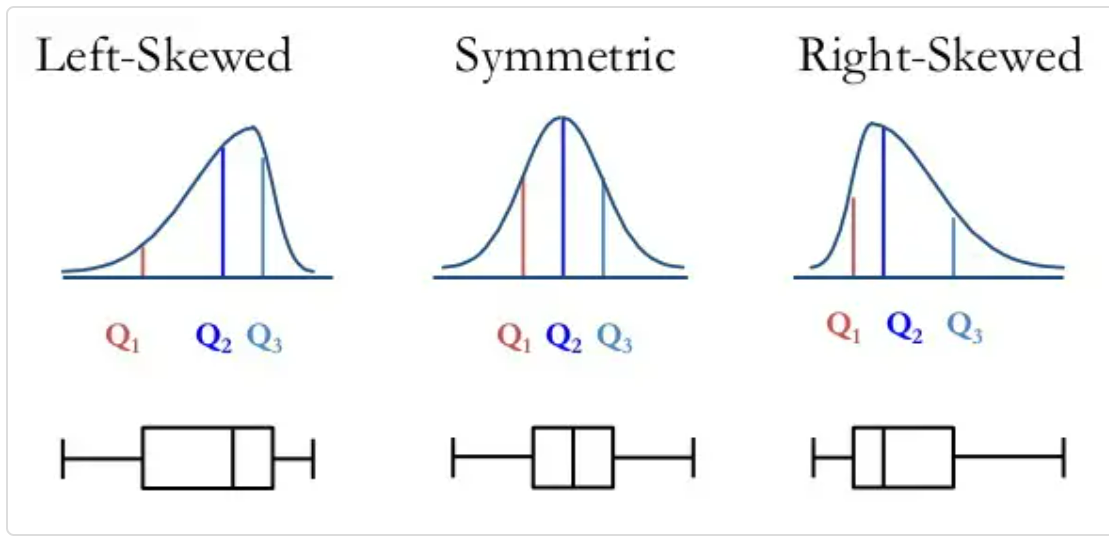

Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.

1. When the median is closer to the bottom of the box, and if the whisker is shorter on the lower end of the box, then the distribution is positively skewed (skewed right).

2. When the median is closer to the top of the box, and if the whisker is shorter on the upper end of the box, then the distribution is negatively skewed (skewed left).

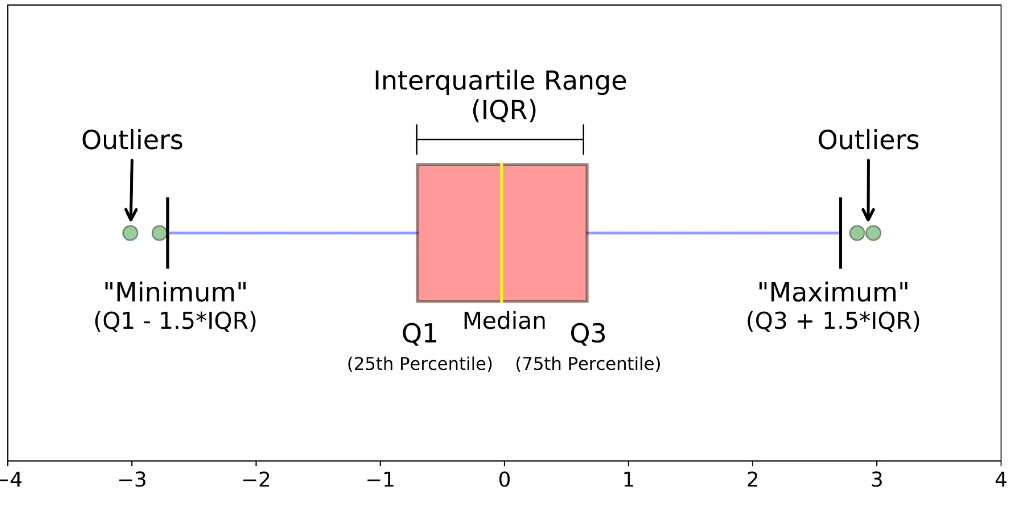

1. If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

2. When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve. and vice-versa

### Univariate/Bivariate distributions

In [58]:
def plot_comparison(data, col, title):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=[18,18])
    sns.histplot(data=train_df, x=col, kde=True,ax=ax[0],color = 'cornflowerblue')
    ax[0].set_title('Histogram + KDE')
    sns.boxenplot(x=col, ax=ax[1],color = 'cornflowerblue')
    ax[1].set_title('Boxplot')
    sns.violinplot(x=col,saturation=1, ax=ax[2],color = 'cornflowerblue', bw=.15,cut=0)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.show()

ApplicantIncome
Skew : 6.81
no.of zeros : 0
% of zeros : 0.0
no.of nulls : 0
% of nulls : 0.0


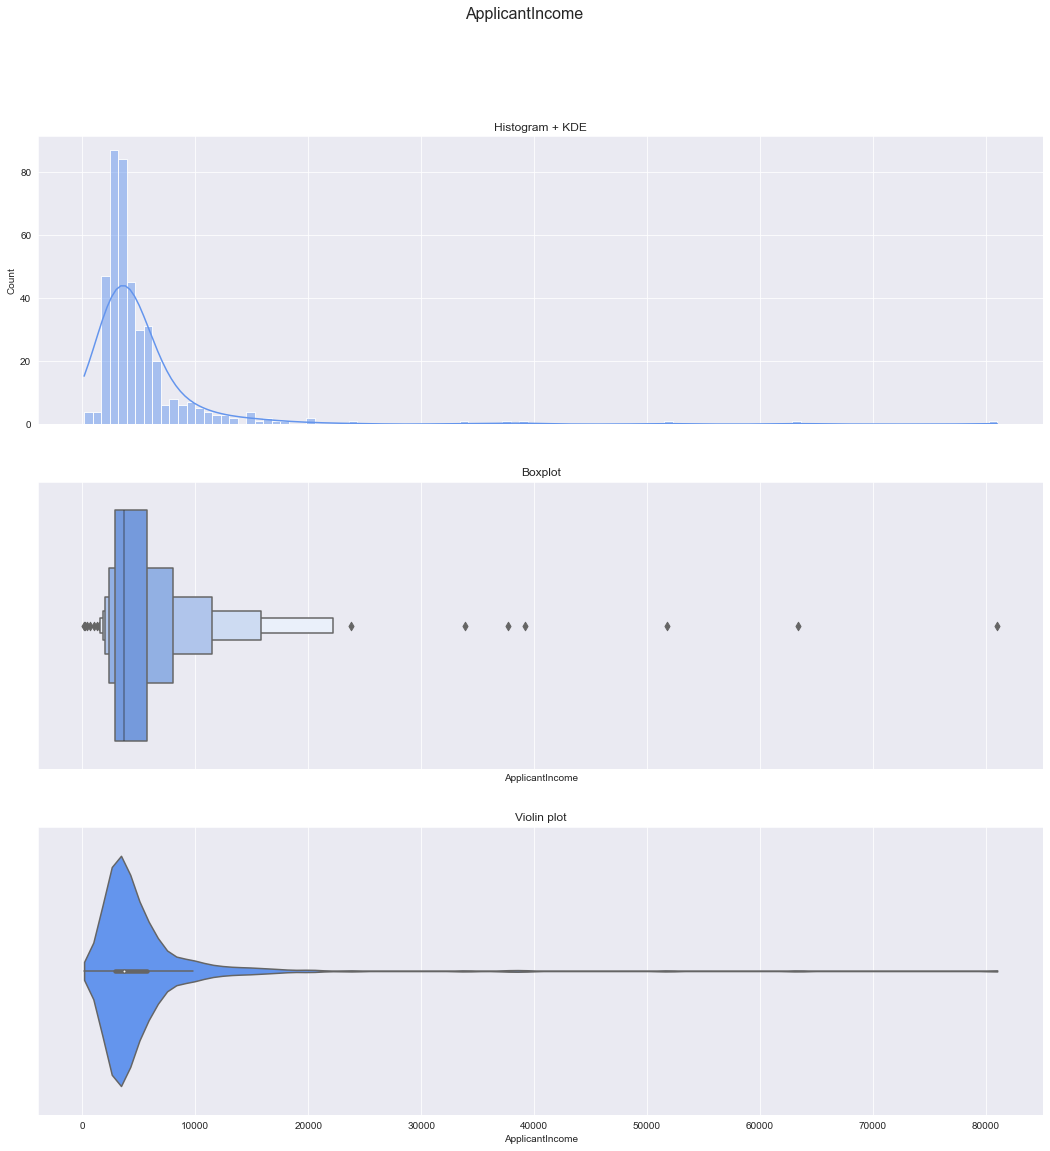

CoapplicantIncome
Skew : 8.4
no.of zeros : 190
% of zeros : 45.89
no.of nulls : 0
% of nulls : 0.0


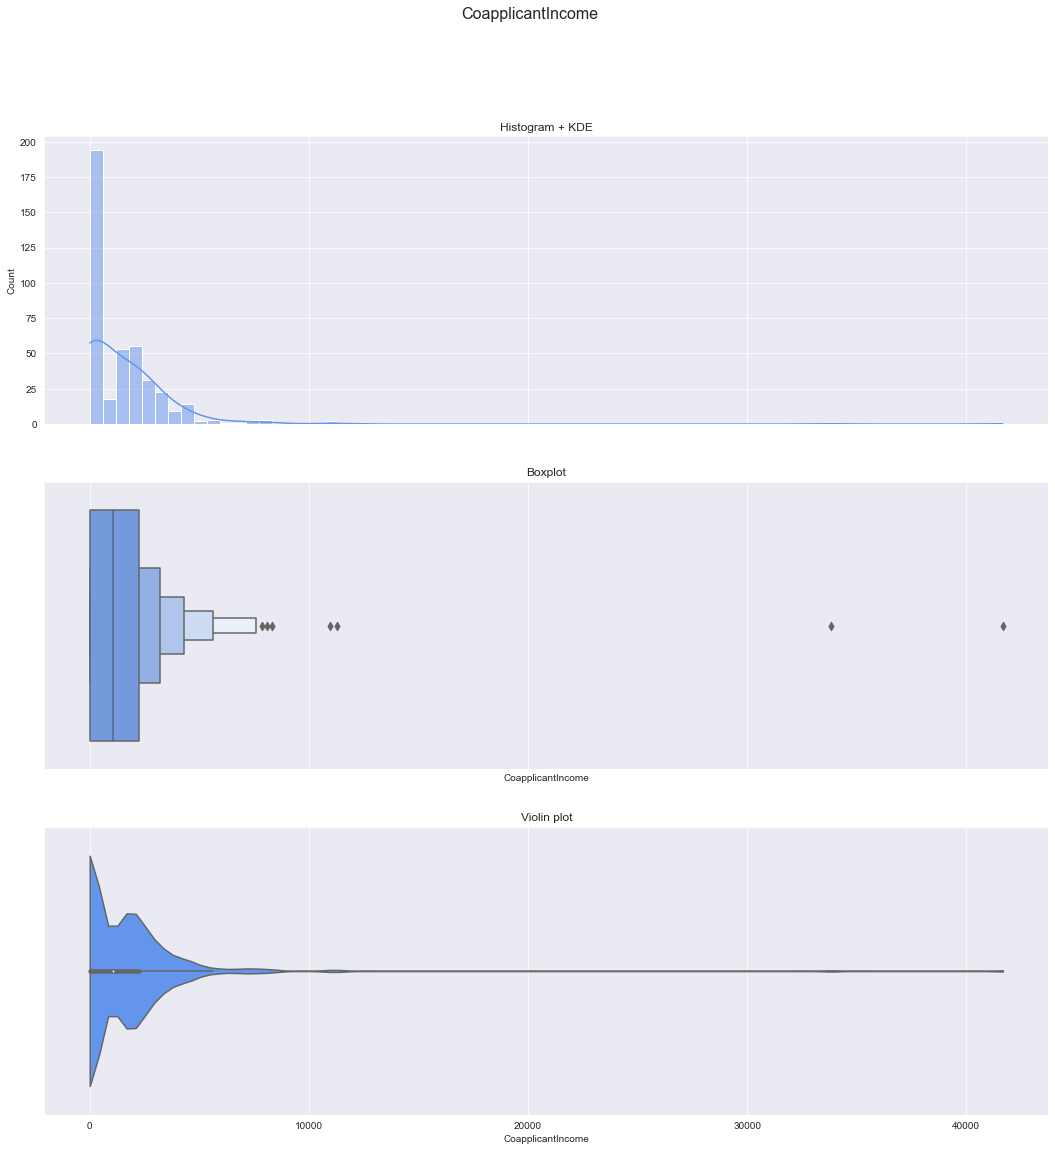

LoanAmount
Skew : 2.63
no.of zeros : 0
% of zeros : 0.0
no.of nulls : 11
% of nulls : 2.66


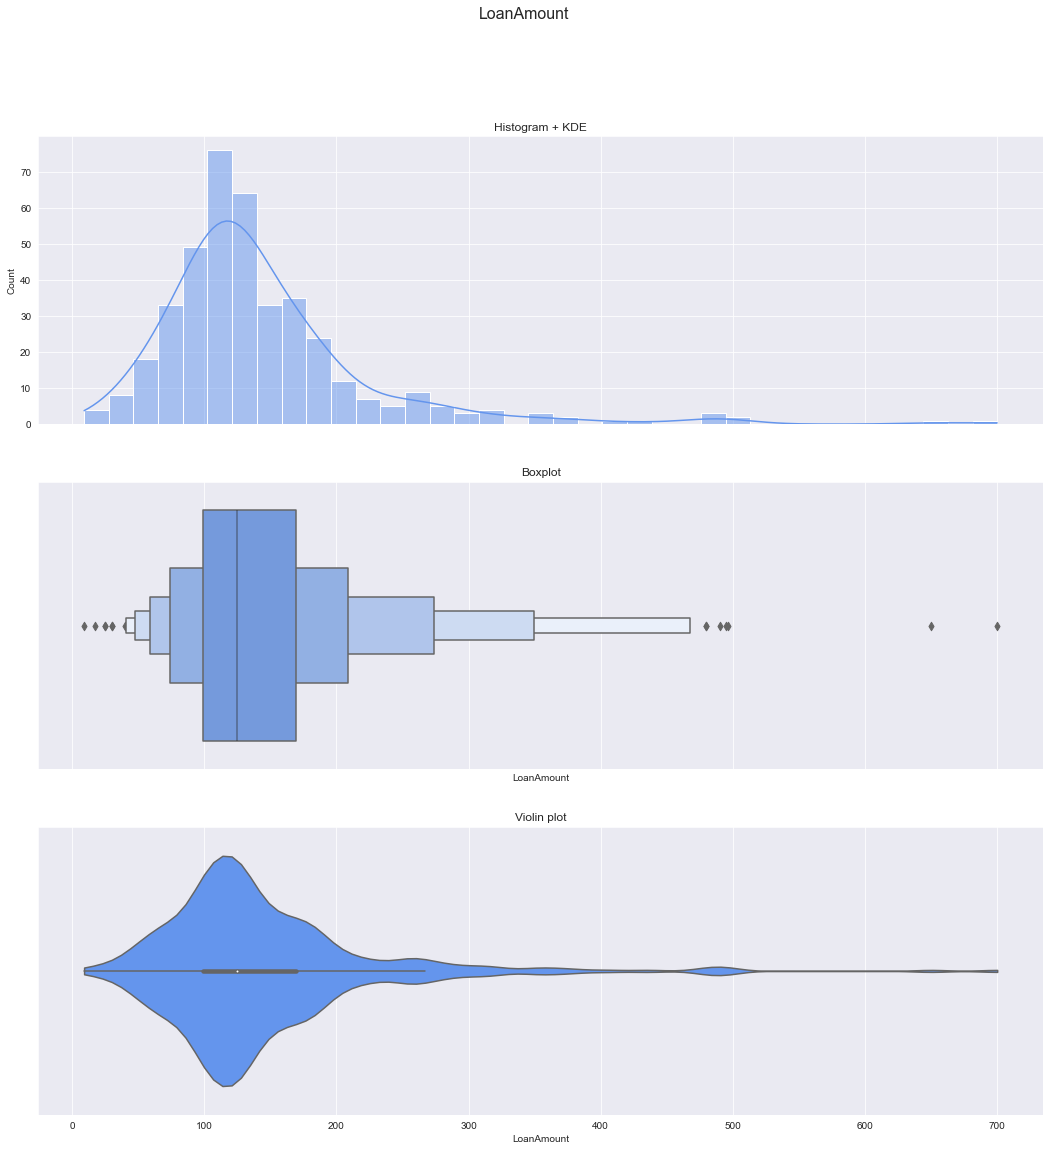

In [59]:
for col in continuous_features:
    print(col)
    print('Skew :', round(train_df[col].skew(), 2))
    print('no.of zeros :',(train_df[col]==0).sum())
    print('% of zeros :',np.round_((train_df[col]==0).sum()/len(train_df)*100,decimals=2))
    print('no.of nulls :',train_df[col].isna().sum())
    print('% of nulls :',np.round_(train_df[col].isna().sum()/len(train_df)*100,decimals=2))
    plot_comparison(train_df, train_df[col], col)

Skew : 2.03


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

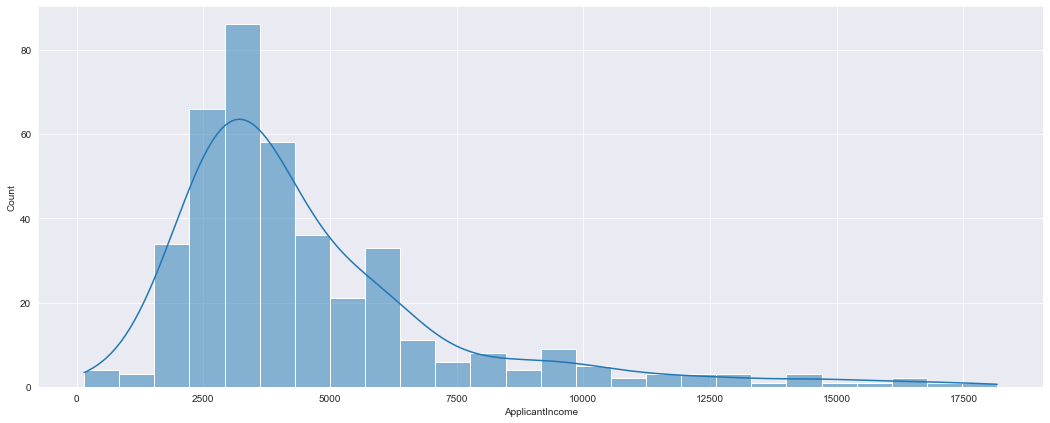

In [60]:
# Excluding few extreme values to get the clear vizualization

print('Skew :', round(train_df.loc[train_df['ApplicantIncome']<20000]['ApplicantIncome'].skew(), 2))
plt.figure(figsize = (18,7))
sns.histplot(data=train_df.loc[train_df['ApplicantIncome']<20000], x='ApplicantIncome', kde=True)

Skew : 1.27


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

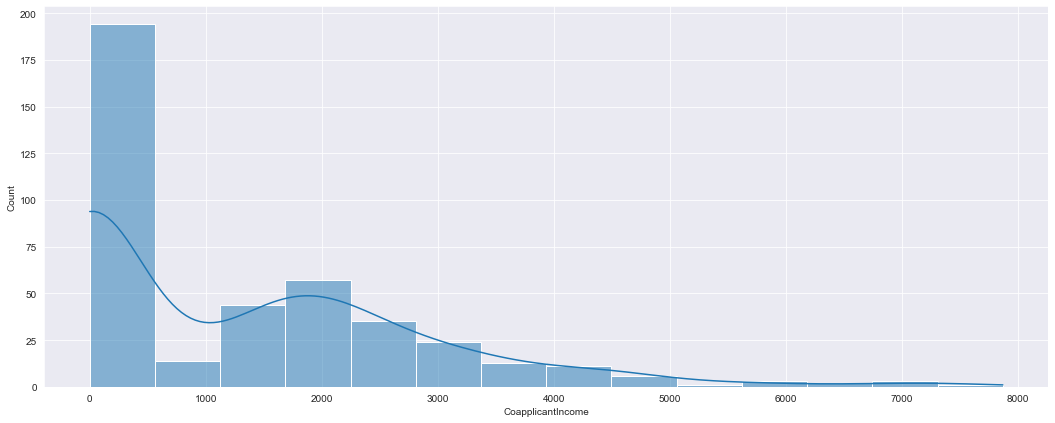

In [61]:
# Excluding few extreme values to get the clear vizualization

print('Skew :', round(train_df.loc[train_df['CoapplicantIncome']<8000]['CoapplicantIncome'].skew(), 2))
plt.figure(figsize = (18,7))
sns.histplot(train_df.loc[train_df['CoapplicantIncome']<8000], x='CoapplicantIncome', kde=True)

Skew : 1.21


<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

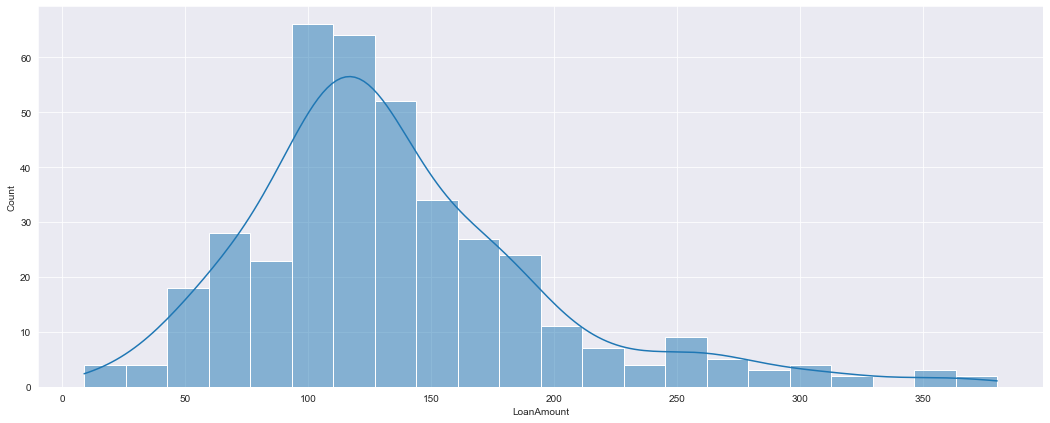

In [62]:
# Excluding few extreme values to get the clear vizualization

print('Skew :', round(train_df.loc[train_df['LoanAmount']<400]['LoanAmount'].skew(), 2))
plt.figure(figsize = (18,7))
sns.histplot(train_df.loc[train_df['LoanAmount']<400], x='LoanAmount', kde=True)

ApplicantIncome
no.of nulls : 0
% of nulls : 0.0
Skew : 6.81


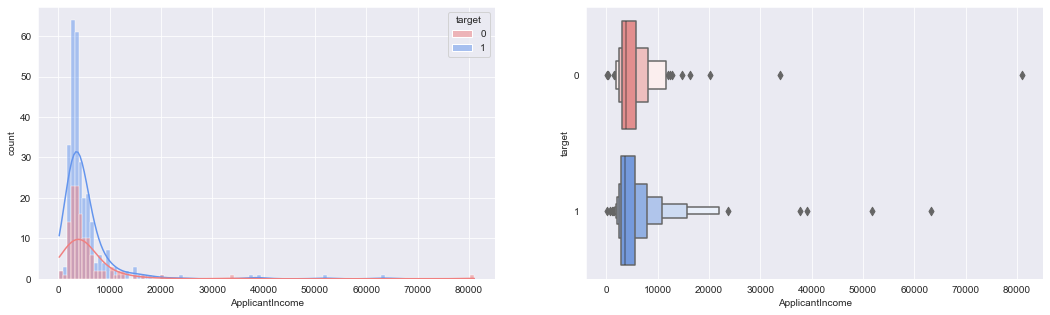

CoapplicantIncome
no.of nulls : 0
% of nulls : 0.0
Skew : 8.4


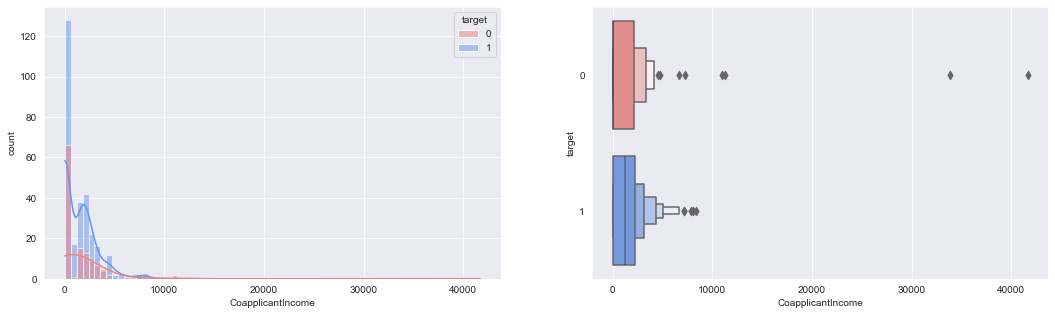

LoanAmount
no.of nulls : 11
% of nulls : 2.66
Skew : 2.63


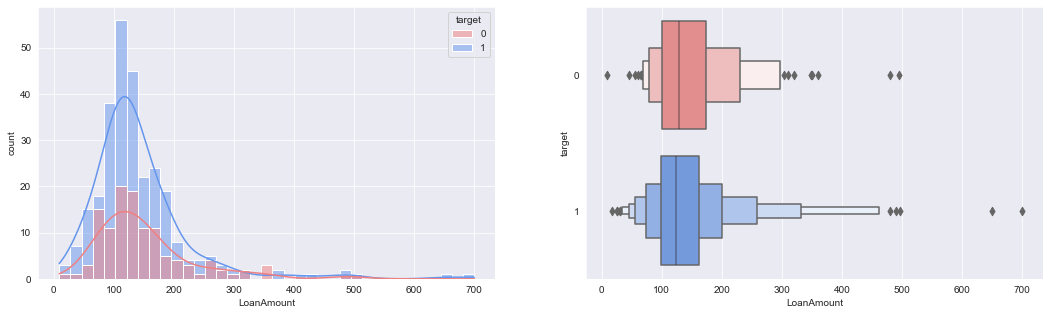

In [63]:
for col in continuous_features:
    print(col)
    print('no.of nulls :',train_df[col].isna().sum())
    print('% of nulls :',np.round_(train_df[col].isna().sum()/len(train_df)*100,decimals=2))
    print('Skew :', round(train_df[col].skew(), 2))
    plt.figure(figsize = (18,5))
    plt.subplot(1, 2, 1)
    sns.histplot(data=train_df, x=col, kde=True,hue='target',palette=['lightcoral','cornflowerblue'])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxenplot(data=train_df, x=col, y='target', order=[0,1],orient='h',palette=['lightcoral','cornflowerblue'])
    plt.show()

ApplicantIncome
Skew : 6.81


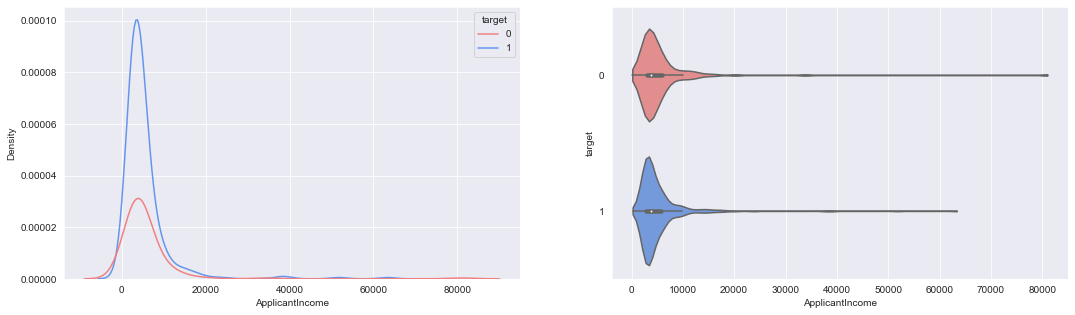

CoapplicantIncome
Skew : 8.4


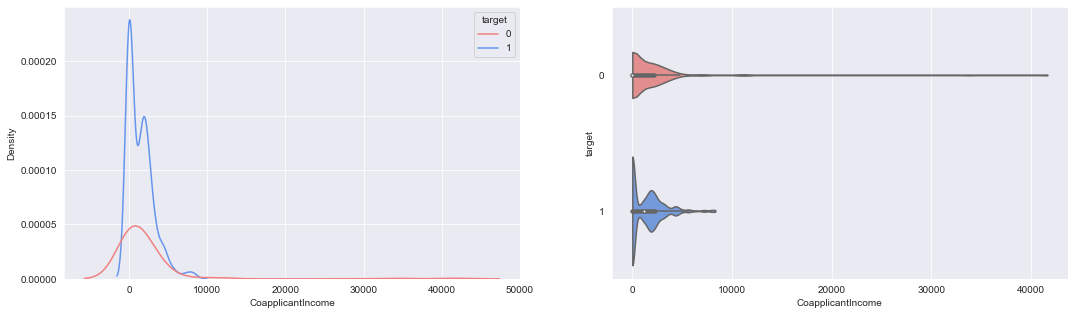

LoanAmount
Skew : 2.63


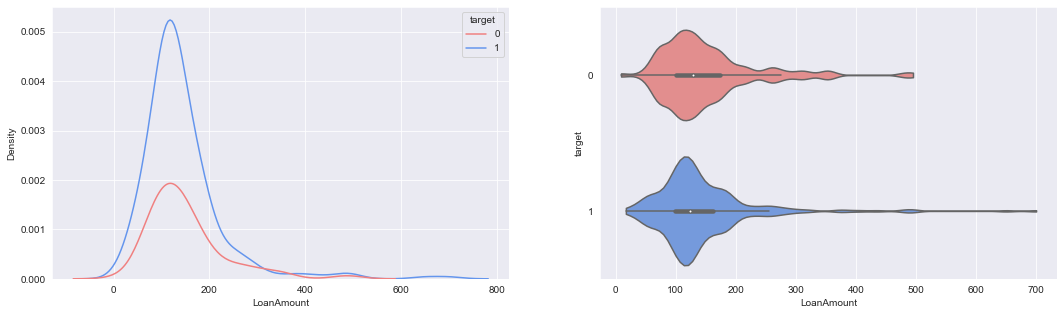

In [64]:
for col in continuous_features:
    print(col)
    print('Skew :', round(train_df[col].skew(), 2))
    plt.figure(figsize = (18,5))
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=train_df, x=col,hue='target',palette=['lightcoral','cornflowerblue'])
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.subplot(1, 2, 2)
    #sns.violinplot(x=train_df[col],saturation=1)
    sns.violinplot(data=train_df, x=col, y='target', order=[0,1],orient='h',palette=['lightcoral','cornflowerblue'], bw=.15,cut=0)
    plt.show()

#### If you want to check whether feature is guassian or normal distributed or not
#### Q-Q plot

In [65]:
import scipy.stats as stat
import pylab 

ApplicantIncome
Skew : 6.81
2.710897412707884e-122


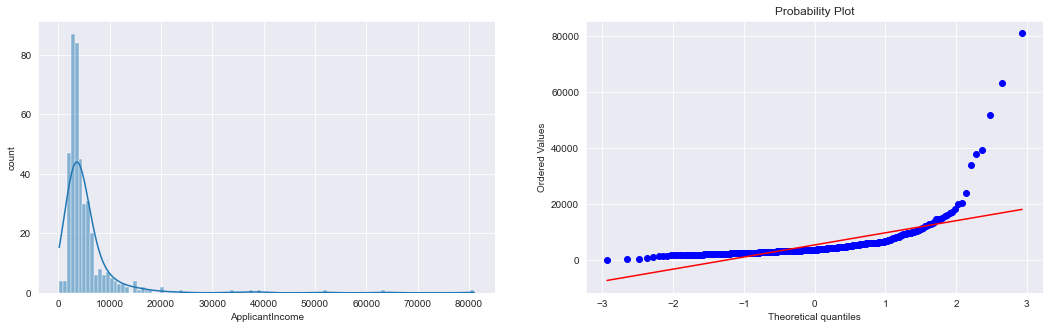

CoapplicantIncome
Skew : 8.4
7.493424796586191e-140


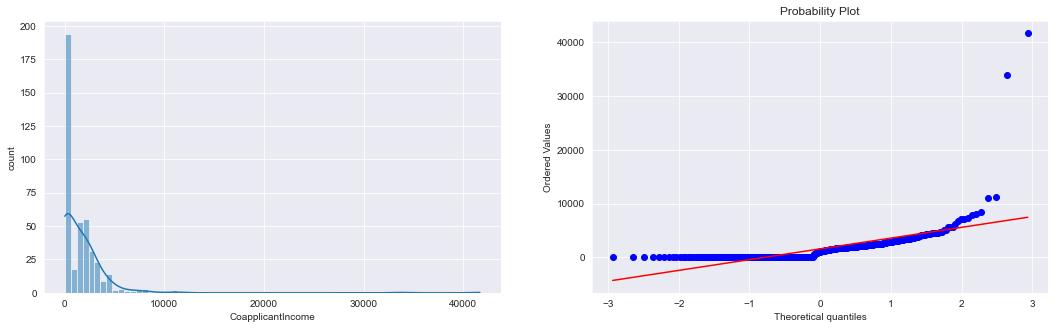

LoanAmount
Skew : 2.63
nan


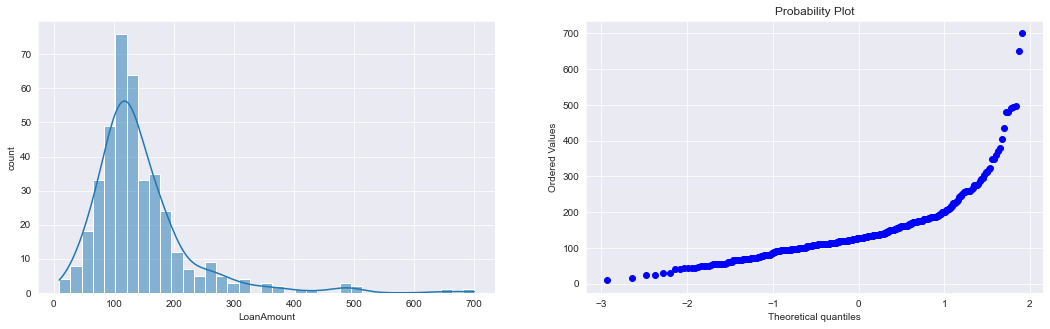

In [66]:
for col in continuous_features:
    print(col)
    print('Skew :', round(train_df[col].skew(), 2))
    _, p = stat.normaltest(train_df[col].to_numpy())
    print(p)
    plt.figure(figsize = (18,5))
    plt.subplot(1, 2, 1)
    sns.histplot(data=train_df, x=col, kde=True)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    stat.probplot(train_df[col],dist='norm',plot=pylab)
    plt.show()

### Observations :

1. From above we can see that all the continuous features are right skewed.
2. And with these 3 continuous features we are unable to differentiate the Loan approval/rejections data distributions

In [67]:
train_df.columns

Index(['Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'target'],
      dtype='object')

### Visualizing bivariate/multivariate distributions

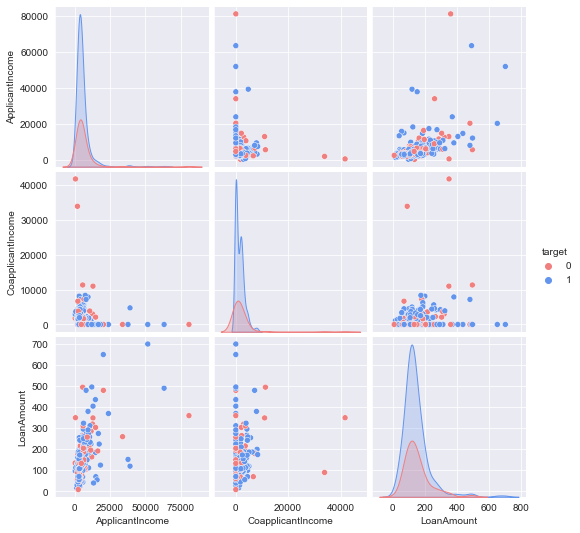

In [68]:
sns.pairplot(train_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','target']], hue='target',palette=['lightcoral','cornflowerblue'])

# Its not clear to observe graphs closely we will plot indvidual plots for better understanding

In [69]:
continuous_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

ApplicantIncome


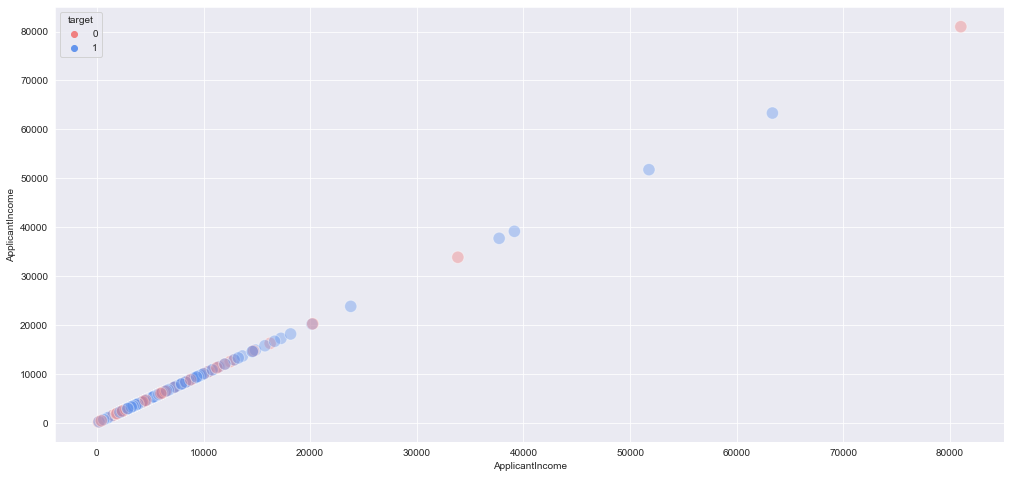

CoapplicantIncome


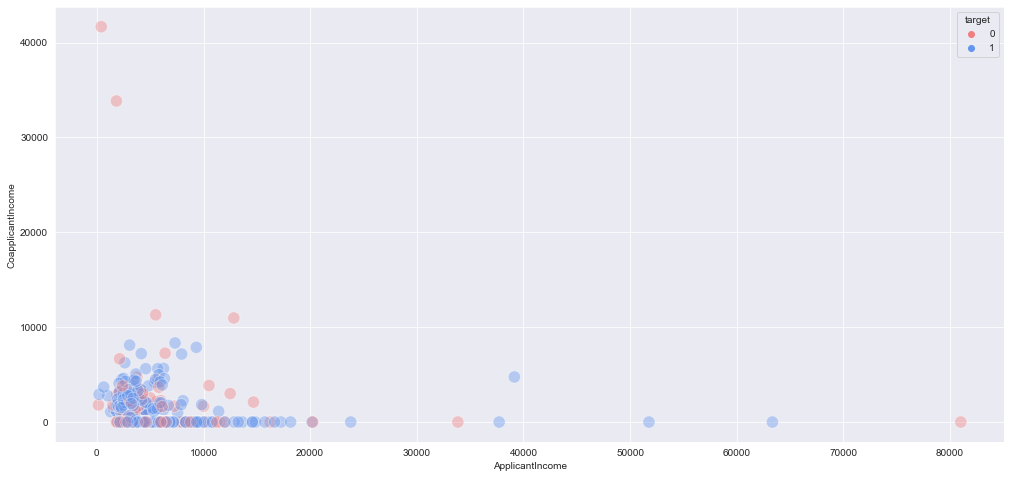

LoanAmount


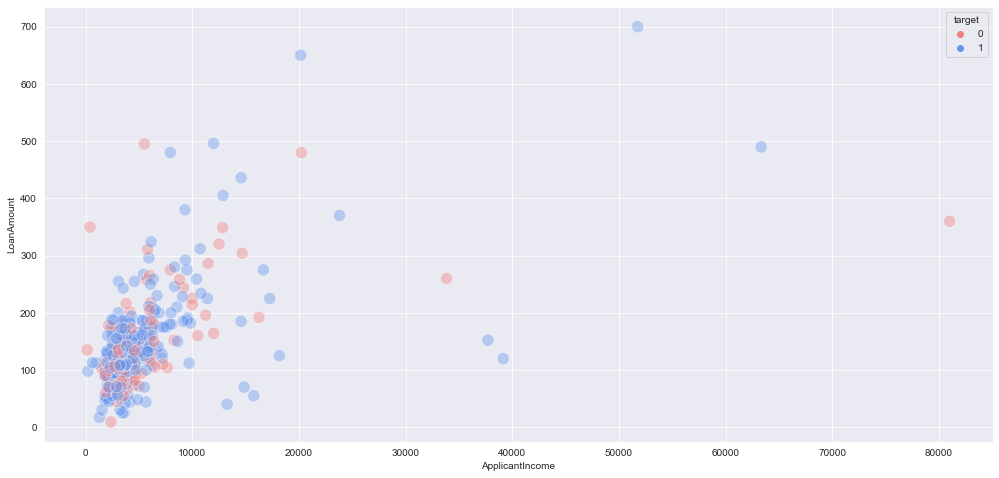

In [70]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (17,8))
    sns.scatterplot(data=train_df, x='ApplicantIncome',y=col,hue='target',palette=['lightcoral','cornflowerblue'],alpha=0.4,s=150)
    plt.xlabel('ApplicantIncome')
    plt.ylabel(col)
    plt.show()

ApplicantIncome


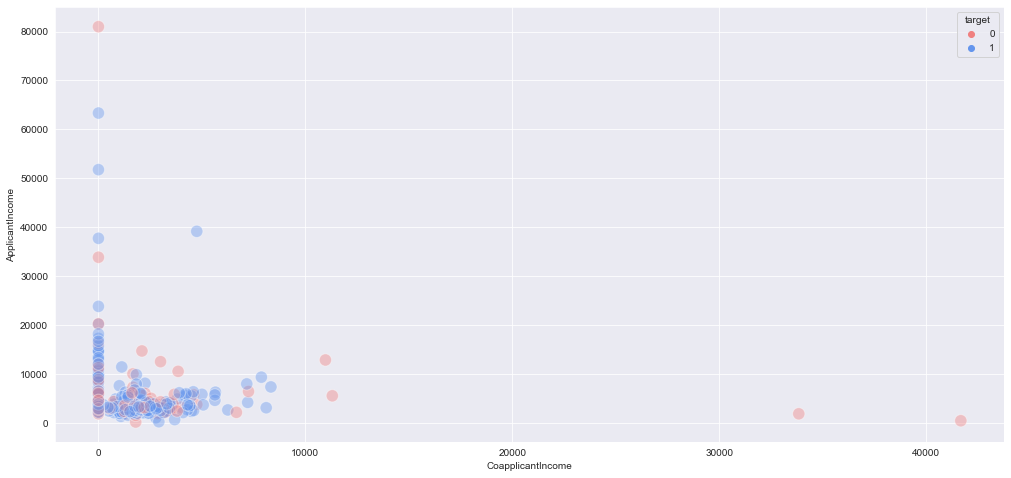

CoapplicantIncome


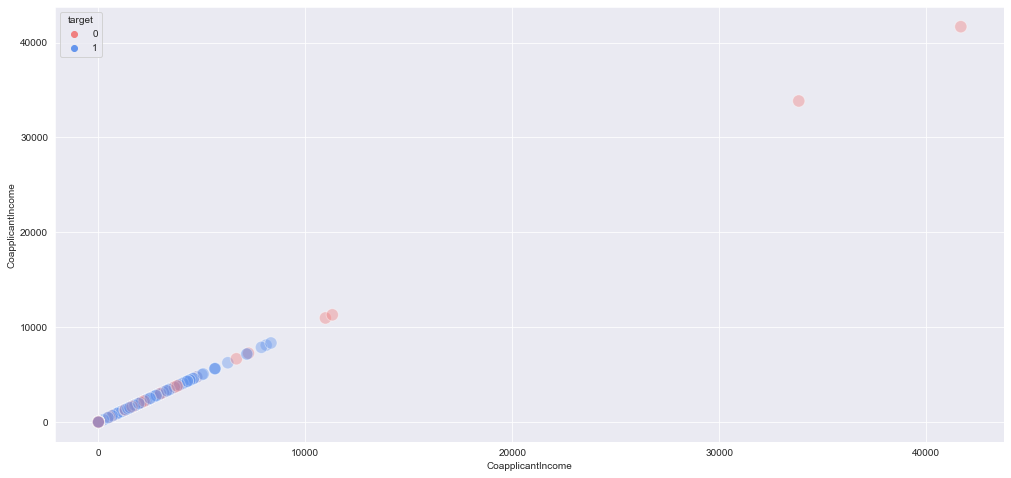

LoanAmount


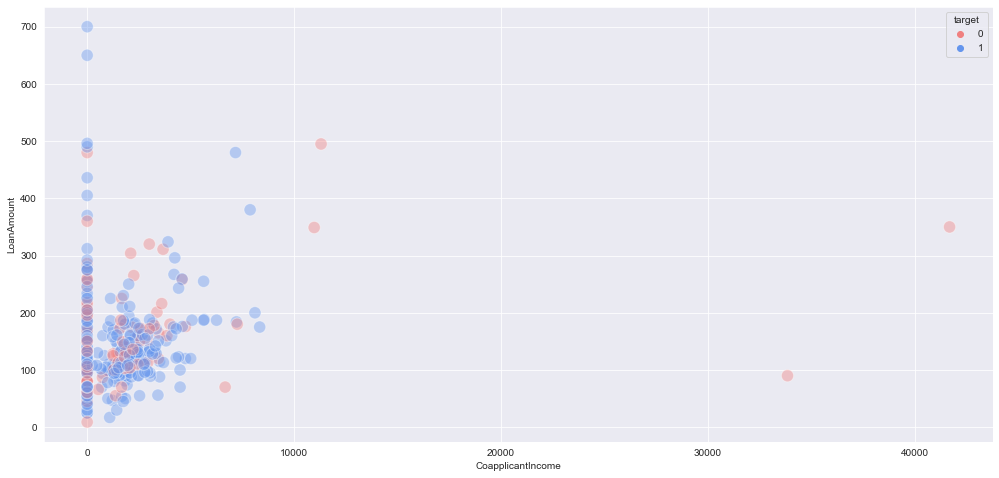

In [71]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (17,8))
    sns.scatterplot(data=train_df, x='CoapplicantIncome',y=col,hue='target',palette=['lightcoral','cornflowerblue'],alpha=0.4,s=150)
    plt.xlabel('CoapplicantIncome')
    plt.ylabel(col)
    plt.show()

ApplicantIncome


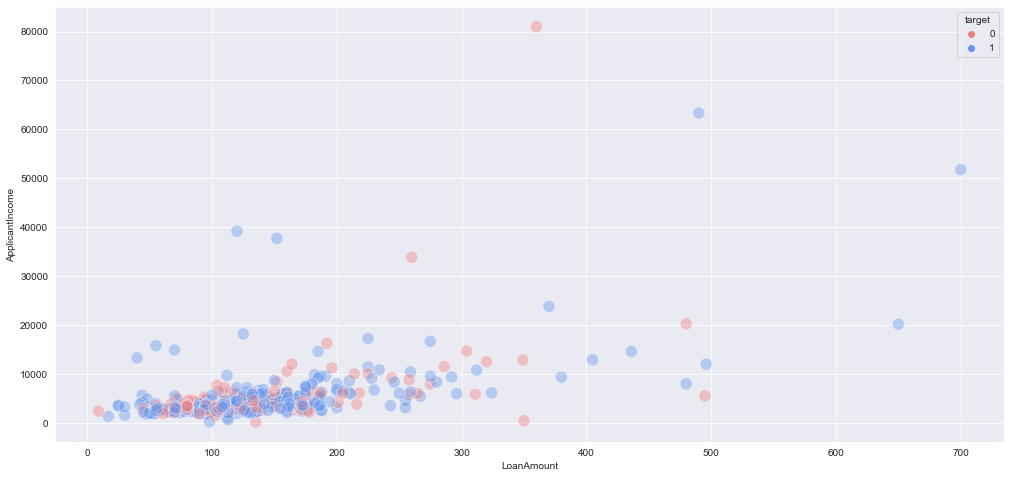

CoapplicantIncome


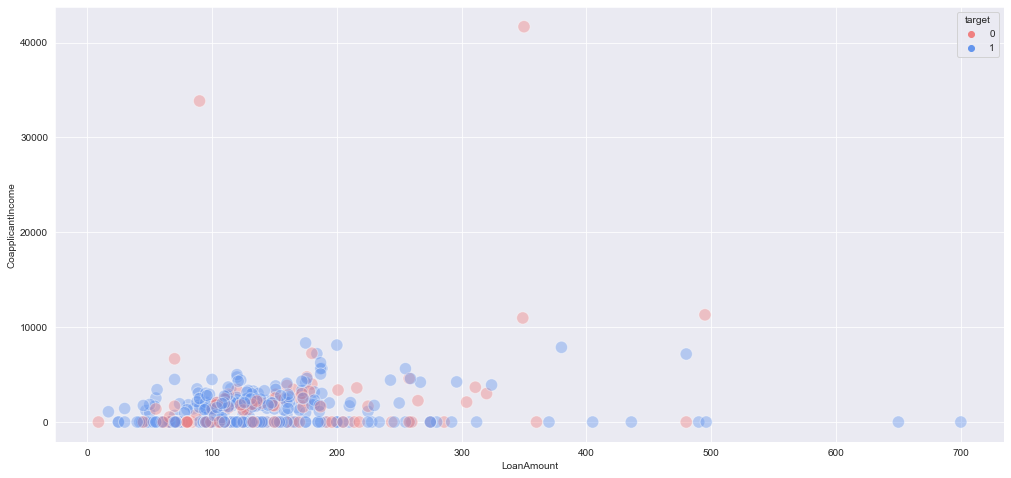

LoanAmount


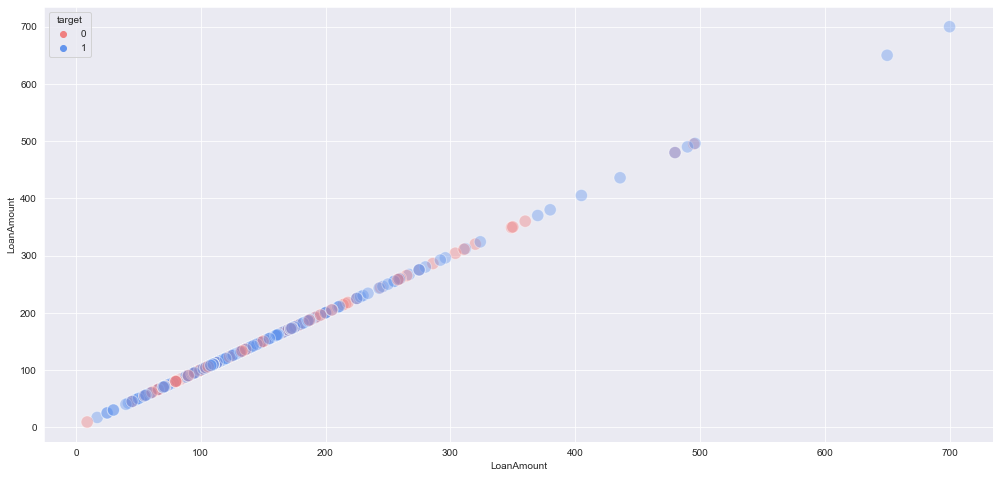

In [72]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (17,8))
    sns.scatterplot(data=train_df, x='LoanAmount',y=col,hue='target',palette=['lightcoral','cornflowerblue'],alpha=0.4,s=150)
    plt.xlabel('LoanAmount')
    plt.ylabel(col)
    plt.show()

### Observations :

1. As said above these 3 features aren't giving much info about the target

In [73]:
train_df.columns

Index(['Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'target'],
      dtype='object')

In [74]:
fig = px.scatter_3d(train_df, x="ApplicantIncome", y="CoapplicantIncome", z="LoanAmount", color="target")
fig.show()

### Discrete_features

### Univariate/Bivariate analysis

In [75]:
train_df[discrete_features].nunique().sort_values(ascending=False)

Loan_Amount_Term    8
Gender              2
Married             2
Graduate            2
Self_Employed       2
Credit_History      2
dtype: int64

In [76]:
discrete_features = train_df[discrete_features].nunique().sort_values(ascending=False).index
discrete_features

Index(['Loan_Amount_Term', 'Gender', 'Married', 'Graduate', 'Self_Employed',
       'Credit_History'],
      dtype='object')

Loan_Amount_Term


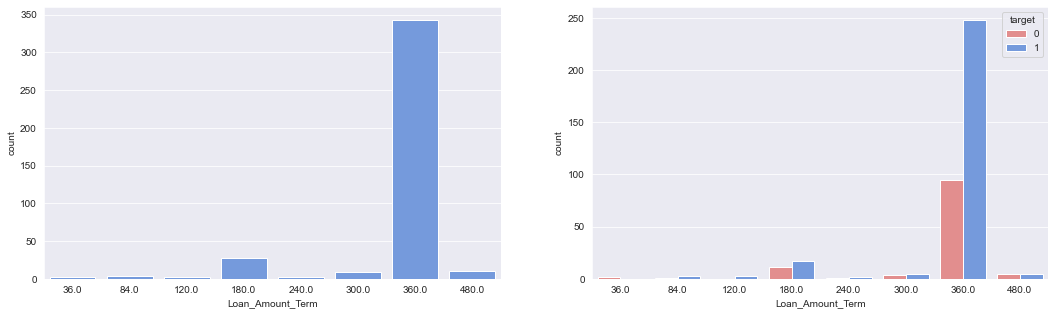

Gender


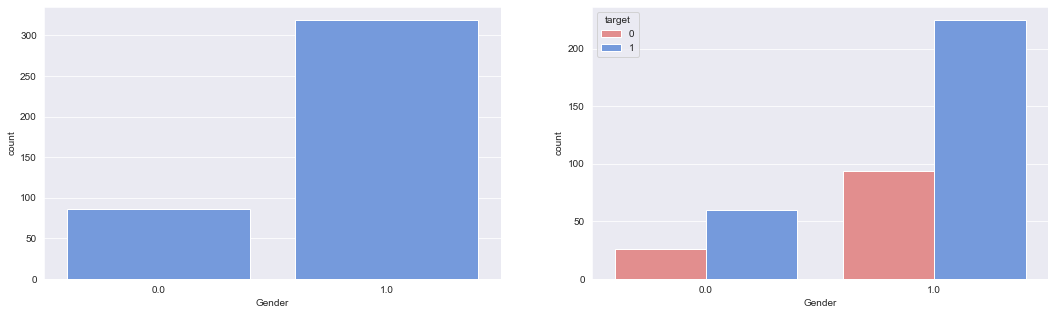

Married


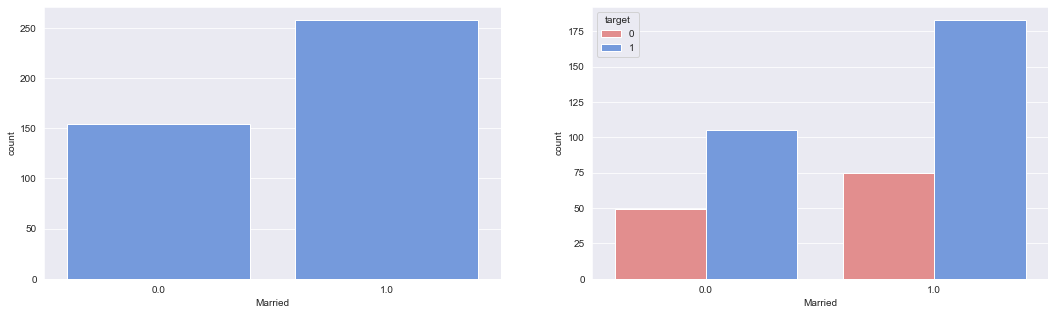

Graduate


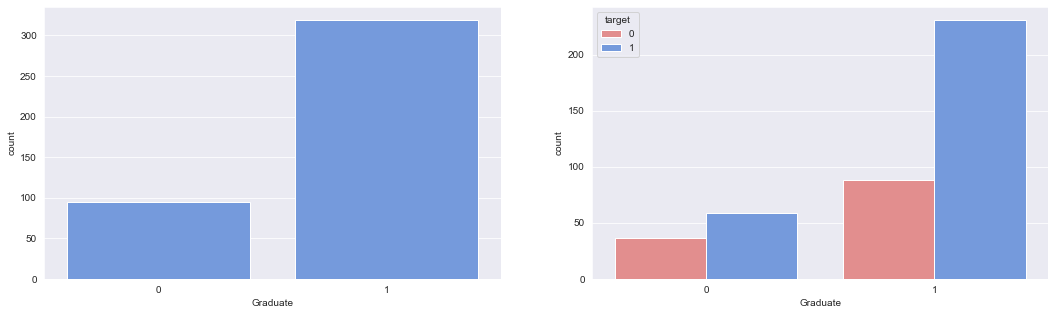

Self_Employed


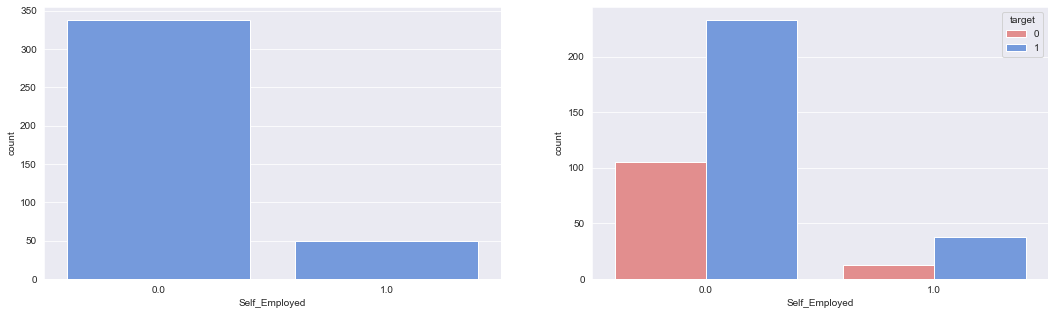

Credit_History


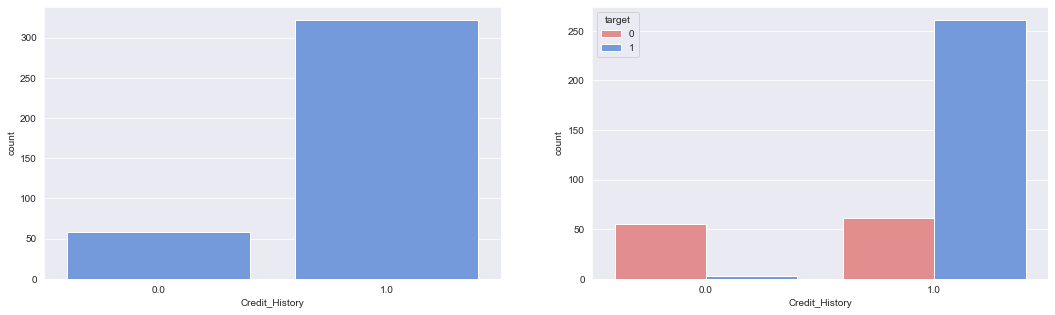

In [77]:
for col in discrete_features:
    print(col)
    plt.figure(figsize = (18,5))
    plt.subplot(1, 2, 1)
    sns.countplot(data=train_df, x=col,color='cornflowerblue')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.countplot(data=train_df, x=col, hue="target",palette=['lightcoral','cornflowerblue'])
    plt.show()

Loan_Amount_Term


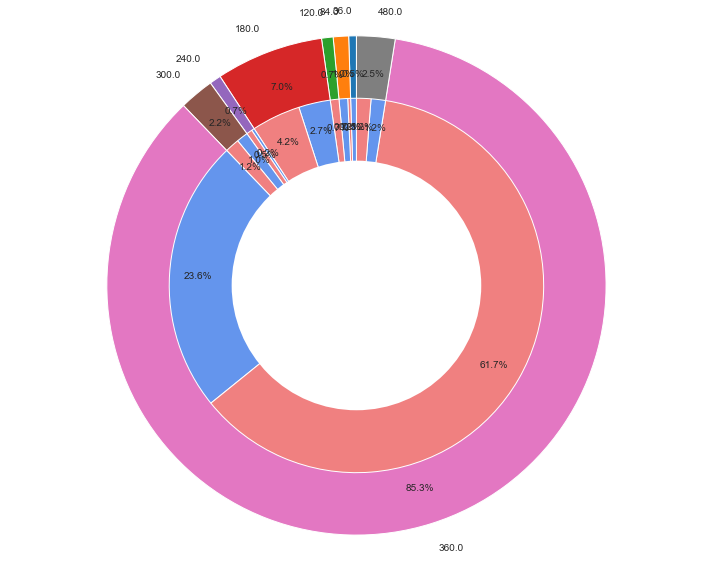

In [78]:
print('Loan_Amount_Term')
labels = train_df['Loan_Amount_Term'].value_counts().sort_index().index
sizes = train_df['Loan_Amount_Term'].value_counts().sort_index().values
sizes_gender = train_df.groupby(['Loan_Amount_Term','target'])['target'].count().values
colors = ['cornflowerblue','lightcoral','cornflowerblue','lightcoral','cornflowerblue','lightcoral','cornflowerblue',
                 'lightcoral','cornflowerblue','lightcoral','cornflowerblue','lightcoral','cornflowerblue','lightcoral','cornflowerblue','lightcoral','cornflowerblue','lightcoral']
 
# Plot
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%', pctdistance=0.85)
plt.pie(sizes_gender,colors=colors,radius=0.75,startangle=90,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

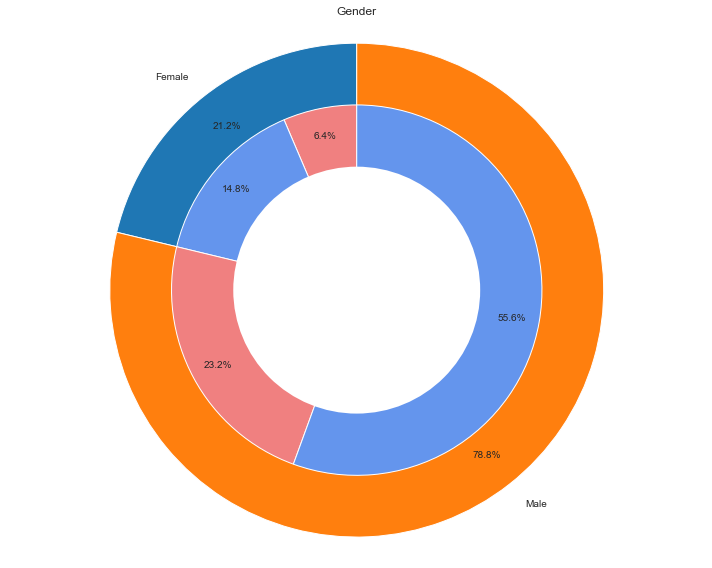

In [79]:
labels = ['Female','Male']
sizes = train_df['Gender'].value_counts().sort_index().values
sizes_gender = train_df.groupby(['Gender','target'])['target'].count().values
colors = ['lightcoral','cornflowerblue','lightcoral','cornflowerblue']
 
# Plot
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%', pctdistance=0.85)
plt.pie(sizes_gender,colors=colors,radius=0.75,startangle=90,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Gender')
plt.axis('equal')
plt.tight_layout()
plt.show()

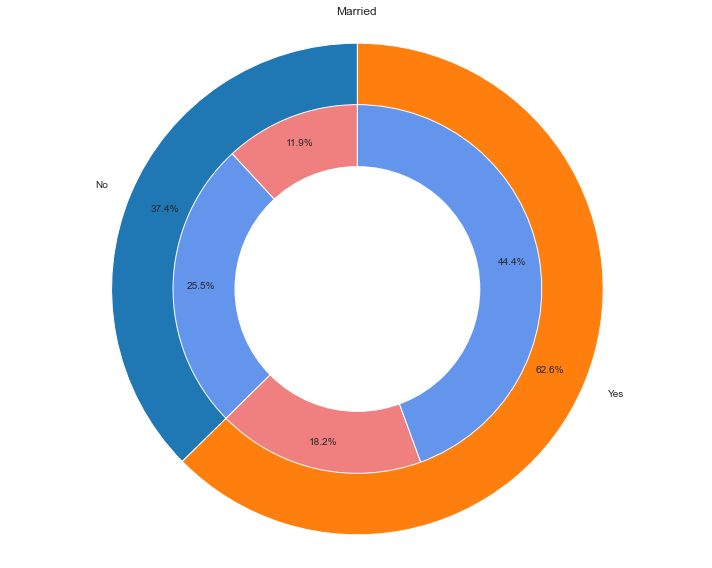

In [80]:
labels = ['No','Yes']
sizes = train_df['Married'].value_counts().sort_index().values
sizes_gender = train_df.groupby(['Married','target'])['target'].count().values
colors = ['lightcoral','cornflowerblue','lightcoral','cornflowerblue']
 
# Plot
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%', pctdistance=0.85)
plt.pie(sizes_gender,colors=colors,radius=0.75,startangle=90,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Married')
plt.axis('equal')
plt.tight_layout()
plt.show()

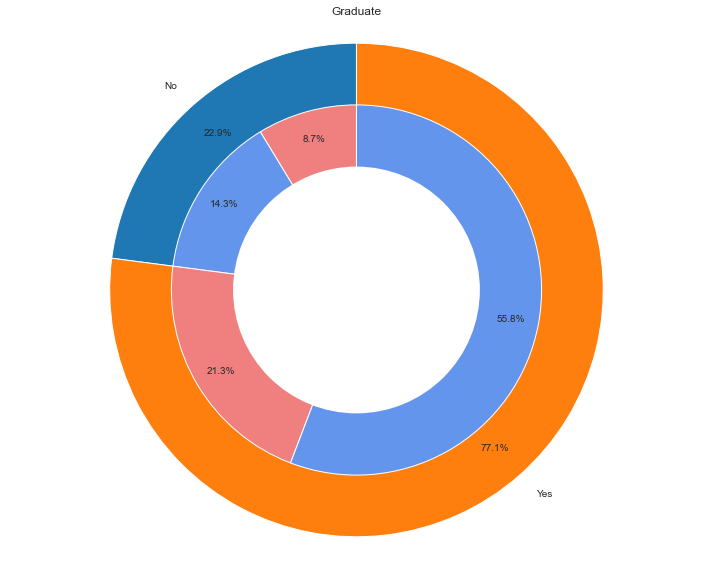

In [81]:
labels = ['No','Yes']
sizes = train_df['Graduate'].value_counts().sort_index().values
sizes_gender = train_df.groupby(['Graduate','target'])['target'].count().values
colors = ['lightcoral','cornflowerblue','lightcoral','cornflowerblue']
 
# Plot
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%', pctdistance=0.85)
plt.pie(sizes_gender,colors=colors,radius=0.75,startangle=90,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Graduate')
plt.axis('equal')
plt.tight_layout()
plt.show()

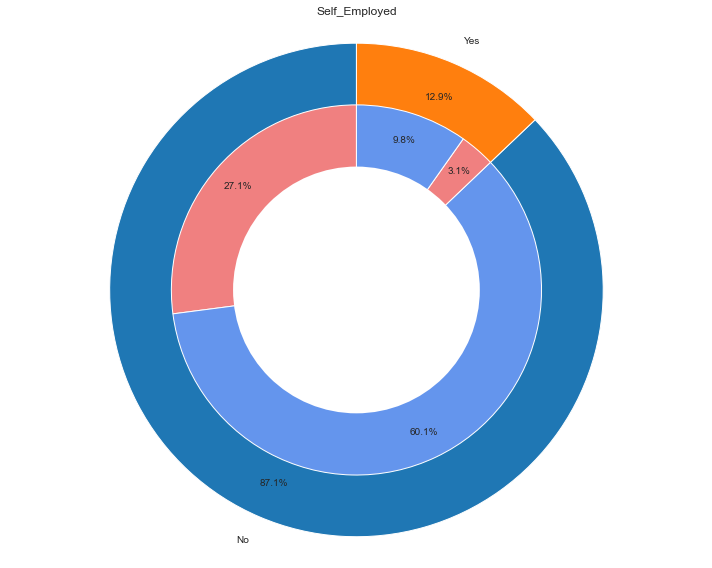

In [82]:
labels = ['No','Yes']
sizes = train_df['Self_Employed'].value_counts().sort_index().values
sizes_gender = train_df.groupby(['Self_Employed','target'])['target'].count().values
colors = ['lightcoral','cornflowerblue','lightcoral','cornflowerblue']
 
# Plot
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%', pctdistance=0.85)
plt.pie(sizes_gender,colors=colors,radius=0.75,startangle=90,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Self_Employed')
plt.axis('equal')
plt.tight_layout()
plt.show()

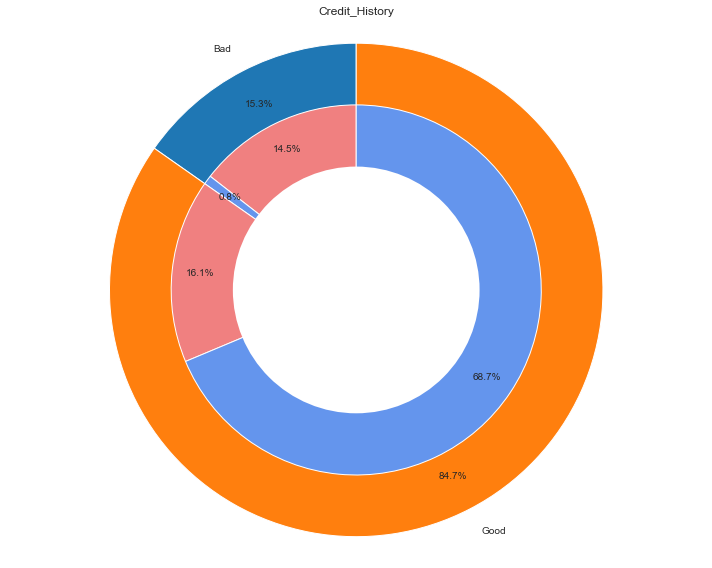

In [83]:
labels = ['Bad','Good']
sizes = train_df['Credit_History'].value_counts().sort_index().values
#labels_gender = [0,1,0,1,0,1,0,1]
sizes_gender = train_df.groupby(['Credit_History','target'])['target'].count().values
#colors = ['slategrey', '#ffcc99']
colors = ['lightcoral','cornflowerblue','lightcoral','cornflowerblue']
 
# Plot
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%', pctdistance=0.85)
plt.pie(sizes_gender,colors=colors,radius=0.75,startangle=90,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Credit_History')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Observation :

1. From above we can clearly observe that the chances of Loan getting rejected is more when the applicants Credit_History is bad or 0
2. also if you are not Graduate

In [84]:
discrete_features

Index(['Loan_Amount_Term', 'Gender', 'Married', 'Graduate', 'Self_Employed',
       'Credit_History'],
      dtype='object')

Loan_Amount_Term


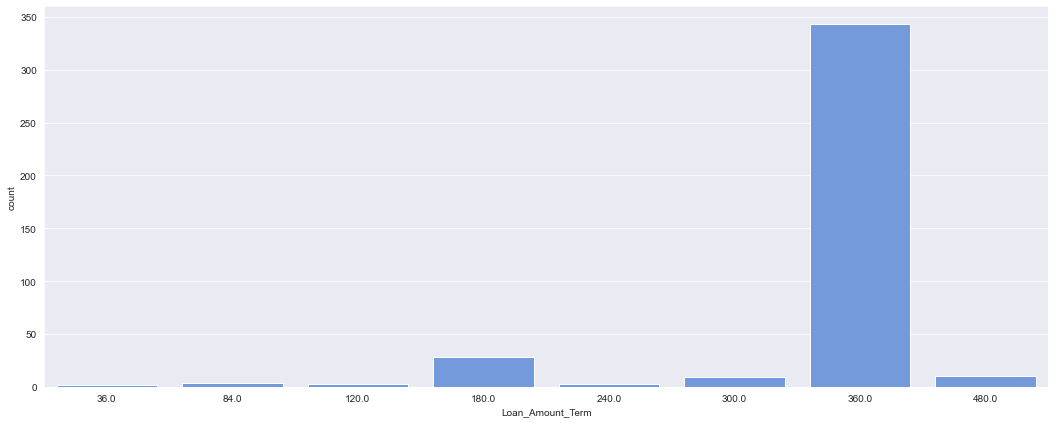

Gender


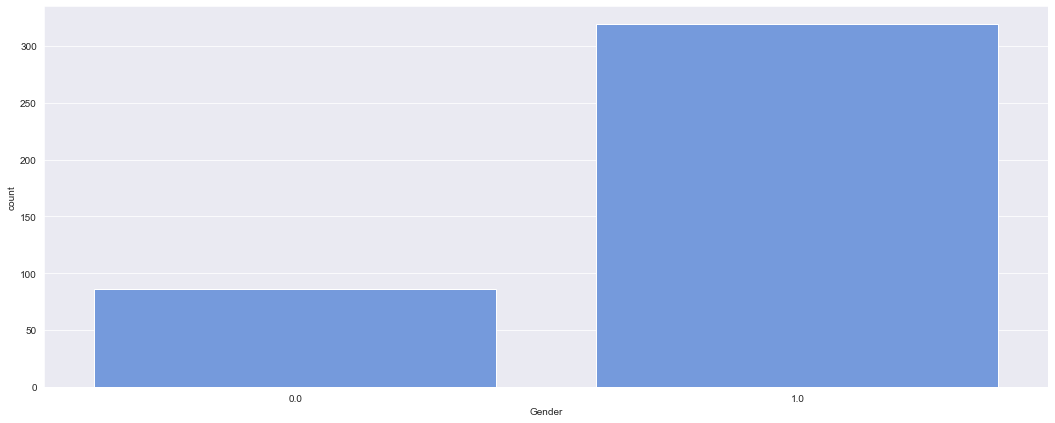

Married


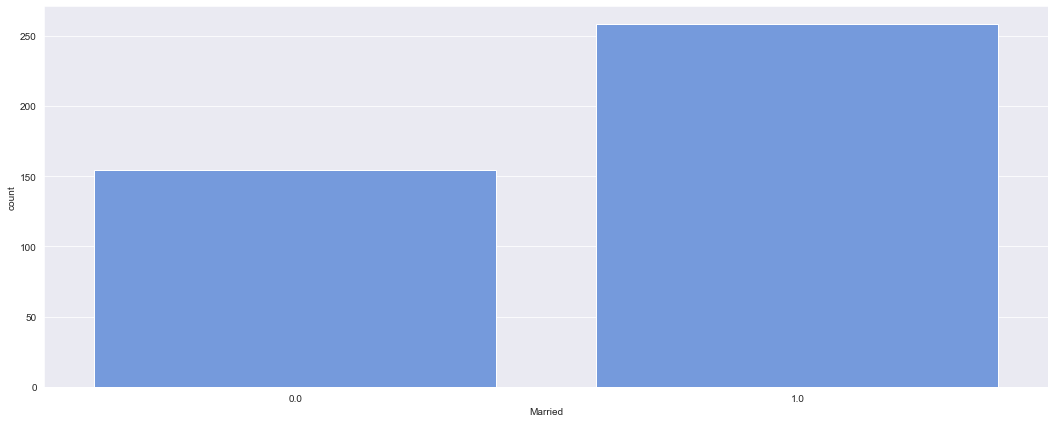

Graduate


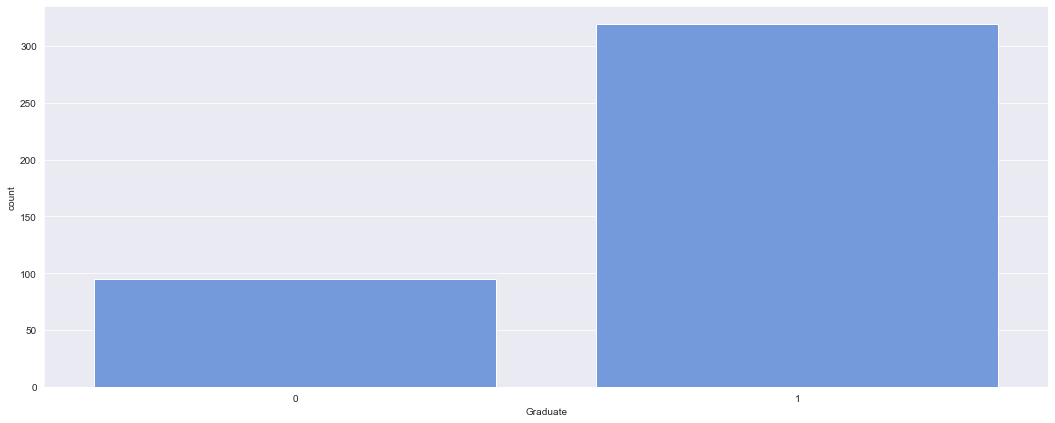

Self_Employed


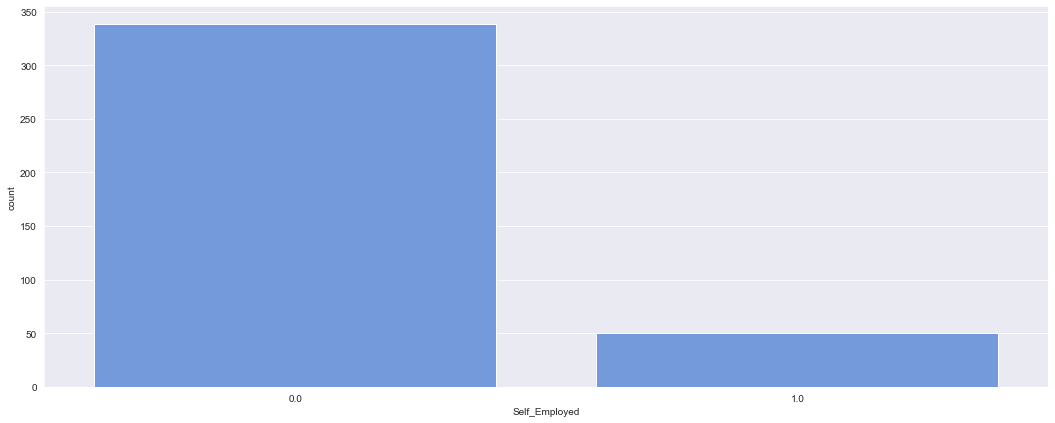

Credit_History


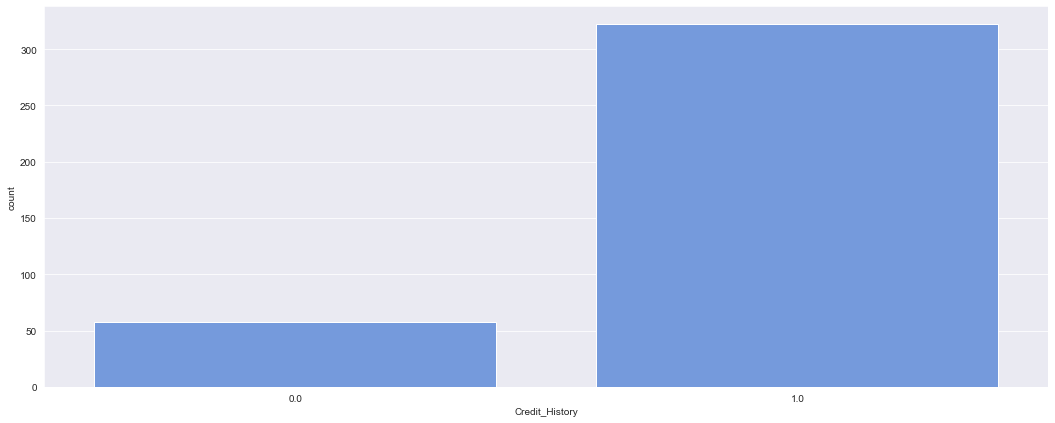

In [85]:
for col in discrete_features:
    print(col)
    plt.figure(figsize = (18,7))
    plt.xlabel(col)
    plt.ylabel('count')
    sns.countplot(data=train_df, x=col,color='cornflowerblue')
    plt.show()

Loan_Amount_Term


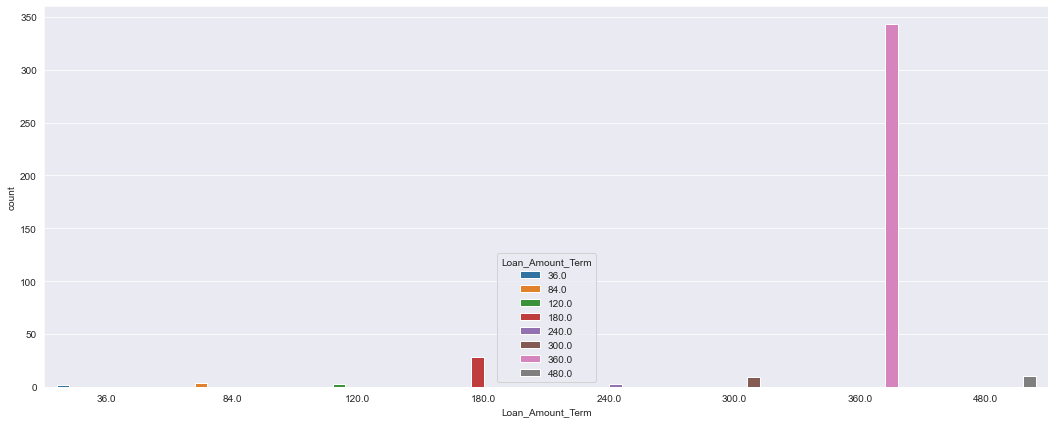

Gender


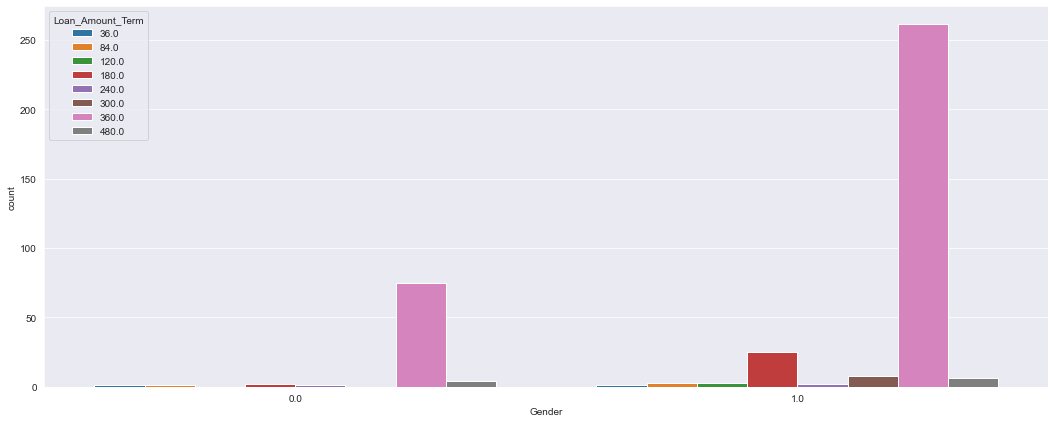

Married


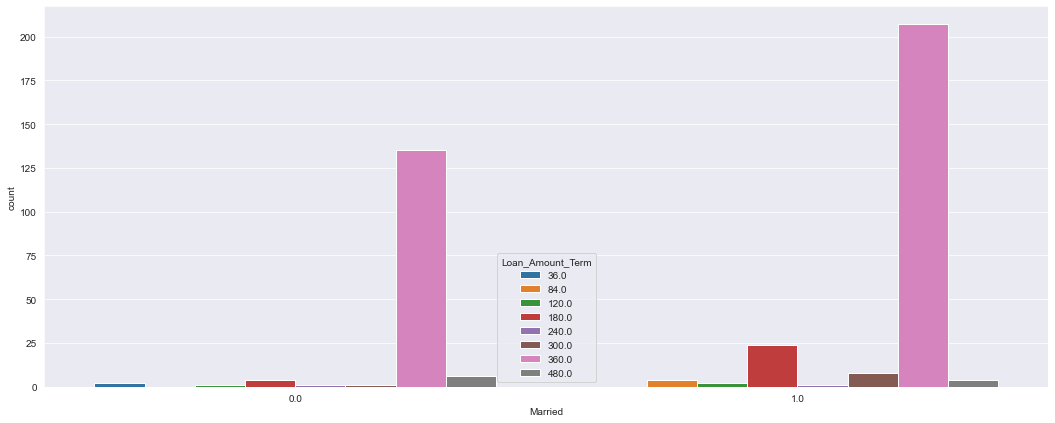

Graduate


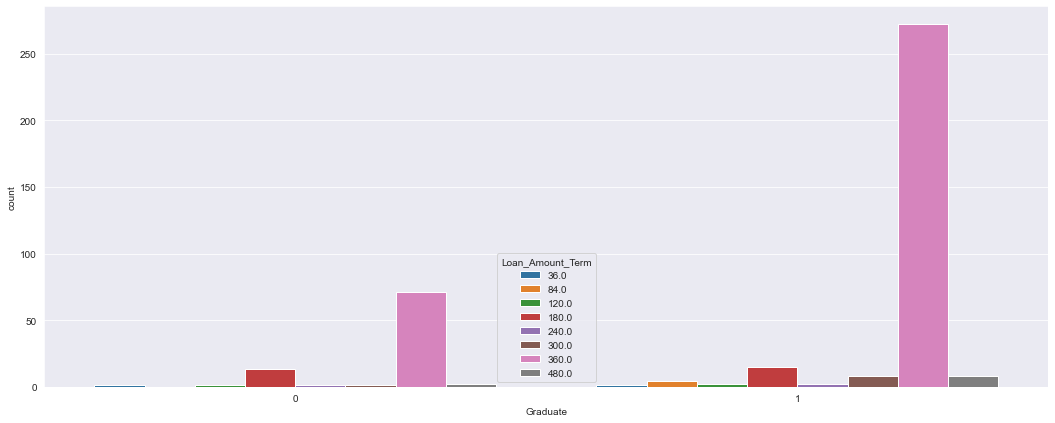

Self_Employed


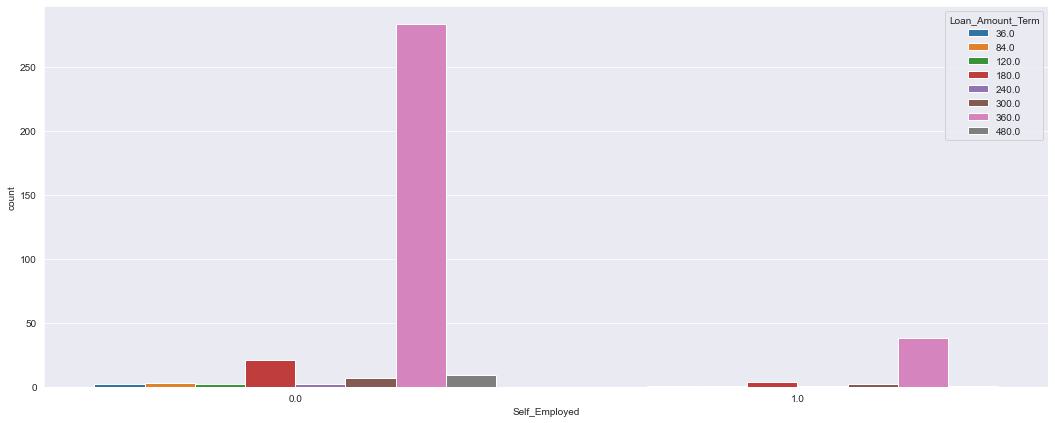

Credit_History


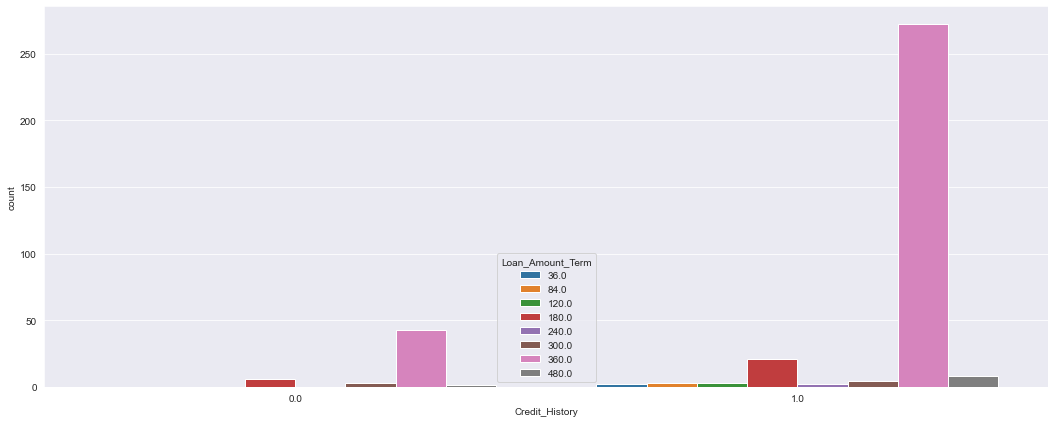

In [86]:
for col in discrete_features:
    print(col)
    plt.figure(figsize = (18,7))
    plt.xlabel(col)
    plt.ylabel('count')
    sns.countplot(data=train_df, x=col, hue="Loan_Amount_Term")
    plt.show()

Loan_Amount_Term


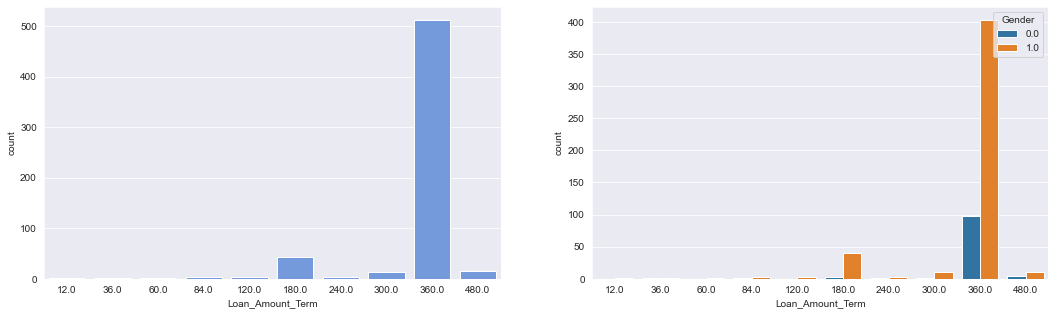

Gender


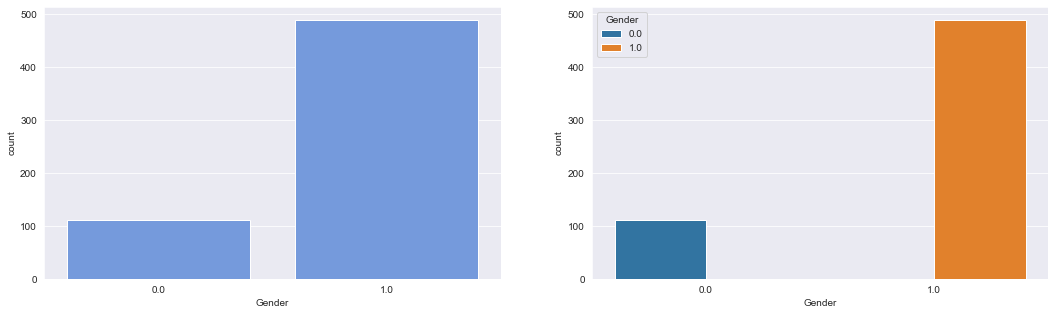

Married


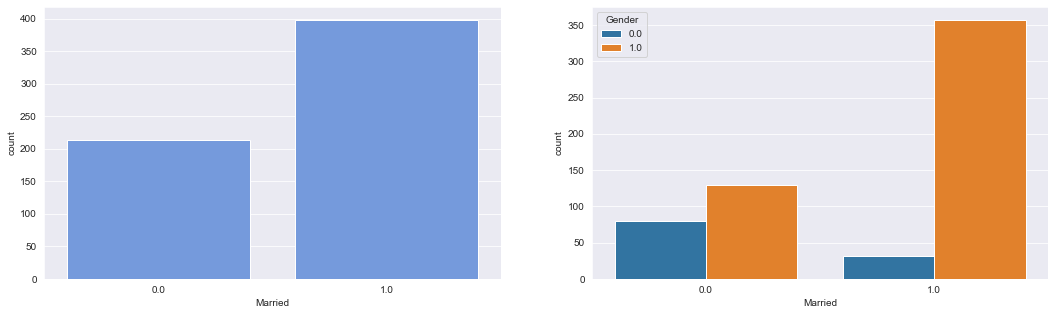

Graduate


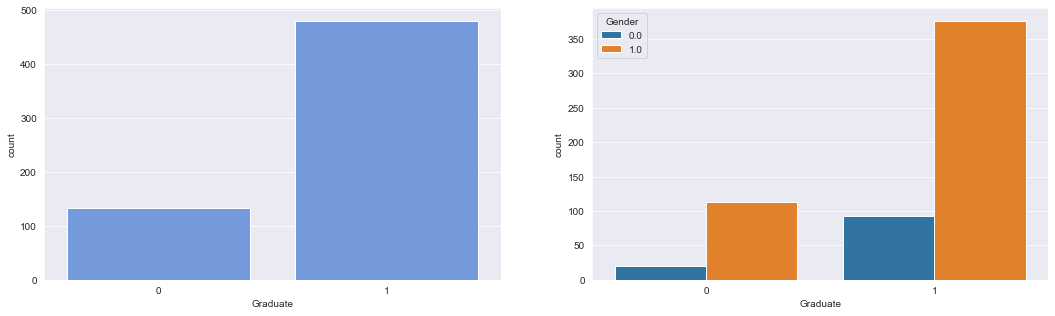

Self_Employed


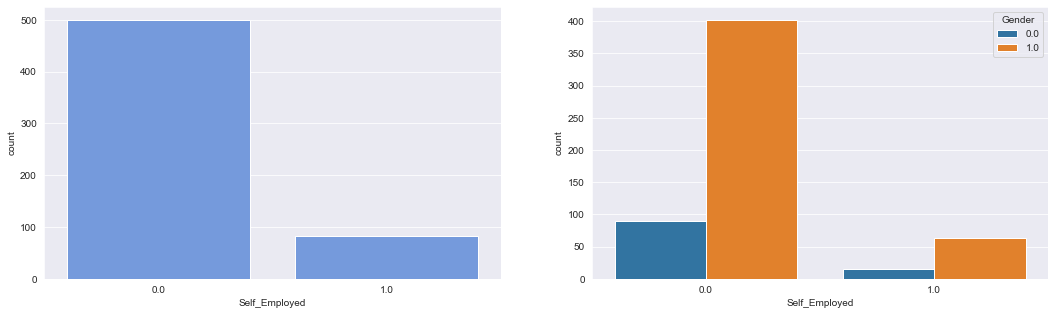

Credit_History


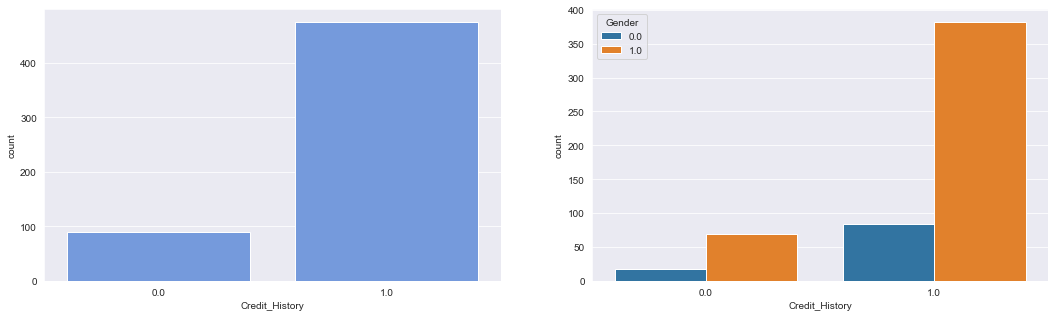

In [87]:
for col in discrete_features:
    print(col)
    plt.figure(figsize = (18,5))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col,color='cornflowerblue')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x=col, hue="Gender")
    plt.show()

Loan_Amount_Term


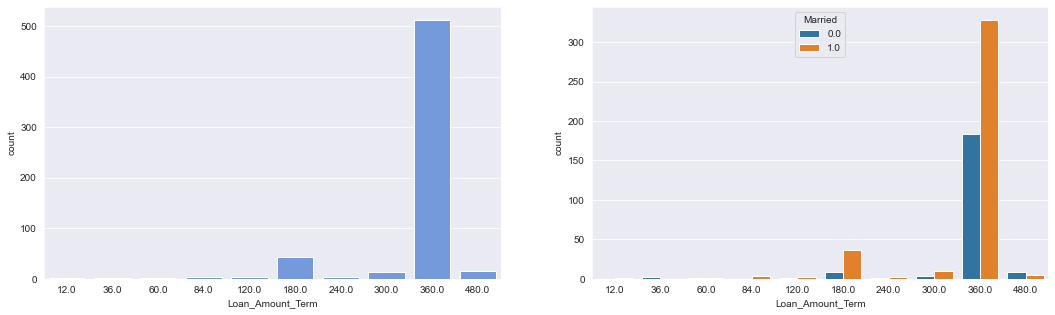

Gender


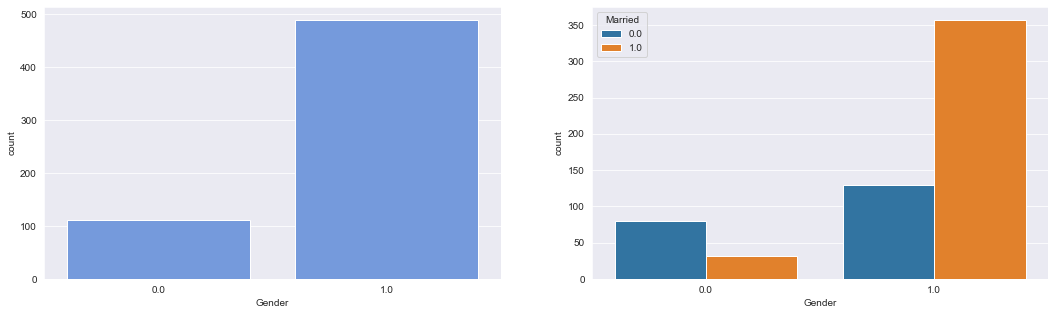

Married


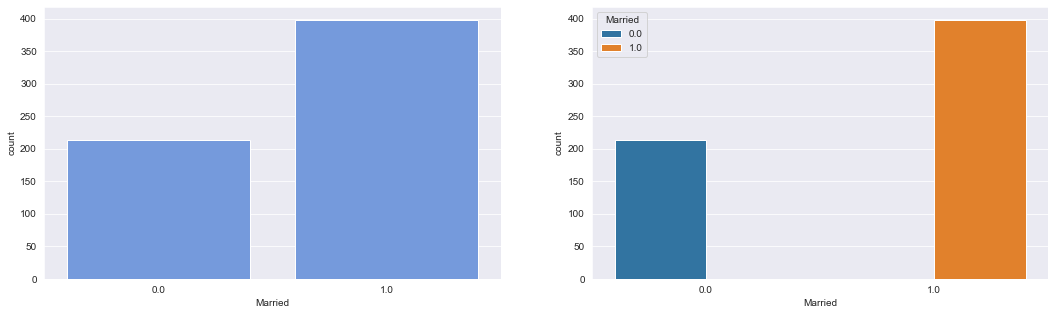

Graduate


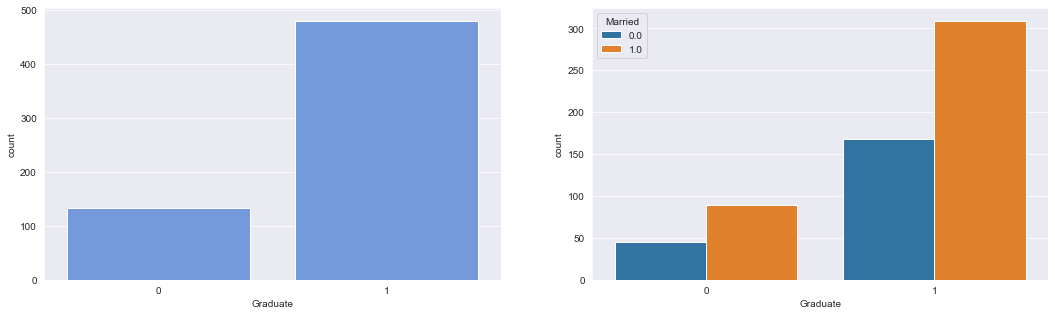

Self_Employed


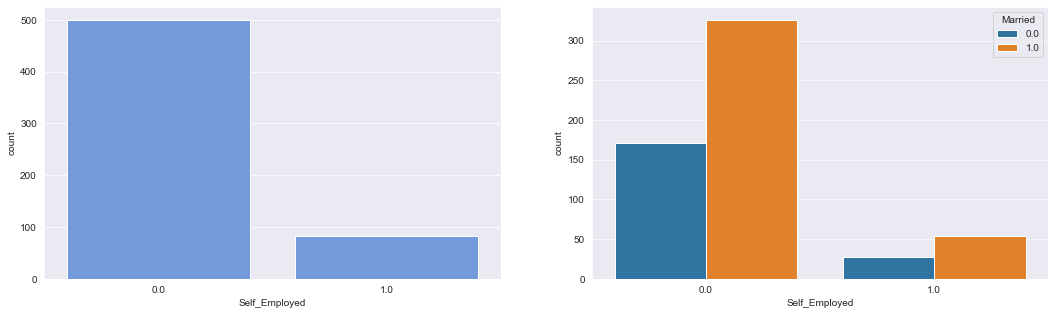

Credit_History


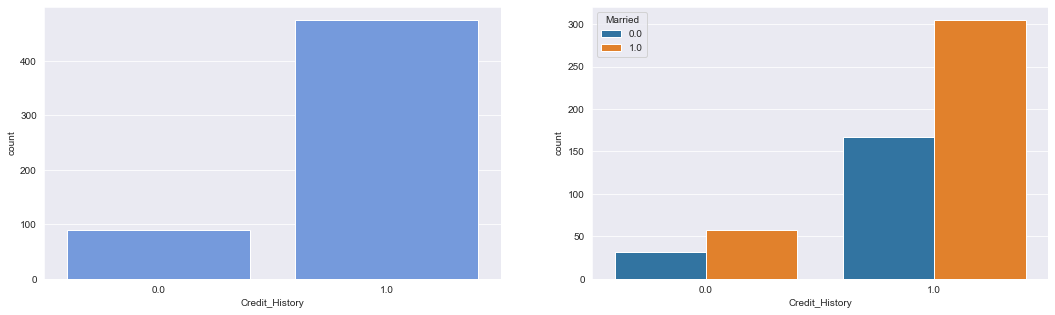

In [88]:
for col in discrete_features:
    print(col)
    plt.figure(figsize = (18,5))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col,color='cornflowerblue')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x=col, hue="Married")
    plt.show()

Loan_Amount_Term


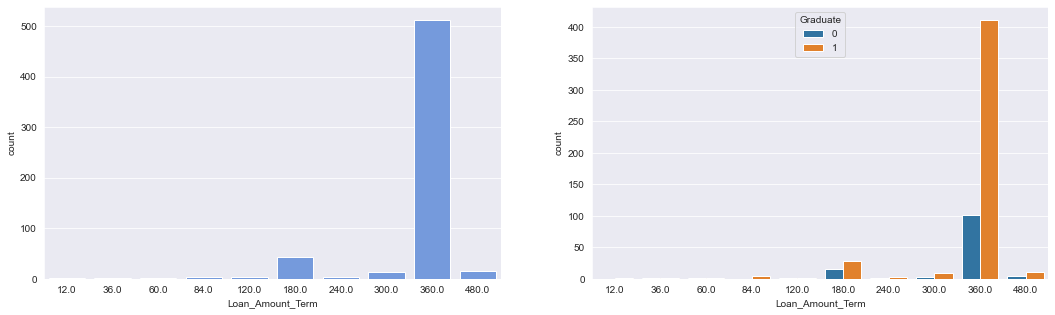

Gender


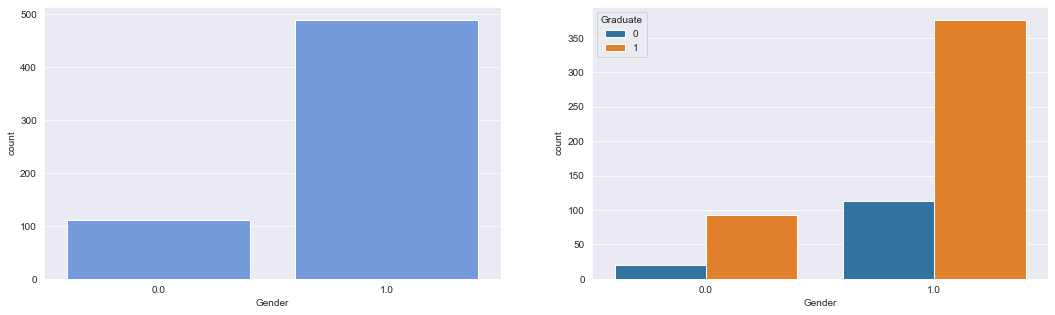

Married


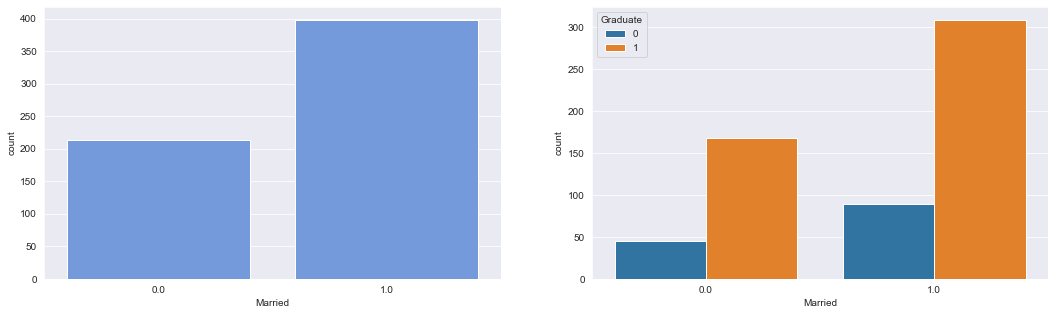

Graduate


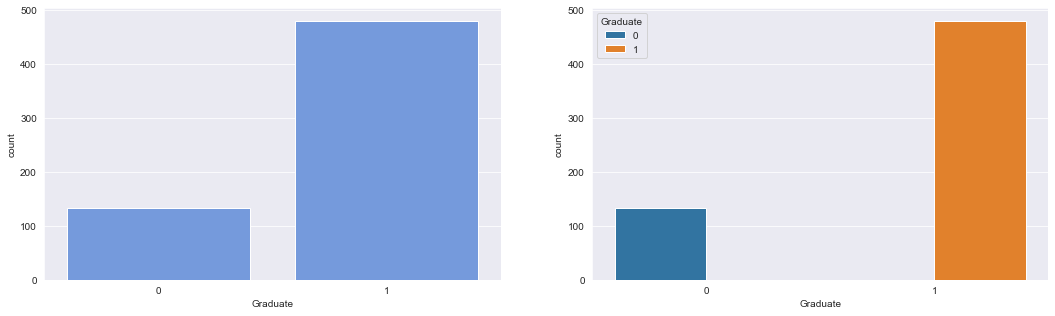

Self_Employed


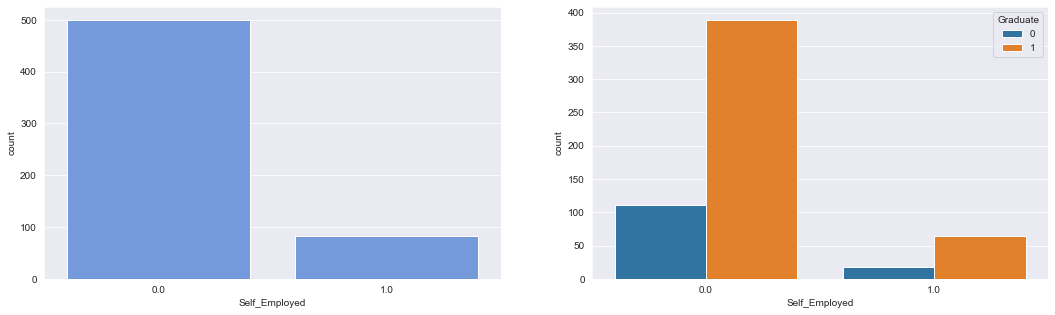

Credit_History


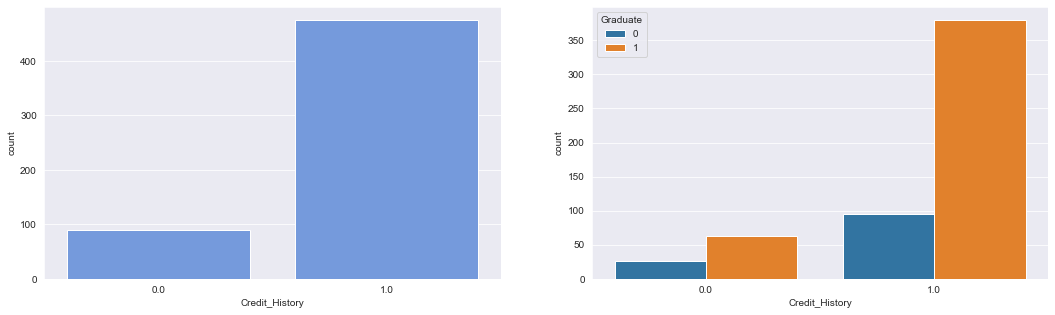

In [89]:
for col in discrete_features:
    print(col)
    plt.figure(figsize = (18,5))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col,color='cornflowerblue')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x=col, hue="Graduate")
    plt.show()

Loan_Amount_Term


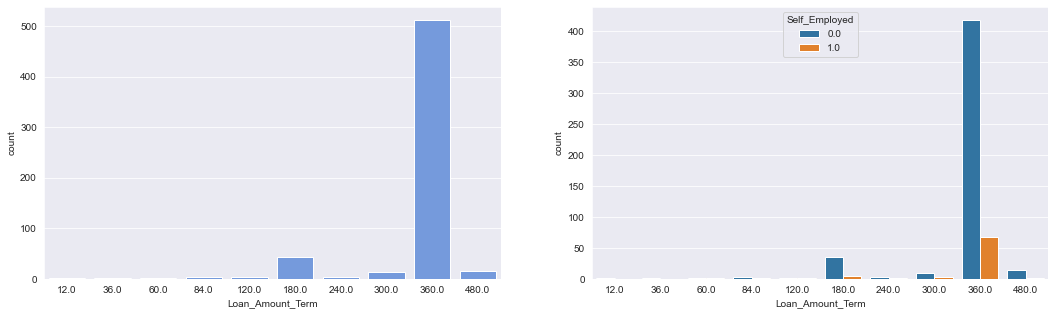

Gender


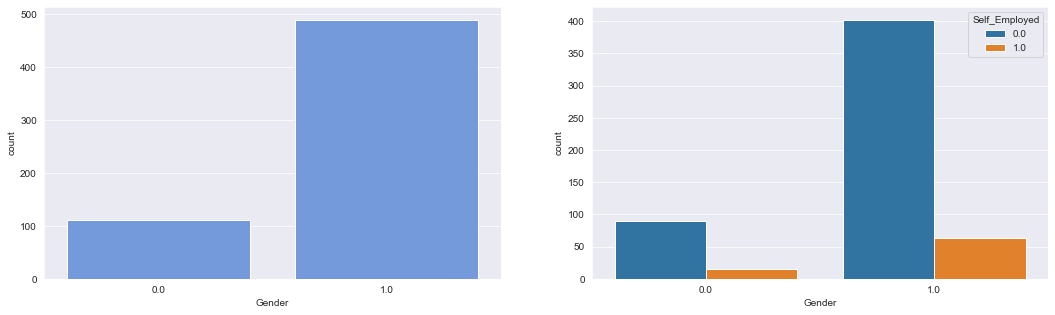

Married


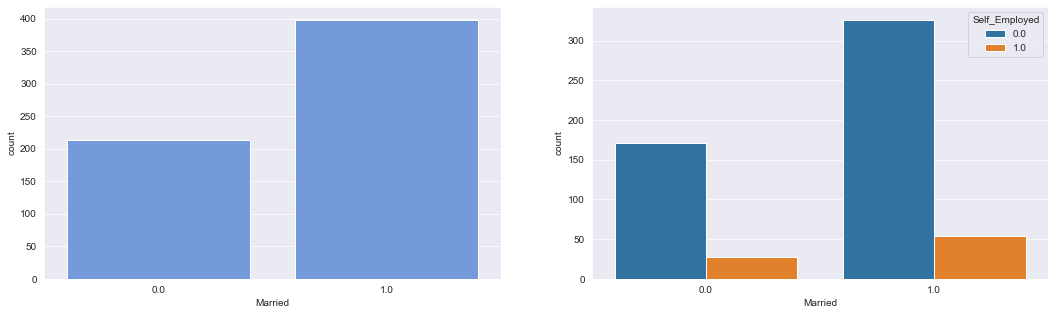

Graduate


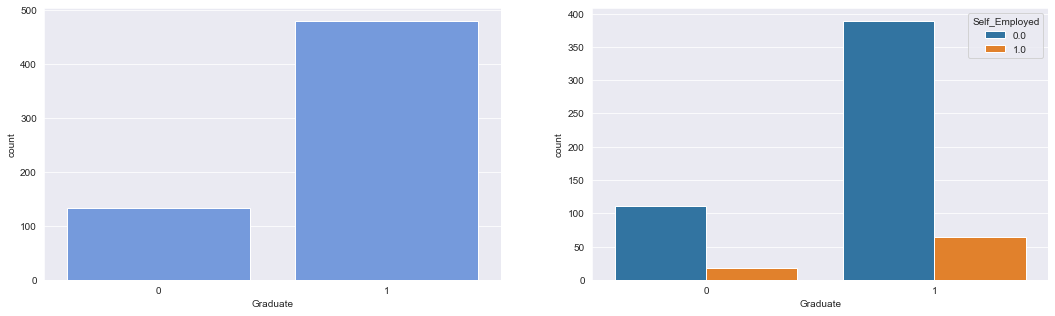

Self_Employed


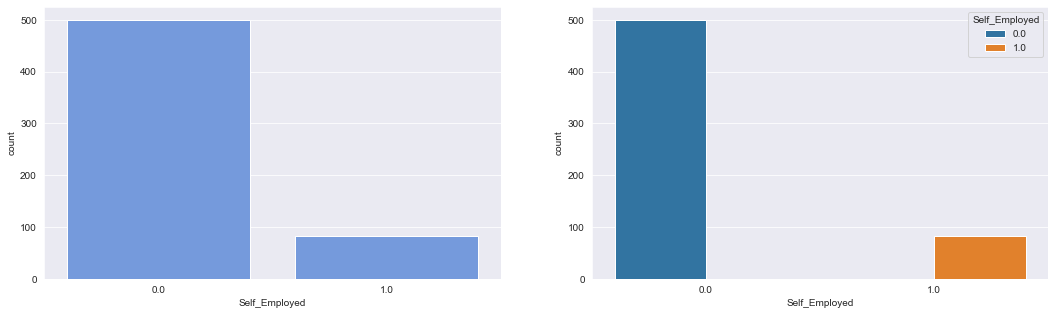

Credit_History


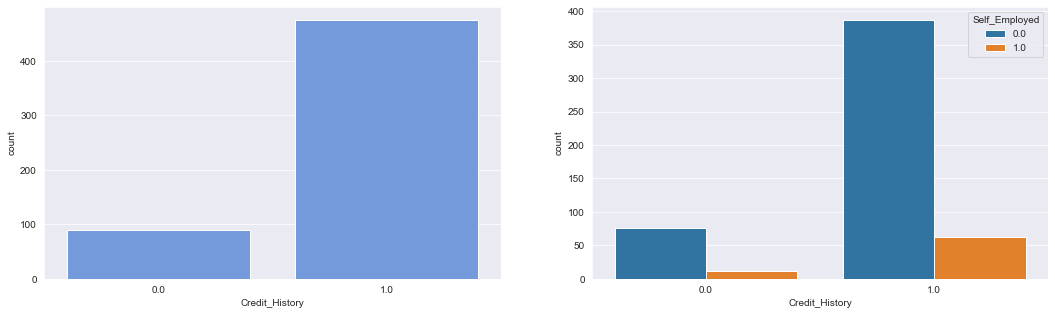

In [90]:
for col in discrete_features:
    print(col)
    plt.figure(figsize = (18,5))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col,color='cornflowerblue')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x=col, hue="Self_Employed")
    plt.show()

Loan_Amount_Term


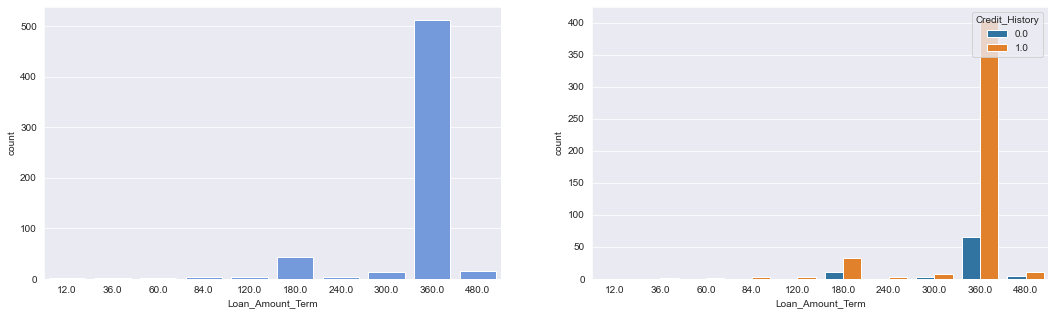

Gender


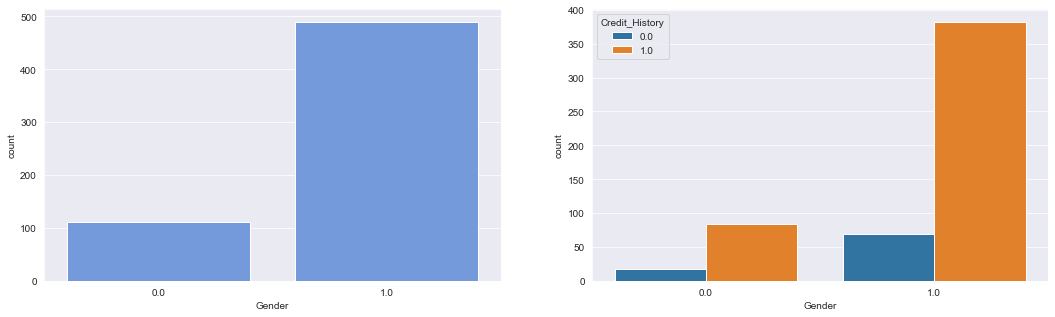

Married


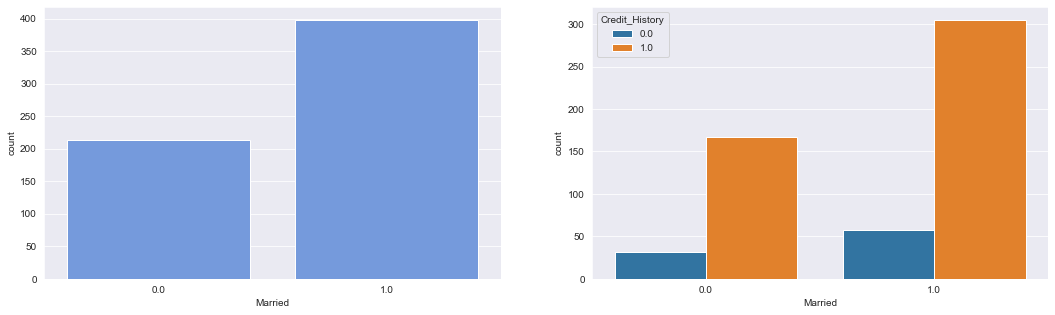

Graduate


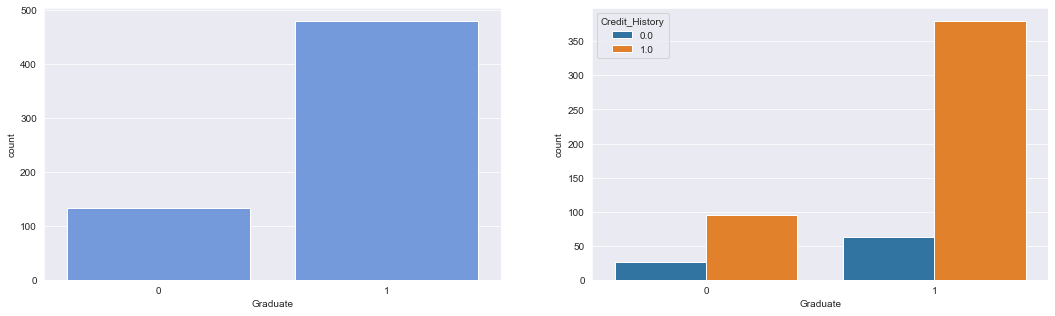

Self_Employed


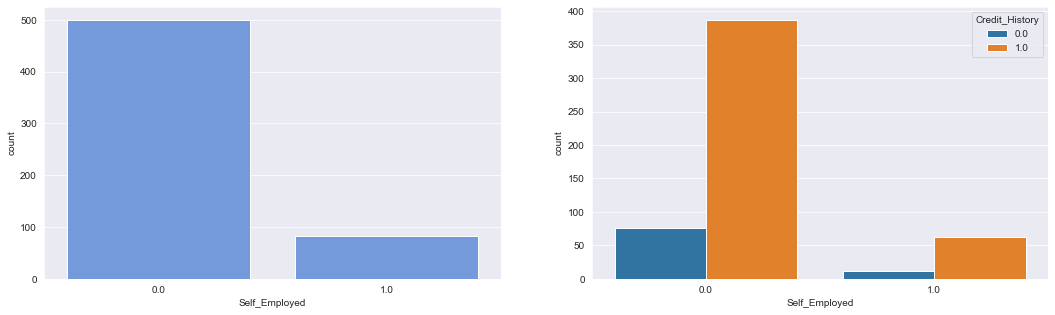

Credit_History


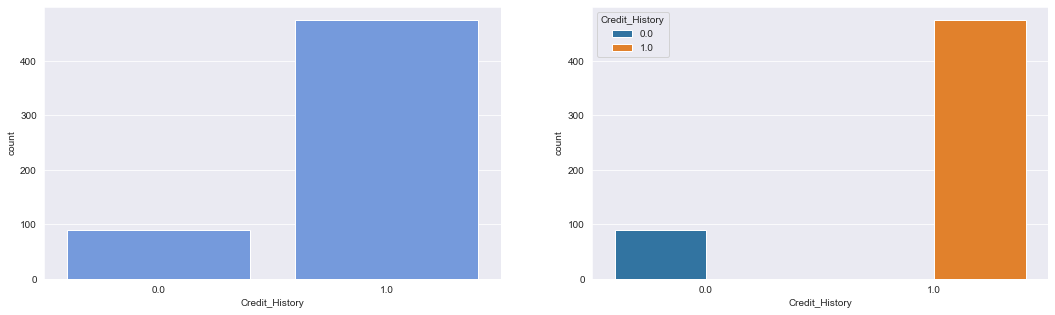

In [91]:
for col in discrete_features:
    print(col)
    plt.figure(figsize = (18,5))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col,color='cornflowerblue')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x=col, hue="Credit_History")
    plt.show()

In [92]:
continuous_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [93]:
discrete_features

Index(['Loan_Amount_Term', 'Gender', 'Married', 'Graduate', 'Self_Employed',
       'Credit_History'],
      dtype='object')

ApplicantIncome


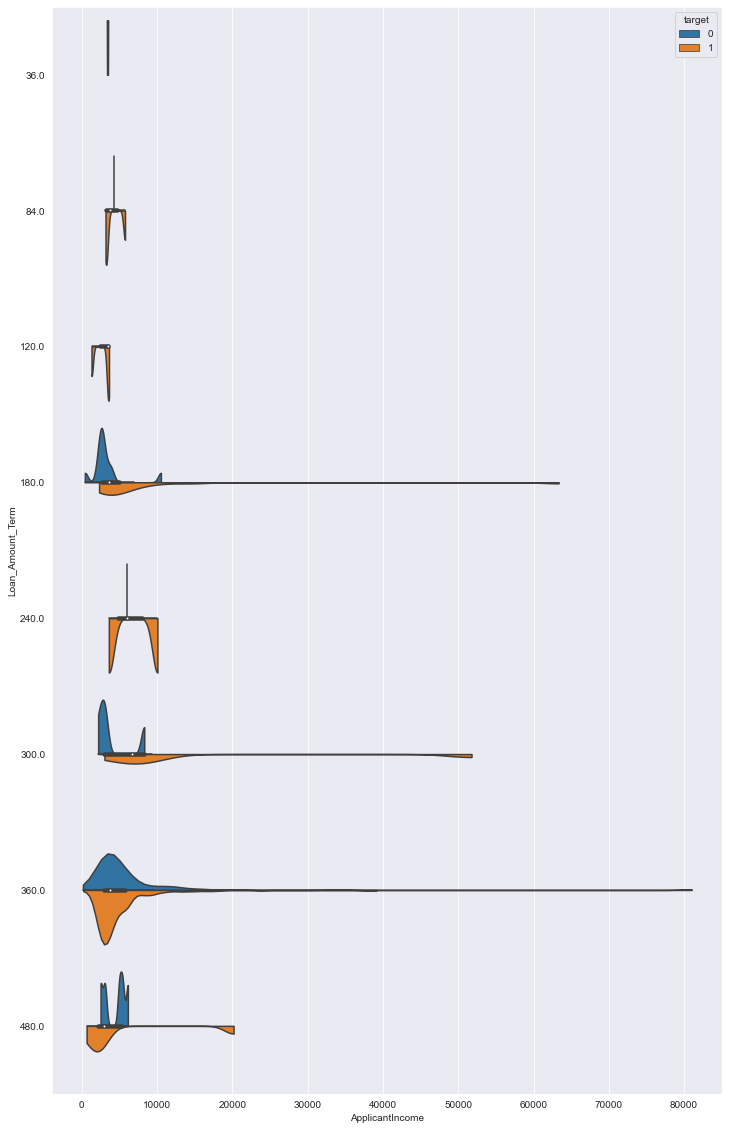

CoapplicantIncome


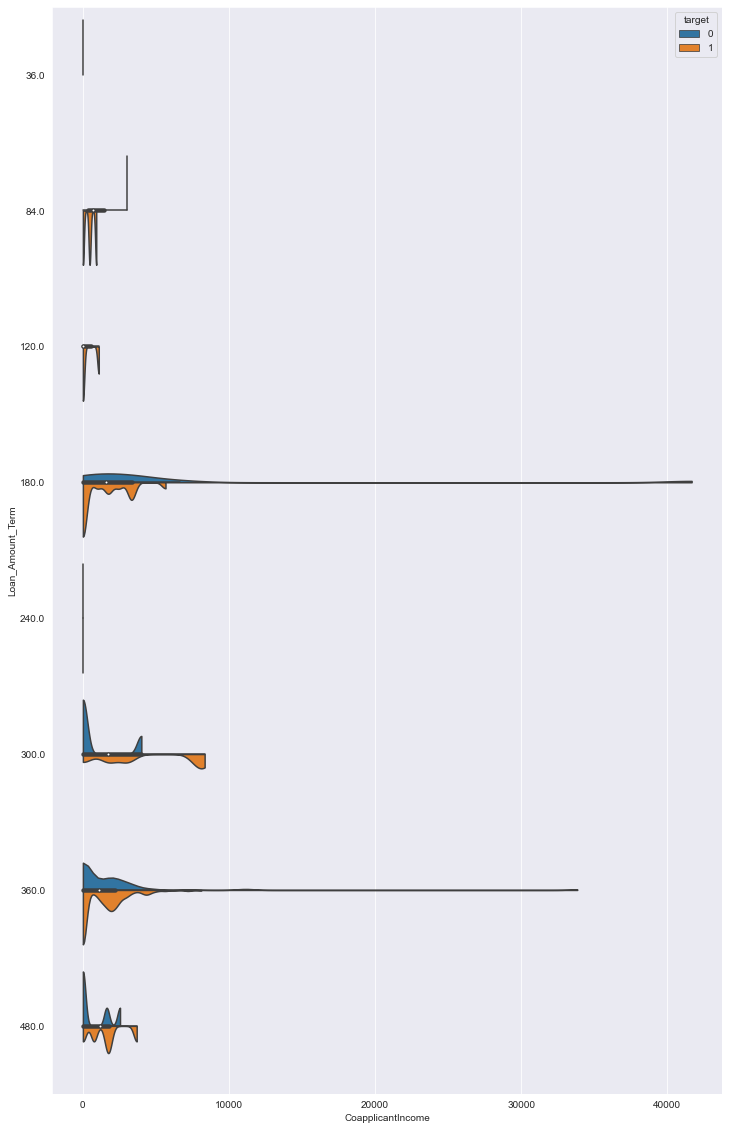

LoanAmount


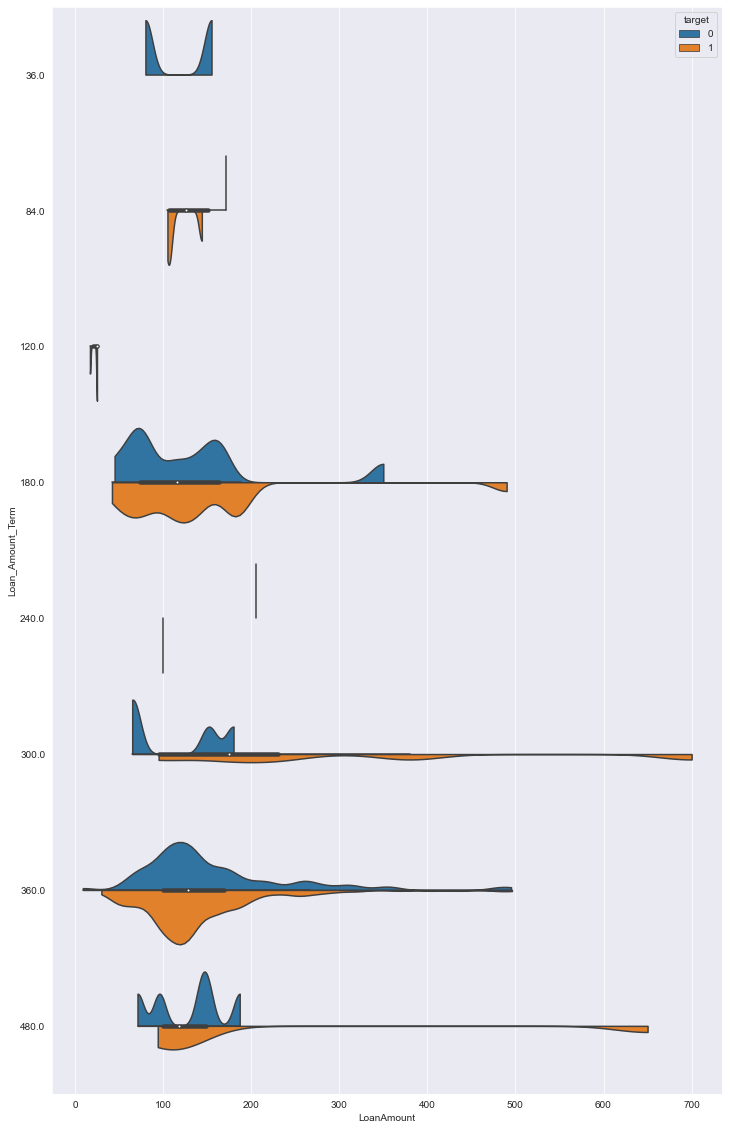

In [94]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (12,20))
    sns.violinplot(data=train_df, x=col, y="Loan_Amount_Term", hue="target", split=True,orient='h', bw=.15,cut=0)
    plt.xlabel(col)
    plt.ylabel('Loan_Amount_Term')
    plt.show()

ApplicantIncome


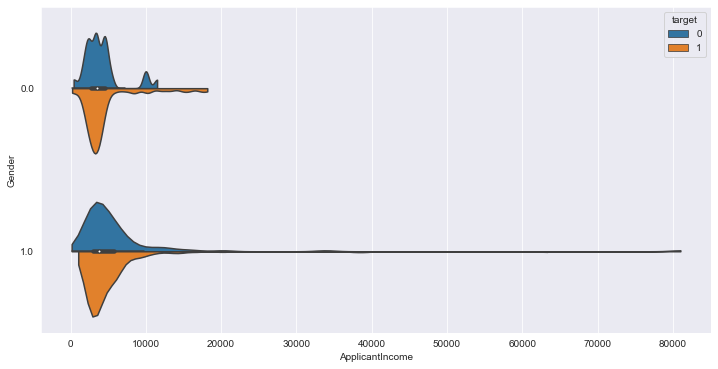

CoapplicantIncome


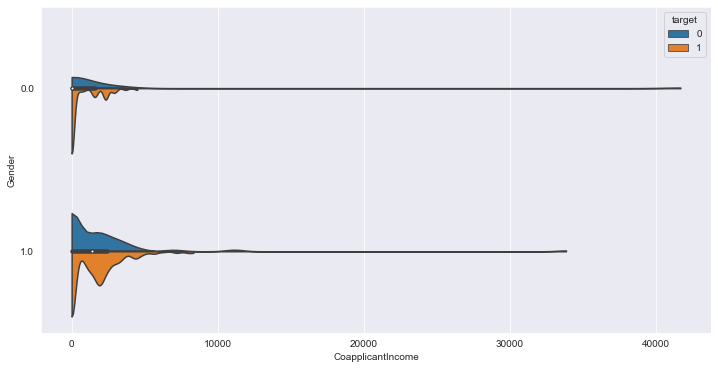

LoanAmount


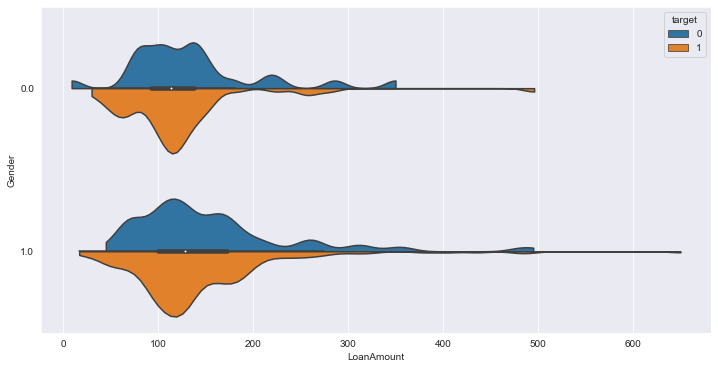

In [95]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (12,6))
    sns.violinplot(data=train_df, x=col, y="Gender", hue="target", split=True,orient='h', bw=.15,cut=0)
    plt.xlabel(col)
    plt.ylabel('Gender')
    plt.show()

ApplicantIncome


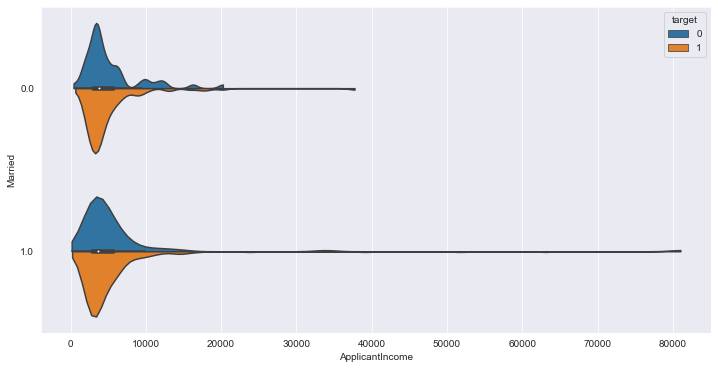

CoapplicantIncome


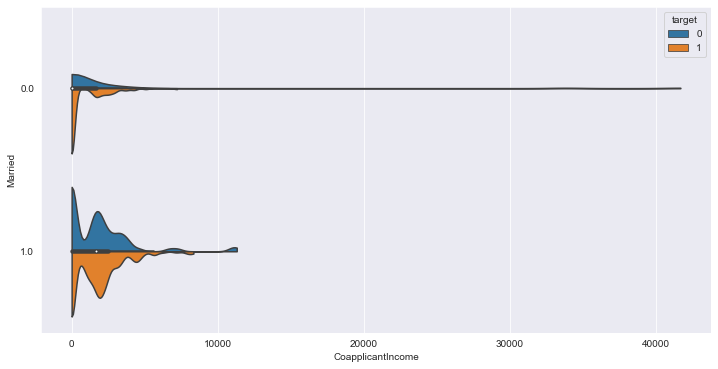

LoanAmount


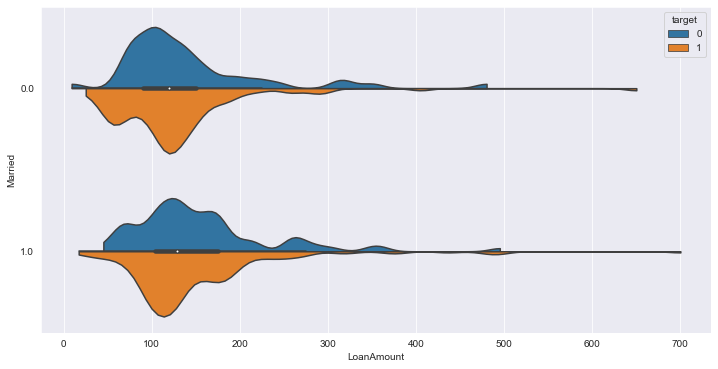

In [96]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (12,6))
    sns.violinplot(data=train_df, x=col, y="Married", hue="target", split=True,orient='h',bw=.15,cut=0)
    plt.xlabel(col)
    plt.ylabel('Married')
    plt.show()

ApplicantIncome


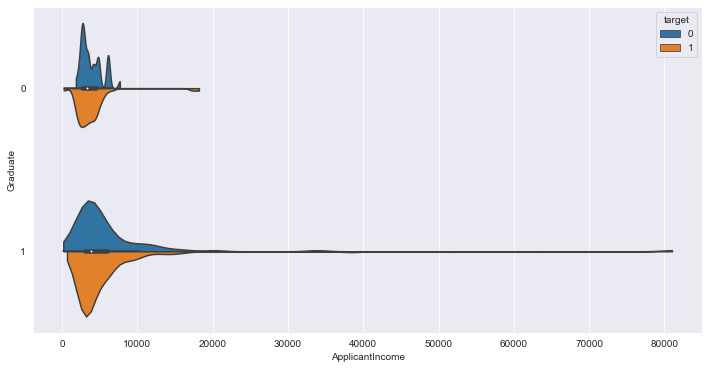

CoapplicantIncome


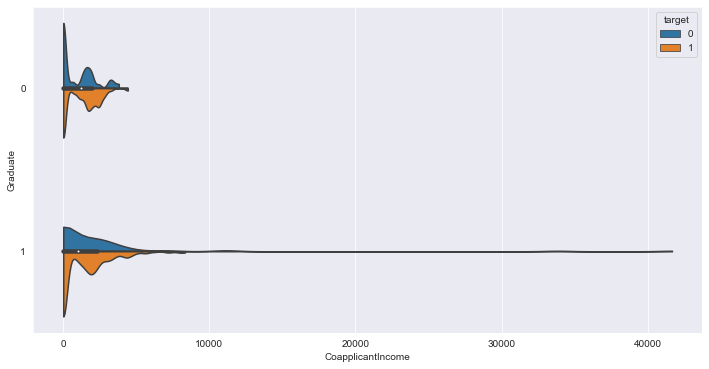

LoanAmount


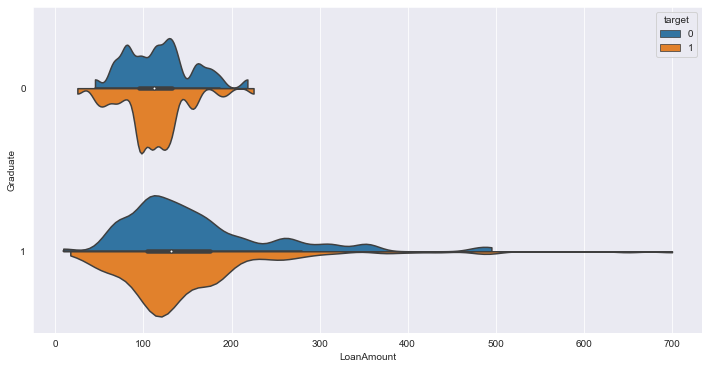

In [97]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (12,6))
    sns.violinplot(data=train_df, x=col, y="Graduate", hue="target", split=True,orient='h', bw=.15,cut=0)
    plt.xlabel(col)
    plt.ylabel('Graduate')
    plt.show()

ApplicantIncome


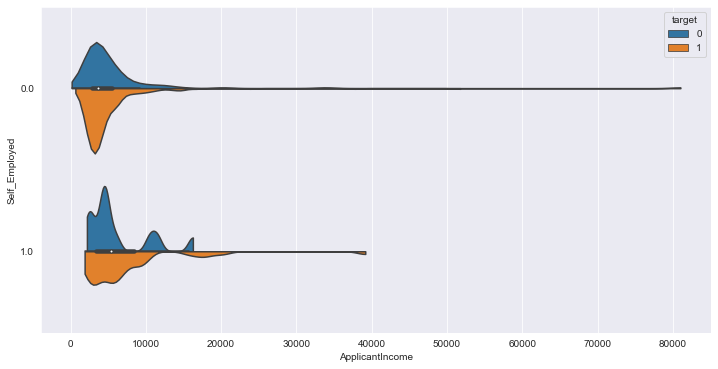

CoapplicantIncome


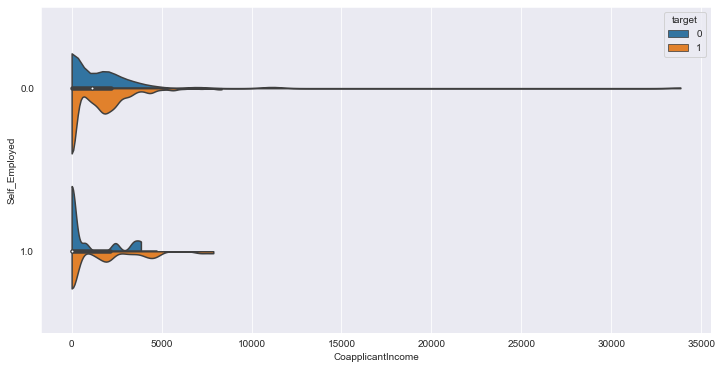

LoanAmount


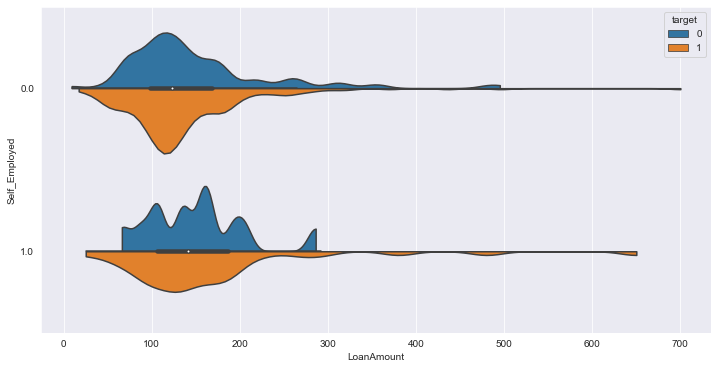

In [98]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (12,6))
    sns.violinplot(data=train_df, x=col, y="Self_Employed", hue="target", split=True,orient='h', bw=.15,cut=0)
    plt.xlabel(col)
    plt.ylabel('Self_Employed')
    plt.show()

ApplicantIncome


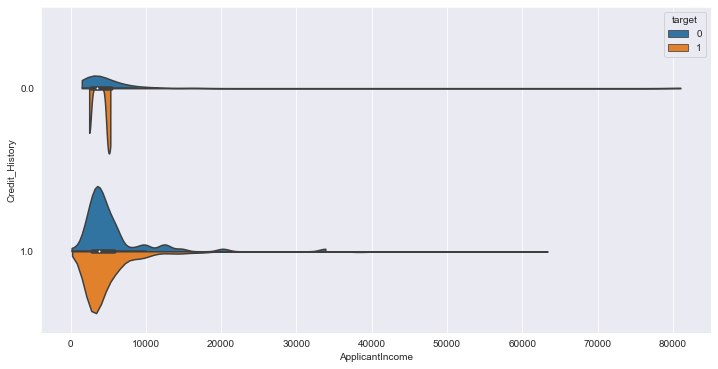

CoapplicantIncome


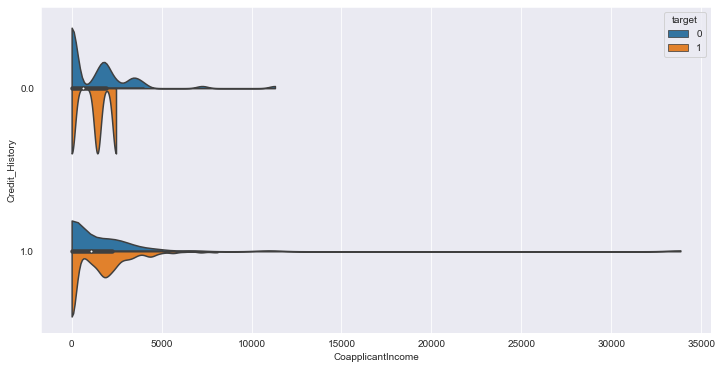

LoanAmount


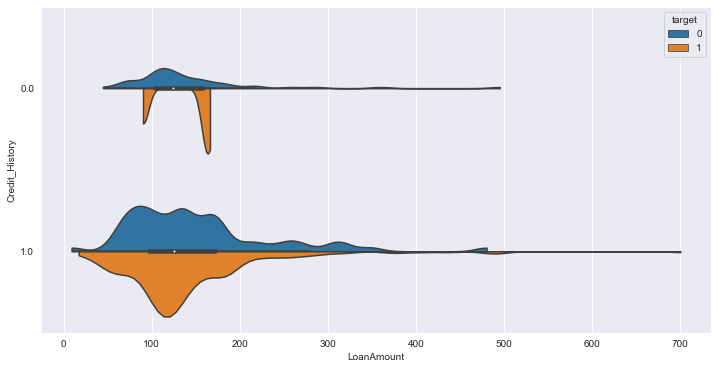

In [99]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (12,6))
    sns.violinplot(data=train_df, x=col, y="Credit_History", hue="target", split=True,orient='h', bw=.15,cut=0)
    plt.xlabel(col)
    plt.ylabel('Credit_History')
    plt.show()

In [100]:
numerical_features

Index(['Gender', 'Married', 'Graduate', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'target'],
      dtype='object')

In [101]:
categorical_features

Index(['Dependents', 'Property_Area'], dtype='object')

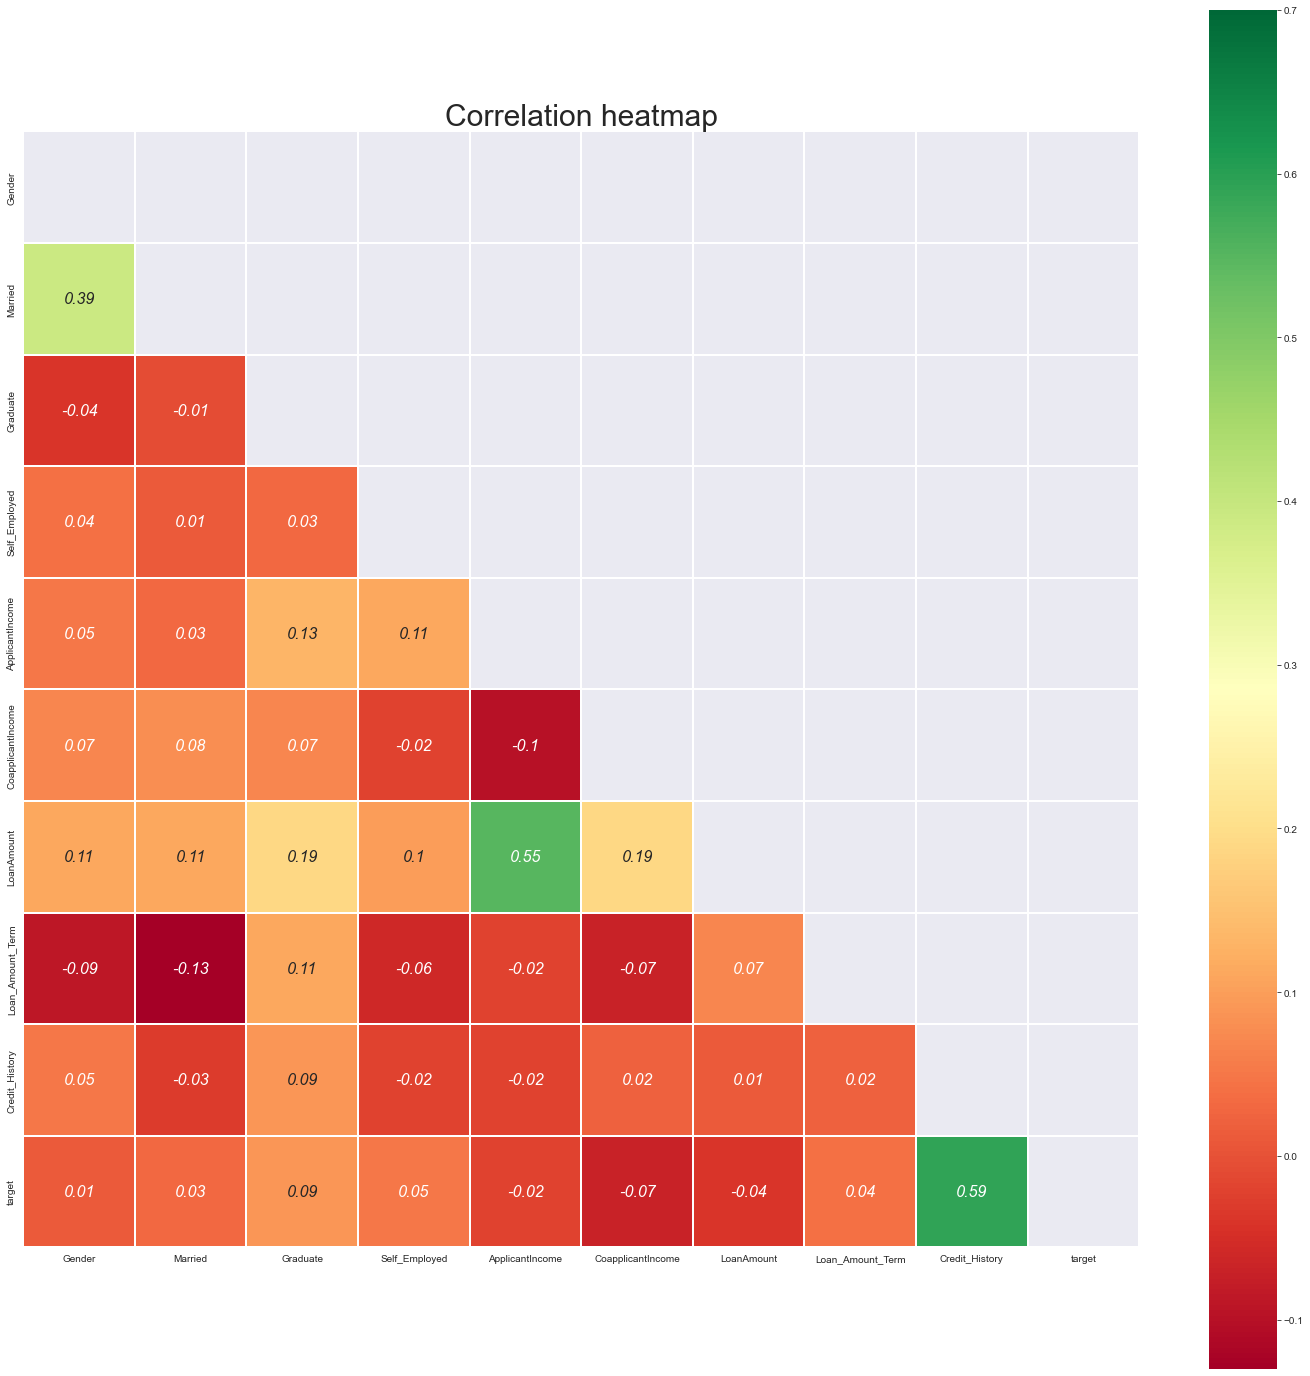

In [102]:
# Finds correlation between Independent and dependent attributes

mask = np.zeros_like(train_df[numerical_features].corr(),dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (25,25))
plt.title('Correlation heatmap', fontsize = 30)

sns.heatmap(np.round_(train_df[numerical_features].corr(),decimals=2),cmap='RdYlGn',linewidths=0.25,square=True,annot=True,
            vmax=0.7,linecolor='w',annot_kws={'size':16,'style':'oblique'},mask=mask)

plt.show()

### Observation :

1. We can see there is positive correlation between 'Credit_History' and 'target'

### Multicollinearity

4. there is clear positive correlation among ('Loan_Amount','Applicants Income')

#### We need to be very careful with this Multicollinearity when using 'Linear ML Models'

## Categorical_features

### Univariate/Bivariate analysis

In [103]:
train_df[categorical_features].nunique().sort_values(ascending=False)

Dependents       4
Property_Area    3
dtype: int64

In [104]:
categorical_features

Index(['Dependents', 'Property_Area'], dtype='object')

Dependents


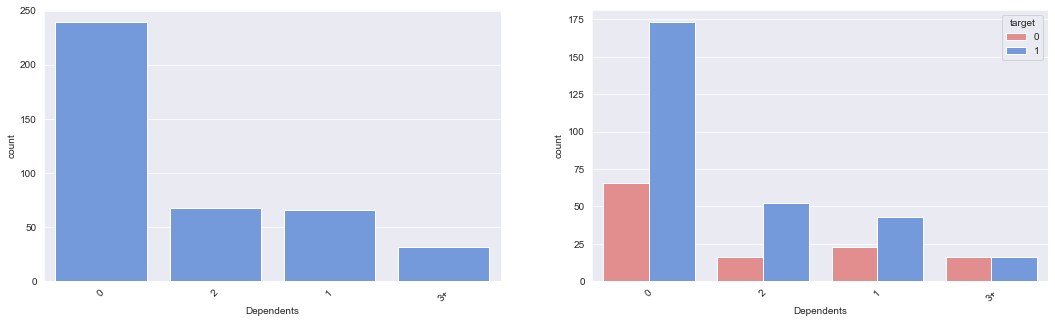

Property_Area


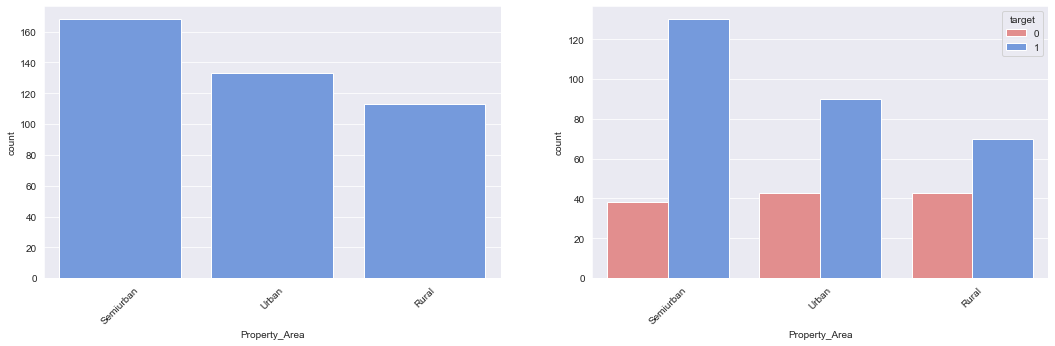

In [105]:
for col in categorical_features:
    print(col)
    plt.figure(figsize = (18,5))
    plt.subplot(1, 2, 1)
    sns.countplot(data=train_df, x=col,color='cornflowerblue',order=train_df[col].value_counts().index)
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.countplot(data=train_df, x=col, hue="target",palette=['lightcoral','cornflowerblue'],order=train_df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.show()

### Observations :
    1. we can clearly see there is a high chance of rejection for Rural properties compared to Urban and Semiurban

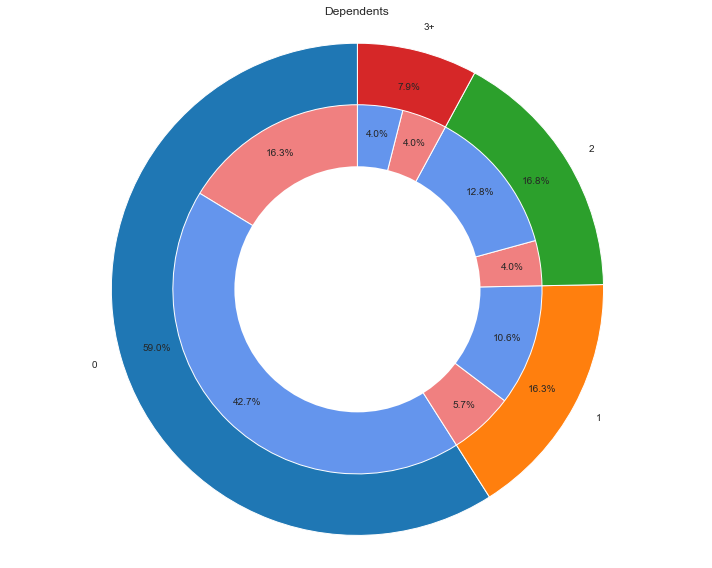

In [106]:
labels = train_df['Dependents'].value_counts().sort_index().index
sizes = train_df['Dependents'].value_counts().sort_index().values
sizes_gender = train_df.groupby(['Dependents','target'])['target'].count().values
colors_gender = ['lightcoral','cornflowerblue','lightcoral','cornflowerblue','lightcoral','cornflowerblue']
 
# Plot
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%', pctdistance=0.85)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Dependents')
plt.axis('equal')
plt.tight_layout()
plt.show()

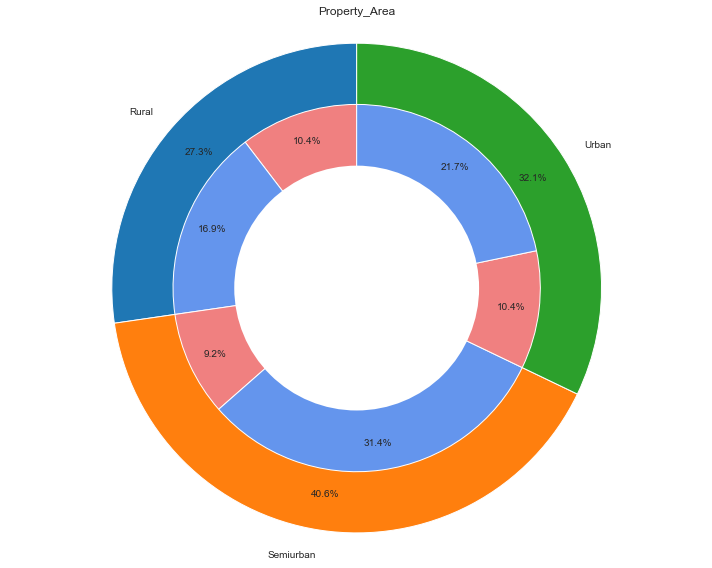

In [107]:
labels = train_df['Property_Area'].value_counts().sort_index().index
sizes = train_df['Property_Area'].value_counts().sort_index().values
sizes_gender = train_df.groupby(['Property_Area','target'])['target'].count().values
colors_gender = ['lightcoral','cornflowerblue','lightcoral','cornflowerblue','lightcoral','cornflowerblue']
 
# Plot
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%', pctdistance=0.85)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Property_Area')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [108]:
categorical_features

Index(['Dependents', 'Property_Area'], dtype='object')

In [109]:
discrete_features

Index(['Loan_Amount_Term', 'Gender', 'Married', 'Graduate', 'Self_Employed',
       'Credit_History'],
      dtype='object')

Loan_Amount_Term


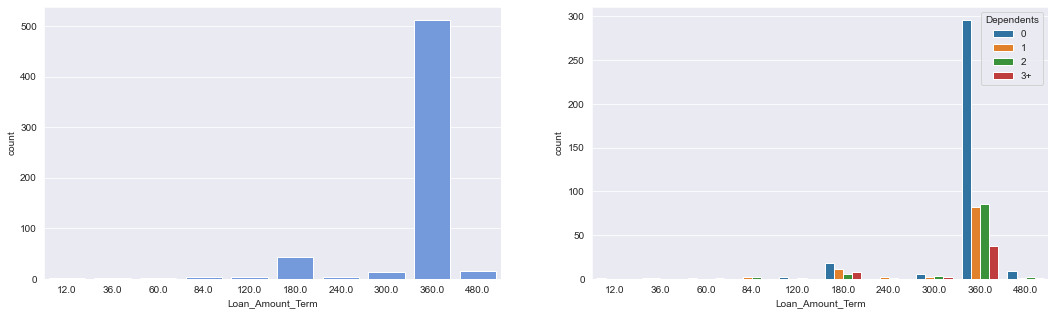

Gender


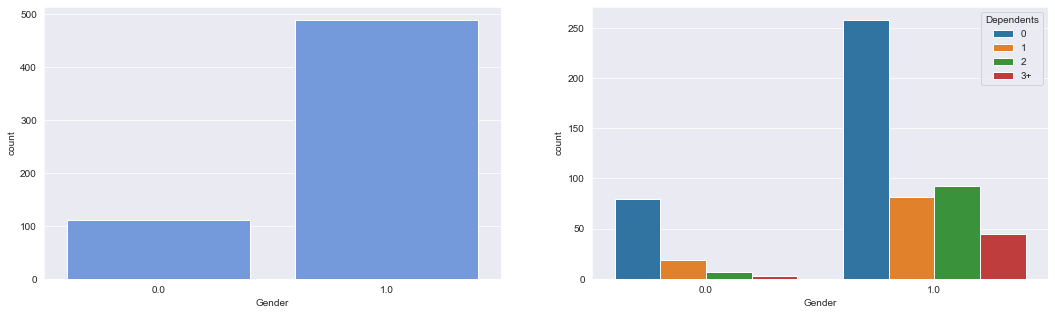

Married


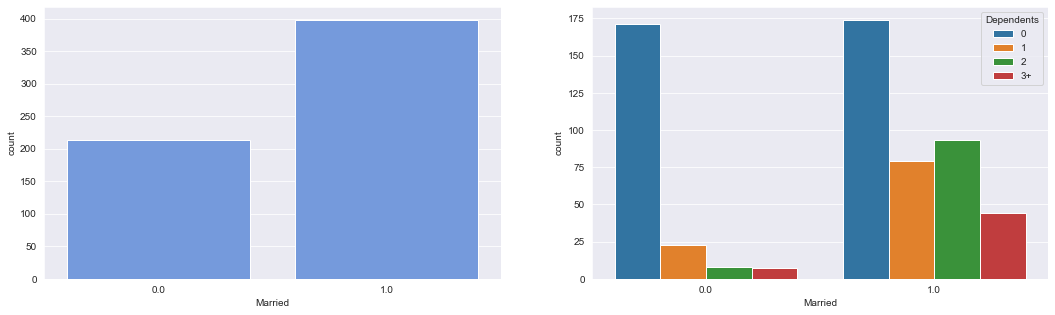

Graduate


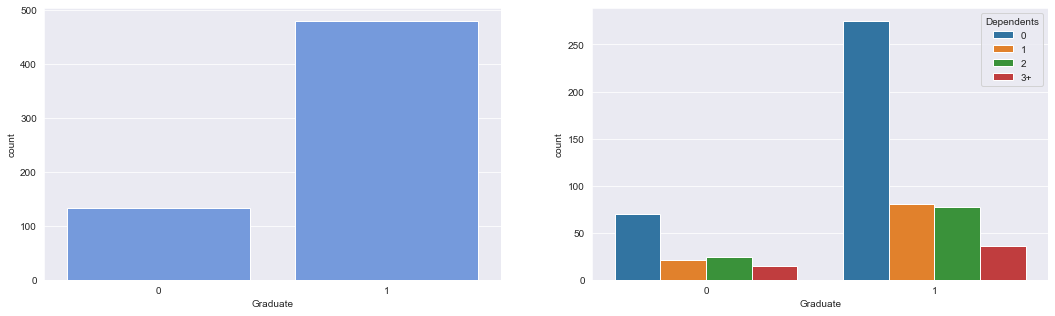

Self_Employed


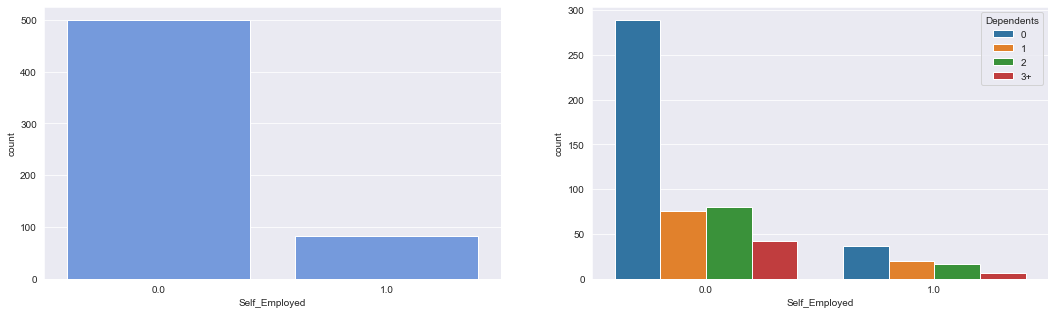

Credit_History


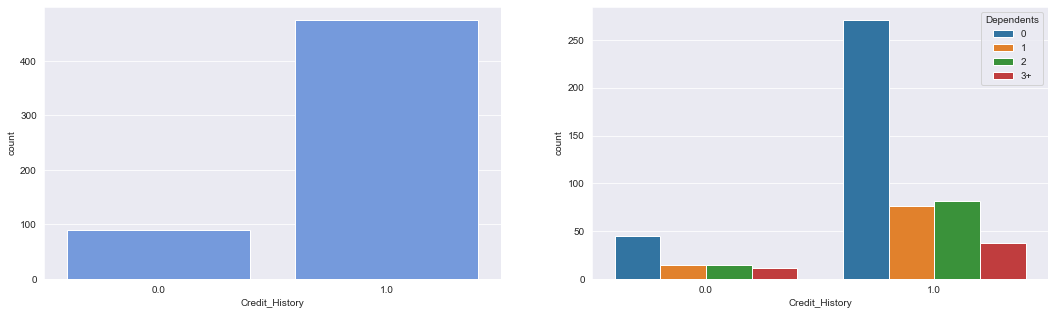

In [110]:
for col in discrete_features:
    print(col)
    plt.figure(figsize = (18,5))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col,color='cornflowerblue')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x=col, hue="Dependents")
    plt.show()

Loan_Amount_Term


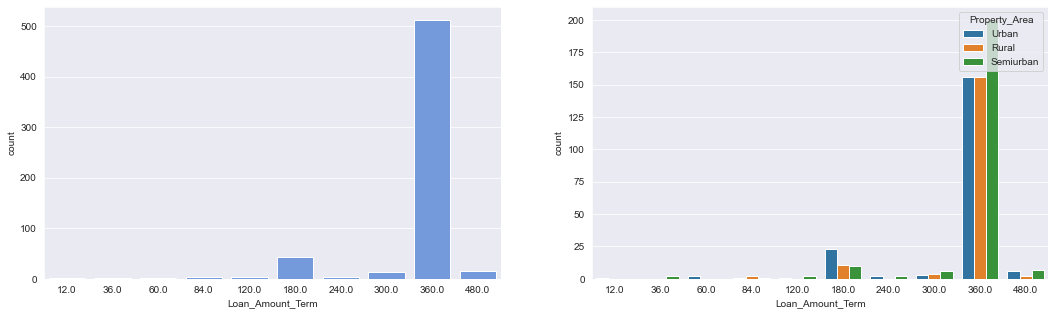

Gender


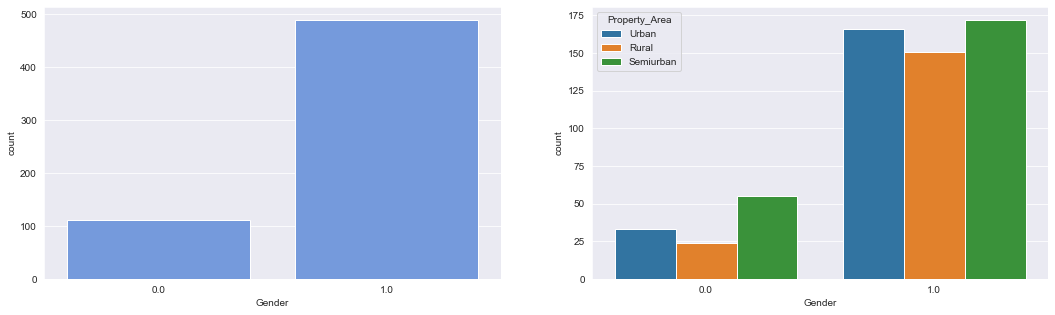

Married


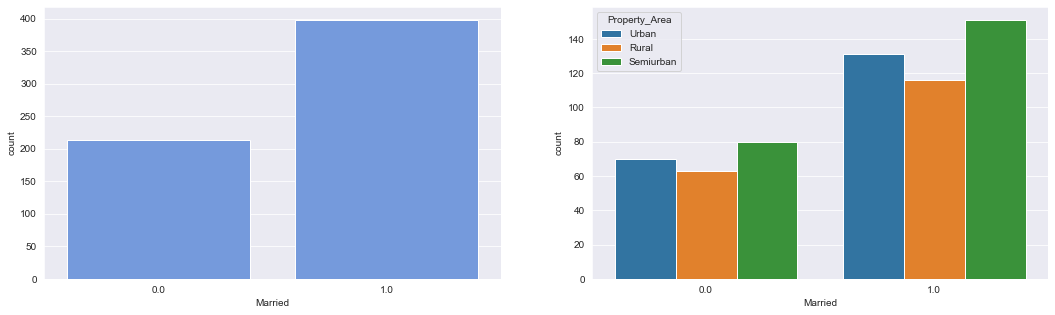

Graduate


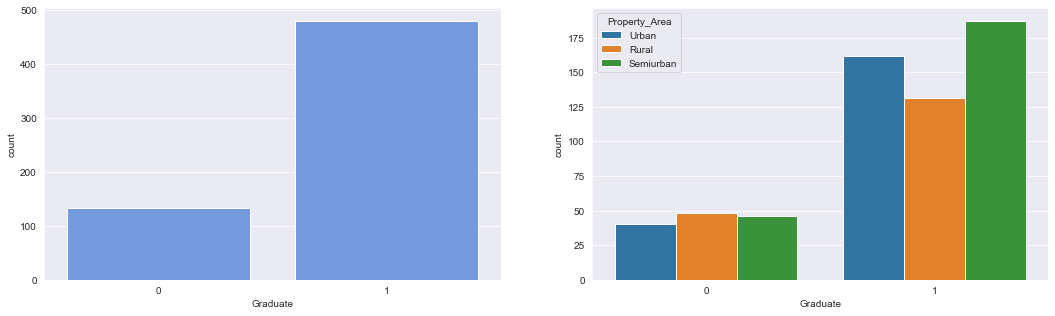

Self_Employed


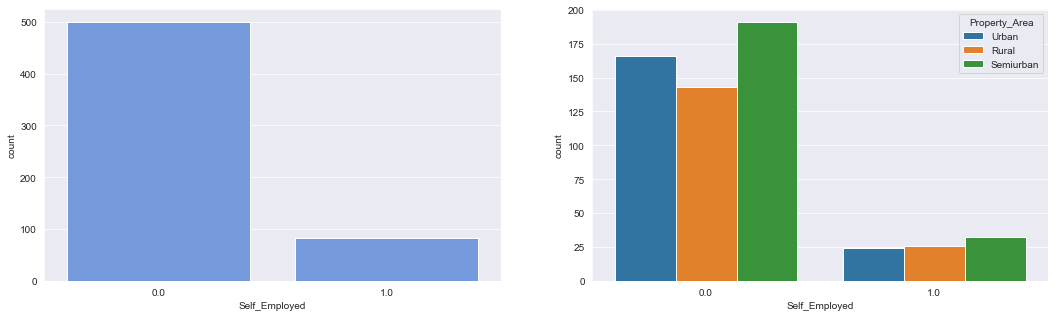

Credit_History


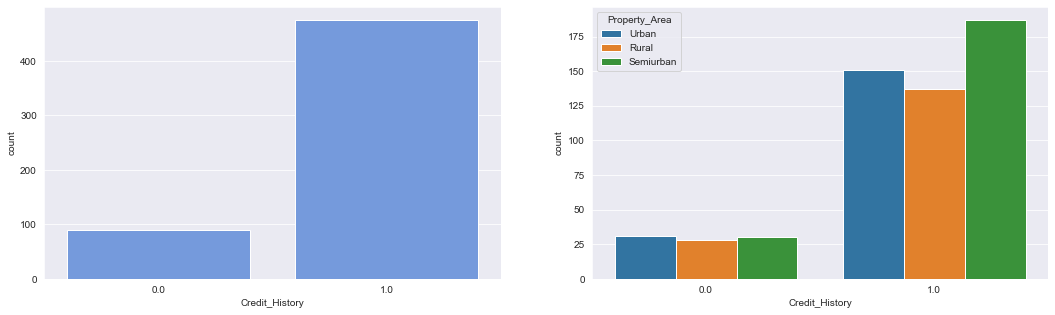

In [111]:
for col in discrete_features:
    print(col)
    plt.figure(figsize = (18,5))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col,color='cornflowerblue')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x=col, hue="Property_Area")
    plt.show()

In [112]:
categorical_features

Index(['Dependents', 'Property_Area'], dtype='object')

ApplicantIncome


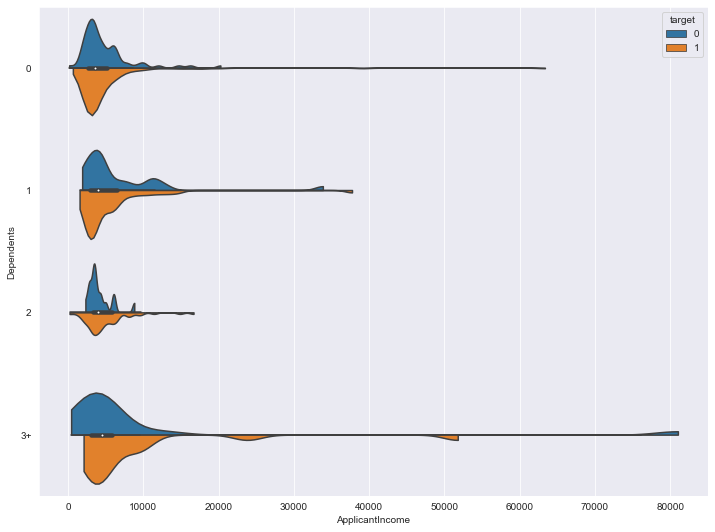

CoapplicantIncome


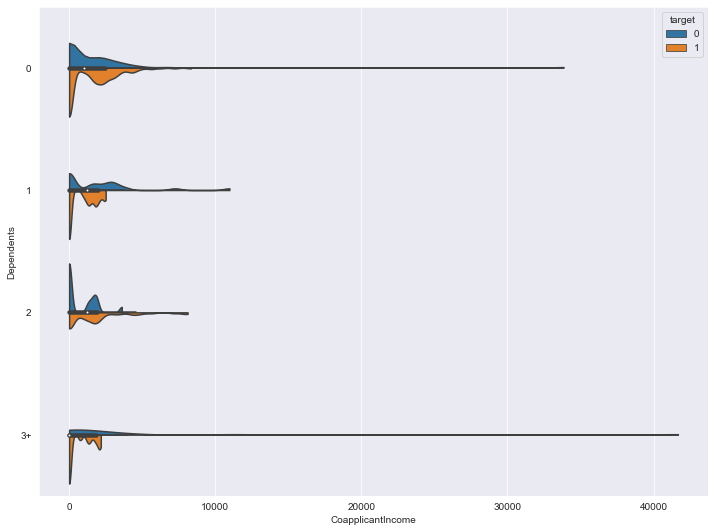

LoanAmount


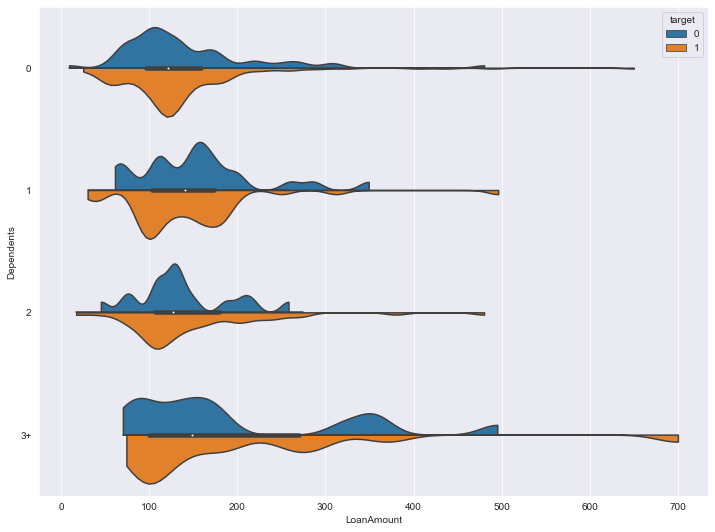

In [113]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (12,9))
    sns.violinplot(data=train_df, x=col, y="Dependents", hue="target", split=True,orient='h', bw=.15,cut=0)
    plt.xlabel(col)
    plt.ylabel('Dependents')
    plt.show()

ApplicantIncome


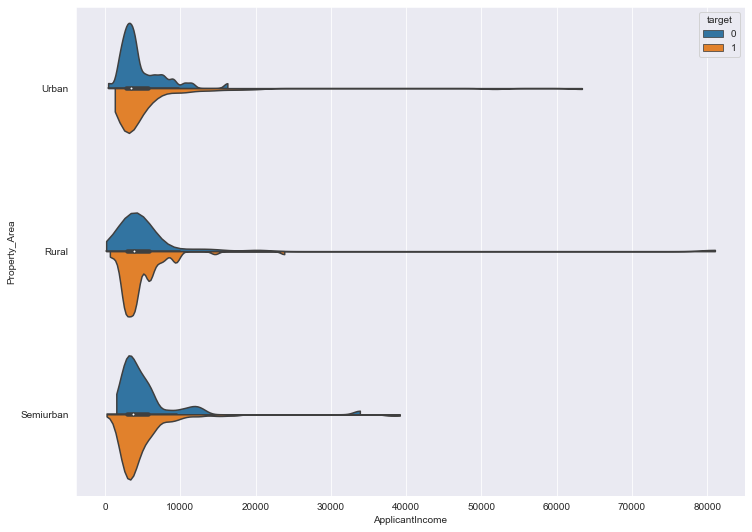

CoapplicantIncome


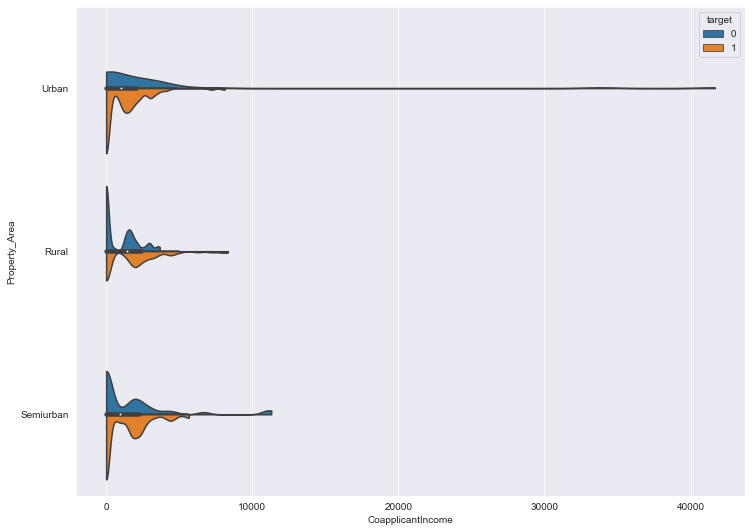

LoanAmount


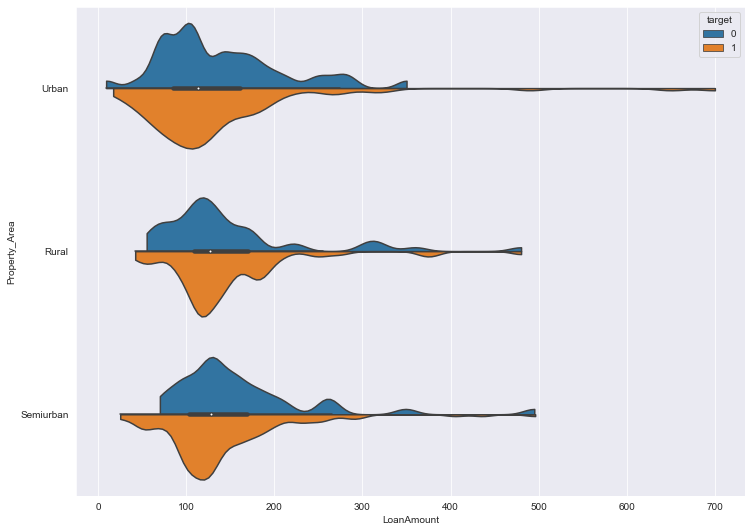

In [114]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (12,9))
    sns.violinplot(data=train_df, x=col, y="Property_Area", hue="target", split=True,orient='h', bw=.15,cut=0)
    plt.xlabel(col)
    plt.ylabel('Property_Area')
    plt.show()

In [115]:
train_df.noytghffd()

AttributeError: 'DataFrame' object has no attribute 'noytghffd'

In [116]:
train_df

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
0       1.0      0.0          0         1            0.0             5849   
1       1.0      1.0          1         1            0.0             4583   
2       1.0      1.0          0         1            1.0             3000   
3       1.0      1.0          0         0            0.0             2583   
4       1.0      0.0          0         1            0.0             6000   
..      ...      ...        ...       ...            ...              ...   
409     1.0      1.0          0         0            0.0             2400   
410     1.0      1.0          1         1            0.0             3400   
411     1.0      1.0          0         1            0.0             3232   
412     0.0      0.0          0         1            0.0             2900   
413     0.0      0.0          0         1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0         NaN             360.0             1.0   
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
..                 ...         ...               ...             ...   
409             3800.0         NaN             180.0             1.0   
410             2500.0       173.0             360.0             1.0   
411             1950.0       108.0             360.0             1.0   
412                0.0        71.0             360.0             1.0   
413                0.0       133.0             360.0             0.0   

    Property_Area  target  
0           Urban       1  
1           Rural       0  
2           Urban       1  
3           Urban       1  
4           Urban       1  
..            ...     ...  
409         Urban       0  
410     Semiurban       1  
411         Rural       1  
412         Rural       1  
413     Semiurban       0  

[414 rows x 12 columns]

In [117]:
val_df

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
0      1.0      1.0          2         0            0.0             3987   
1      1.0      1.0          0         0            0.0             3572   
2      1.0      1.0         3+         1            0.0             3400   
3      1.0      1.0          0         1            0.0             3941   
4      1.0      1.0          1         1            1.0             8666   
..     ...      ...        ...       ...            ...              ...   
95     1.0      1.0          1         1            0.0             5955   
96     1.0      1.0          1         1            0.0             2787   
97     1.0      1.0          0         1            0.0             2768   
98     1.0      1.0          2         1            0.0             4167   
99     1.0      1.0          2         0            0.0             3357   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0              1411.0       157.0             360.0             1.0   
1              4114.0       152.0               NaN             0.0   
2              2500.0       123.0             360.0             0.0   
3              2336.0       134.0             360.0             1.0   
4              4983.0       376.0             360.0             0.0   
..                ...         ...               ...             ...   
95             5625.0       315.0             360.0             1.0   
96             1917.0       146.0             360.0             0.0   
97             1950.0       155.0             360.0             1.0   
98             1447.0       158.0             360.0             1.0   
99             2859.0       144.0             360.0             1.0   

   Property_Area  target  
0          Rural       1  
1          Rural       0  
2          Rural       0  
3      Semiurban       1  
4          Rural       0  
..           ...     ...  
95         Urban       1  
96         Rural       0  
97         Rural       1  
98         Rural       1  
99         Urban       1  

[100 rows x 12 columns]

In [118]:
test_df

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
0      1.0      1.0          0         0            0.0             3814   
1      0.0      0.0          0         1            0.0             4230   
2      1.0      1.0          0         0            0.0             2167   
3      0.0      1.0          1         1            1.0            19484   
4      1.0      1.0          0         1            0.0            14880   
..     ...      ...        ...       ...            ...              ...   
95     1.0      0.0          0         1            0.0             3750   
96     1.0      1.0          0         0            0.0             1668   
97     1.0      0.0          0         1            0.0             4917   
98     1.0      1.0         3+         1            0.0            39999   
99     1.0      1.0          1         1            1.0             7787   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0              1483.0       124.0             300.0             1.0   
1                 0.0       112.0             360.0             1.0   
2              2400.0       115.0             360.0             1.0   
3                 0.0       600.0             360.0             1.0   
4                 0.0        96.0             360.0             1.0   
..                ...         ...               ...             ...   
95                0.0       113.0             480.0             1.0   
96             3890.0       201.0             360.0             0.0   
97                0.0       130.0             360.0             0.0   
98                0.0       600.0             180.0             0.0   
99                0.0       240.0             360.0             1.0   

   Property_Area  target  
0      Semiurban       1  
1      Semiurban       0  
2          Urban       1  
3      Semiurban       1  
4      Semiurban       1  
..           ...     ...  
95         Urban       0  
96     Semiurban       0  
97         Rural       1  
98     Semiurban       1  
99         Urban       1  

[100 rows x 12 columns]

In [119]:
# writing the train_df to a file

train_df.to_csv('../Data/Home_Loan_Approval_Prediction/train_df.csv',index=False)

In [120]:
# writing the val_df to a file

val_df.to_csv('../Data/Home_Loan_Approval_Prediction/val_df.csv',index=False)

In [121]:
# writing the test_df to a file

test_df.to_csv('../Data/Home_Loan_Approval_Prediction/test_df.csv',index=False)

## Feature Engineerig

In [122]:
# Preprocessing imports
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer,QuantileTransformer,PowerTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

# Models
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,IsolationForest,ExtraTreesClassifier,AdaBoostClassifier
from xgboost import XGBClassifier,XGBRFClassifier

# Cross-validation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Pipeline
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor

# Metrics
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,precision_recall_curve

from imblearn.over_sampling import SMOTE

# Visualize Pipeline
from sklearn import set_config

# PCA - for dimensionality reduction
from sklearn.decomposition import PCA

# to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To calculate the Verinces of each feature
from sklearn.feature_selection import VarianceThreshold

# Mutual Information for classification - For Feature Selection
from sklearn.feature_selection import mutual_info_classif

In [123]:
train_df = pd.read_csv('../Data/Home_Loan_Approval_Prediction/train_df.csv')
X_train = train_df.drop('target',axis=1)
y_train = train_df['target']

In [124]:
val_df = pd.read_csv('../Data/Home_Loan_Approval_Prediction/val_df.csv')
X_val = val_df.drop('target',axis=1)
y_val = val_df['target']

In [125]:
test_df = pd.read_csv('../Data/Home_Loan_Approval_Prediction/test_df.csv')
X_test = test_df.drop('target',axis=1)
y_test = test_df['target']

In [126]:
X_train

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
0       1.0      0.0          0         1            0.0             5849   
1       1.0      1.0          1         1            0.0             4583   
2       1.0      1.0          0         1            1.0             3000   
3       1.0      1.0          0         0            0.0             2583   
4       1.0      0.0          0         1            0.0             6000   
..      ...      ...        ...       ...            ...              ...   
409     1.0      1.0          0         0            0.0             2400   
410     1.0      1.0          1         1            0.0             3400   
411     1.0      1.0          0         1            0.0             3232   
412     0.0      0.0          0         1            0.0             2900   
413     0.0      0.0          0         1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0         NaN             360.0             1.0   
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
..                 ...         ...               ...             ...   
409             3800.0         NaN             180.0             1.0   
410             2500.0       173.0             360.0             1.0   
411             1950.0       108.0             360.0             1.0   
412                0.0        71.0             360.0             1.0   
413                0.0       133.0             360.0             0.0   

    Property_Area  
0           Urban  
1           Rural  
2           Urban  
3           Urban  
4           Urban  
..            ...  
409         Urban  
410     Semiurban  
411         Rural  
412         Rural  
413     Semiurban  

[414 rows x 11 columns]

In [127]:
y_train

0      1
1      0
2      1
3      1
4      1
      ..
409    0
410    1
411    1
412    1
413    0
Name: target, Length: 414, dtype: int64

In [128]:
X_val

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
0      1.0      1.0          2         0            0.0             3987   
1      1.0      1.0          0         0            0.0             3572   
2      1.0      1.0         3+         1            0.0             3400   
3      1.0      1.0          0         1            0.0             3941   
4      1.0      1.0          1         1            1.0             8666   
..     ...      ...        ...       ...            ...              ...   
95     1.0      1.0          1         1            0.0             5955   
96     1.0      1.0          1         1            0.0             2787   
97     1.0      1.0          0         1            0.0             2768   
98     1.0      1.0          2         1            0.0             4167   
99     1.0      1.0          2         0            0.0             3357   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0              1411.0       157.0             360.0             1.0   
1              4114.0       152.0               NaN             0.0   
2              2500.0       123.0             360.0             0.0   
3              2336.0       134.0             360.0             1.0   
4              4983.0       376.0             360.0             0.0   
..                ...         ...               ...             ...   
95             5625.0       315.0             360.0             1.0   
96             1917.0       146.0             360.0             0.0   
97             1950.0       155.0             360.0             1.0   
98             1447.0       158.0             360.0             1.0   
99             2859.0       144.0             360.0             1.0   

   Property_Area  
0          Rural  
1          Rural  
2          Rural  
3      Semiurban  
4          Rural  
..           ...  
95         Urban  
96         Rural  
97         Rural  
98         Rural  
99         Urban  

[100 rows x 11 columns]

In [129]:
y_val

0     1
1     0
2     0
3     1
4     0
     ..
95    1
96    0
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [130]:
X_test

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
0      1.0      1.0          0         0            0.0             3814   
1      0.0      0.0          0         1            0.0             4230   
2      1.0      1.0          0         0            0.0             2167   
3      0.0      1.0          1         1            1.0            19484   
4      1.0      1.0          0         1            0.0            14880   
..     ...      ...        ...       ...            ...              ...   
95     1.0      0.0          0         1            0.0             3750   
96     1.0      1.0          0         0            0.0             1668   
97     1.0      0.0          0         1            0.0             4917   
98     1.0      1.0         3+         1            0.0            39999   
99     1.0      1.0          1         1            1.0             7787   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0              1483.0       124.0             300.0             1.0   
1                 0.0       112.0             360.0             1.0   
2              2400.0       115.0             360.0             1.0   
3                 0.0       600.0             360.0             1.0   
4                 0.0        96.0             360.0             1.0   
..                ...         ...               ...             ...   
95                0.0       113.0             480.0             1.0   
96             3890.0       201.0             360.0             0.0   
97                0.0       130.0             360.0             0.0   
98                0.0       600.0             180.0             0.0   
99                0.0       240.0             360.0             1.0   

   Property_Area  
0      Semiurban  
1      Semiurban  
2          Urban  
3      Semiurban  
4      Semiurban  
..           ...  
95         Urban  
96     Semiurban  
97         Rural  
98     Semiurban  
99         Urban  

[100 rows x 11 columns]

In [131]:
y_test

0     1
1     0
2     1
3     1
4     1
     ..
95    0
96    0
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [132]:
numerical_features = ['Gender', 'Married', 'Graduate', 'Self_Employed', 'ApplicantIncome','CoapplicantIncome', 'LoanAmount', 
                      'Loan_Amount_Term', 'Credit_History']
numerical_features

['Gender',
 'Married',
 'Graduate',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [133]:
categorical_features = ['Dependents', 'Property_Area']
categorical_features

['Dependents', 'Property_Area']

In [134]:
len(numerical_features)

9

In [135]:
len(categorical_features)

2

### Building preprocessing pipeline

In [136]:
numeric_processor=Pipeline([("imputation_mean",SimpleImputer(strategy='median',add_indicator=True)),
                           ("quantiletransformer",QuantileTransformer(output_distribution='normal'))])

categorical_processor=Pipeline([("imputation_consatnt",SimpleImputer(fill_value="missing",strategy="constant")),
                                ("onehotencoder",OneHotEncoder(handle_unknown='ignore',sparse_output=False,min_frequency=0.01,max_categories=15))])

preprocessor=ColumnTransformer([("numeric_processor",numeric_processor,numerical_features),
                               ("categorical_processor",categorical_processor,categorical_features)])

final_pipe=Pipeline([("preprocessor",preprocessor),
                     ("scaler",RobustScaler())])

In [137]:
final_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_processor',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('quantiletransformer',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  ['Gender', 'Married',
                                                   'Graduate', 'Self_Employed',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categorical_processor',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 max_categories=15,
                                                                                 min_frequency=0.01,
                                                                                 sparse_output=False))]),
                                                  ['Dependents',
                                                   'Property_Area'])])),
                ('scaler', RobustScaler())])

In [138]:
X_train_FE = pd.DataFrame(final_pipe.fit_transform(X_train),columns=final_pipe.get_feature_names_out(X_train.columns))

In [139]:
X_val_FE = pd.DataFrame(final_pipe.transform(X_val),columns=final_pipe.get_feature_names_out(X_val.columns))

In [140]:
X_test_FE = pd.DataFrame(final_pipe.transform(X_test),columns=final_pipe.get_feature_names_out(X_test.columns))

In [141]:
X_train_FE

numeric_processor__Gender  numeric_processor__Married  \
0                     0.000000                        -1.0   
1                     0.000000                         0.0   
2                     0.000000                         0.0   
3                     0.000000                         0.0   
4                     0.000000                        -1.0   
..                         ...                         ...   
409                   0.000000                         0.0   
410                   0.000000                         0.0   
411                   0.000000                         0.0   
412                 -10.398675                        -1.0   
413                 -10.398675                        -1.0   

     numeric_processor__Graduate  numeric_processor__Self_Employed  \
0                       0.000000                          0.000000   
1                       0.000000                          0.000000   
2                       0.000000                         10.398675   
3                     -10.398675                          0.000000   
4                       0.000000                          0.000000   
..                           ...                               ...   
409                   -10.398675                          0.000000   
410                     0.000000                          0.000000   
411                     0.000000                          0.000000   
412                     0.000000                          0.000000   
413                     0.000000                         10.398675   

     numeric_processor__ApplicantIncome  numeric_processor__CoapplicantIncome  \
0                              0.535893                             -0.885457   
1                              0.264190                              0.028558   
2                             -0.438152                             -0.885457   
3                             -0.680887                              0.124460   
4                              0.574609                             -0.885457   
..                                  ...                                   ...   
409                           -0.840871                              0.231340   
410                           -0.172513                              0.142741   
411                           -0.259401                              0.080990   
412                           -0.490157                             -0.885457   
413                            0.264190                             -0.885457   

     numeric_processor__LoanAmount  numeric_processor__Loan_Amount_Term  \
0                         0.000000                              0.00000   
1                         0.078000                              0.00000   
2                        -1.071011                              0.00000   
3                        -0.117447                              0.00000   
4                         0.288044                              0.00000   
..                             ...                                  ...   
409                       0.000000                             -1.72152   
410                       0.585194                              0.00000   
411                      -0.375781                              0.00000   
412                      -0.926030                              0.00000   
413                       0.170783                              0.00000   

     numeric_processor__Credit_History  \
0                             0.000000   
1                             0.000000   
2                             0.000000   
3                             0.000000   
4                             0.000000   
..                                 ...   
409                           0.000000   
410                           0.000000   
411                           0.000000   
412                           0.000000   
413                         -10.398675   

     numeric_processor__missingindicator

In [142]:
y_train

0      1
1      0
2      1
3      1
4      1
      ..
409    0
410    1
411    1
412    1
413    0
Name: target, Length: 414, dtype: int64

In [143]:
X_val_FE

numeric_processor__Gender  numeric_processor__Married  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   
..                        ...                         ...   
95                        0.0                         0.0   
96                        0.0                         0.0   
97                        0.0                         0.0   
98                        0.0                         0.0   
99                        0.0                         0.0   

    numeric_processor__Graduate  numeric_processor__Self_Employed  \
0                    -10.398675                          0.000000   
1                    -10.398675                          0.000000   
2                      0.000000                          0.000000   
3                      0.000000                          0.000000   
4                      0.000000                         10.398675   
..                          ...                               ...   
95                     0.000000                          0.000000   
96                     0.000000                          0.000000   
97                     0.000000                          0.000000   
98                     0.000000                          0.000000   
99                   -10.398675                          0.000000   

    numeric_processor__ApplicantIncome  numeric_processor__CoapplicantIncome  \
0                             0.095674                              0.019682   
1                            -0.080267                              0.246161   
2                            -0.172513                              0.142741   
3                             0.087250                              0.123275   
4                             0.906080                              0.300333   
..                                 ...                                   ...   
95                            0.554986                              0.313812   
96                           -0.540913                              0.078683   
97                           -0.546521                              0.080990   
98                            0.147512                              0.023941   
99                           -0.188993                              0.166662   

    numeric_processor__LoanAmount  numeric_processor__Loan_Amount_Term  \
0                        0.423103                                  0.0   
1                        0.386305                                  0.0   
2                       -0.052769                                  0.0   
3                        0.187233                                  0.0   
4                        1.519116                                  0.0   
..                            ...                                  ...   
95                       1.350435                                  0.0   
96                       0.324357                                  0.0   
97                       0.409852                                  0.0   
98                       0.431115                                  0.0   
99                       0.310245                                  0.0   

    numeric_processor__Credit_History  \
0                            0.000000   
1                          -10.398675   
2                          -10.398675   
3                            0.000000   
4                          -10.398675   
..                                ...   
95                           0.000000   
96                         -10.398675   
97                           0.000000   
98                           0.000000   
99                           0.000000   

    numeric_processor__missingindicator_Gender  \
0                                          0.0   

In [144]:
y_val

0     1
1     0
2     0
3     1
4     0
     ..
95    1
96    0
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [145]:
X_test_FE

numeric_processor__Gender  numeric_processor__Married  \
0                    0.000000                         0.0   
1                  -10.398675                        -1.0   
2                    0.000000                         0.0   
3                  -10.398675                         0.0   
4                    0.000000                         0.0   
..                        ...                         ...   
95                   0.000000                        -1.0   
96                   0.000000                         0.0   
97                   0.000000                        -1.0   
98                   0.000000                         0.0   
99                   0.000000                         0.0   

    numeric_processor__Graduate  numeric_processor__Self_Employed  \
0                    -10.398675                          0.000000   
1                      0.000000                          0.000000   
2                    -10.398675                          0.000000   
3                      0.000000                         10.398675   
4                      0.000000                          0.000000   
..                          ...                               ...   
95                     0.000000                          0.000000   
96                   -10.398675                          0.000000   
97                     0.000000                          0.000000   
98                     0.000000                          0.000000   
99                     0.000000                         10.398675   

    numeric_processor__ApplicantIncome  numeric_processor__CoapplicantIncome  \
0                             0.039762                              0.027076   
1                             0.170527                             -0.885457   
2                            -1.016648                              0.129610   
3                             1.519454                             -0.885457   
4                             1.354247                             -0.885457   
..                                 ...                                   ...   
95                            0.015748                             -0.885457   
96                           -1.551934                              0.238607   
97                            0.351697                             -0.885457   
98                            1.817767                             -0.885457   
99                            0.820032                             -0.885457   

    numeric_processor__LoanAmount  numeric_processor__Loan_Amount_Term  \
0                       -0.041281                            -1.363784   
1                       -0.264813                             0.000000   
2                       -0.202067                             0.000000   
3                        2.067259                             0.000000   
4                       -0.566863                             0.000000   
..                            ...                                  ...   
95                      -0.235644                             5.080708   
96                       0.865633                             0.000000   
97                       0.112597                             0.000000   
98                       2.067259                            -1.721520   
99                       1.008550                             0.000000   

    numeric_processor__Credit_History  \
0                            0.000000   
1                            0.000000   
2                            0.000000   
3                            0.000000   
4                            0.000000   
..                                ...   
95                           0.000000   
96                         -10.398675   
97                         -10.398675   
98                         -10.398675   
99                           0.000000   

    numeric_processor__missingindicator_Gender  \
0                                          0.0   

In [146]:
y_test

0     1
1     0
2     1
3     1
4     1
     ..
95    0
96    0
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [147]:
y_train.value_counts()

1    290
0    124
Name: target, dtype: int64

In [148]:
models = [['LogisticRegression',LogisticRegression()],
         ['RidgeClassifier', RidgeClassifier()],
         ['SGDClassifier',SGDClassifier()],
         ['SVC',SVC()],
         ['GaussianNB',GaussianNB()],
         ['KNeighborsClassifier', KNeighborsClassifier()],
         ['DecisionTreeClassifier',DecisionTreeClassifier()],
         ['RandomForestClassifier', RandomForestClassifier()],
         ['AdaBoostClassifier',AdaBoostClassifier()],
         ['ExtraTreesClassifier',ExtraTreesClassifier()],
         ['GradientBoostingClassifier',GradientBoostingClassifier()],
         ['XGBClassifier', XGBClassifier()]]

In [149]:
results = pd.DataFrame(index=None, columns=['Model','cv_results','Train_Accuracy','Precision','Recall','F1_score','Val_Accuracy'])

for mod in models:
    name = mod[0]
    model = mod[1]
    cv_results = cross_val_score(model, X_train_FE, y_train, cv=3, scoring='f1_macro',n_jobs=-1).mean()
    model.fit(X_train_FE,y_train)
    y_train_pred = model.predict(X_train_FE)
    train_score = accuracy_score(y_train,y_train_pred)
    
    precision = precision_score(y_train,y_train_pred,average='macro')
    recall = recall_score(y_train,y_train_pred,average='macro')
    f1 = f1_score(y_train,y_train_pred,average='macro')
    
    print(name)
    print(classification_report(y_train,y_train_pred))
    
    y_val_pred = model.predict(X_val_FE)
    val_score = accuracy_score(y_val,y_val_pred)
    
    print(classification_report(y_val,y_val_pred))
    
    print('train_score : ',train_score)
    print('val_score : ',val_score)
    
    print("===============================================")
            
    results = results.append(pd.Series({'Model':name,'cv_results':cv_results,'Train_Accuracy':train_score,'Precision':precision,'Recall':recall,'F1_score':f1,'Val_Accuracy':val_score}),ignore_index=True )

LogisticRegression
              precision    recall  f1-score   support

           0       0.93      0.45      0.61       124
           1       0.81      0.99      0.89       290

    accuracy                           0.83       414
   macro avg       0.87      0.72      0.75       414
weighted avg       0.85      0.83      0.80       414

              precision    recall  f1-score   support

           0       0.93      0.38      0.54        37
           1       0.73      0.98      0.84        63

    accuracy                           0.76       100
   macro avg       0.83      0.68      0.69       100
weighted avg       0.80      0.76      0.73       100

train_score :  0.8260869565217391
val_score :  0.76
RidgeClassifier
              precision    recall  f1-score   support

           0       0.95      0.44      0.60       124
           1       0.81      0.99      0.89       290

    accuracy                           0.83       414
   macro avg       0.88      0.72      0.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       290

    accuracy                           1.00       414
   macro avg       1.00      1.00      1.00       414
weighted avg       1.00      1.00      1.00       414

              precision    recall  f1-score   support

           0       0.74      0.54      0.62        37
           1       0.77      0.89      0.82        63

    accuracy                           0.76       100
   macro avg       0.75      0.71      0.72       100
weighted avg       0.76      0.76      0.75       100

train_score :  1.0
val_score :  0.76


In [150]:
results.style.highlight_max(color = 'lightgreen', axis = 0)

In [151]:
results.sort_values(by=['cv_results'],ascending=False)

Model cv_results Train_Accuracy Precision    Recall  \
3                          SVC    0.73967       0.835749  0.871604  0.737347   
8           AdaBoostClassifier   0.736178       0.869565  0.891125  0.796107   
1              RidgeClassifier   0.729029       0.826087  0.877228  0.716602   
5         KNeighborsClassifier   0.727905       0.847826  0.875326  0.759816   
7       RandomForestClassifier   0.722565            1.0       1.0       1.0   
10  GradientBoostingClassifier   0.721868       0.910628  0.943425  0.850806   
0           LogisticRegression    0.71438       0.826087  0.870621   0.71891   
11               XGBClassifier   0.707704            1.0       1.0       1.0   
9         ExtraTreesClassifier   0.697941            1.0       1.0       1.0   
2                SGDClassifier   0.664867       0.797101  0.763103  0.732842   
6       DecisionTreeClassifier   0.662886            1.0       1.0       1.0   
4                   GaussianNB   0.272213       0.304348  0.650485  0.503448   

    F1_score Val_Accuracy  
3   0.767761         0.76  
8   0.825524         0.74  
1    0.74647         0.76  
5   0.790181         0.76  
7        1.0         0.75  
10  0.882338         0.76  
0   0.748447         0.76  
11       1.0         0.76  
9        1.0         0.74  
2   0.744392         0.71  
6        1.0         0.67  
4   0.238193         0.37

In [152]:
results.sort_values(by=['Val_Accuracy'],ascending=False)

Model cv_results Train_Accuracy Precision    Recall  \
0           LogisticRegression    0.71438       0.826087  0.870621   0.71891   
1              RidgeClassifier   0.729029       0.826087  0.877228  0.716602   
3                          SVC    0.73967       0.835749  0.871604  0.737347   
5         KNeighborsClassifier   0.727905       0.847826  0.875326  0.759816   
10  GradientBoostingClassifier   0.721868       0.910628  0.943425  0.850806   
11               XGBClassifier   0.707704            1.0       1.0       1.0   
7       RandomForestClassifier   0.722565            1.0       1.0       1.0   
8           AdaBoostClassifier   0.736178       0.869565  0.891125  0.796107   
9         ExtraTreesClassifier   0.697941            1.0       1.0       1.0   
2                SGDClassifier   0.664867       0.797101  0.763103  0.732842   
6       DecisionTreeClassifier   0.662886            1.0       1.0       1.0   
4                   GaussianNB   0.272213       0.304348  0.650485  0.503448   

    F1_score Val_Accuracy  
0   0.748447         0.76  
1    0.74647         0.76  
3   0.767761         0.76  
5   0.790181         0.76  
10  0.882338         0.76  
11       1.0         0.76  
7        1.0         0.75  
8   0.825524         0.74  
9        1.0         0.74  
2   0.744392         0.71  
6        1.0         0.67  
4   0.238193         0.37

In [153]:
# writing results to a file

results.to_csv('../Data/Home_Loan_Approval_Prediction/results.csv',index=False)

## Handling Imbalanced dataset

In [154]:
X_train_FE

numeric_processor__Gender  numeric_processor__Married  \
0                     0.000000                        -1.0   
1                     0.000000                         0.0   
2                     0.000000                         0.0   
3                     0.000000                         0.0   
4                     0.000000                        -1.0   
..                         ...                         ...   
409                   0.000000                         0.0   
410                   0.000000                         0.0   
411                   0.000000                         0.0   
412                 -10.398675                        -1.0   
413                 -10.398675                        -1.0   

     numeric_processor__Graduate  numeric_processor__Self_Employed  \
0                       0.000000                          0.000000   
1                       0.000000                          0.000000   
2                       0.000000                         10.398675   
3                     -10.398675                          0.000000   
4                       0.000000                          0.000000   
..                           ...                               ...   
409                   -10.398675                          0.000000   
410                     0.000000                          0.000000   
411                     0.000000                          0.000000   
412                     0.000000                          0.000000   
413                     0.000000                         10.398675   

     numeric_processor__ApplicantIncome  numeric_processor__CoapplicantIncome  \
0                              0.535893                             -0.885457   
1                              0.264190                              0.028558   
2                             -0.438152                             -0.885457   
3                             -0.680887                              0.124460   
4                              0.574609                             -0.885457   
..                                  ...                                   ...   
409                           -0.840871                              0.231340   
410                           -0.172513                              0.142741   
411                           -0.259401                              0.080990   
412                           -0.490157                             -0.885457   
413                            0.264190                             -0.885457   

     numeric_processor__LoanAmount  numeric_processor__Loan_Amount_Term  \
0                         0.000000                              0.00000   
1                         0.078000                              0.00000   
2                        -1.071011                              0.00000   
3                        -0.117447                              0.00000   
4                         0.288044                              0.00000   
..                             ...                                  ...   
409                       0.000000                             -1.72152   
410                       0.585194                              0.00000   
411                      -0.375781                              0.00000   
412                      -0.926030                              0.00000   
413                       0.170783                              0.00000   

     numeric_processor__Credit_History  \
0                             0.000000   
1                             0.000000   
2                             0.000000   
3                             0.000000   
4                             0.000000   
..                                 ...   
409                           0.000000   
410                           0.000000   
411                           0.000000   
412                           0.000000   
413                         -10.398675   

     numeric_processor__missingindicator

In [155]:
y_train

0      1
1      0
2      1
3      1
4      1
      ..
409    0
410    1
411    1
412    1
413    0
Name: target, Length: 414, dtype: int64

In [156]:
y_train.value_counts()

1    290
0    124
Name: target, dtype: int64

In [157]:
y_train.value_counts(normalize=True)

1    0.700483
0    0.299517
Name: target, dtype: float64

In [158]:
smote = SMOTE(sampling_strategy='minority',random_state=5,n_jobs=-1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_FE, y_train)

In [159]:
X_train_balanced

numeric_processor__Gender  numeric_processor__Married  \
0                          0.0                   -1.000000   
1                          0.0                    0.000000   
2                          0.0                    0.000000   
3                          0.0                    0.000000   
4                          0.0                   -1.000000   
..                         ...                         ...   
575                        0.0                    0.000000   
576                        0.0                   -0.432931   
577                        0.0                   -0.583113   
578                        0.0                    0.000000   
579                        0.0                   -0.623968   

     numeric_processor__Graduate  numeric_processor__Self_Employed  \
0                       0.000000                          0.000000   
1                       0.000000                          0.000000   
2                       0.000000                         10.398675   
3                     -10.398675                          0.000000   
4                       0.000000                          0.000000   
..                           ...                               ...   
575                     0.000000                         10.398675   
576                   -10.398675                          0.000000   
577                   -10.398675                          0.000000   
578                   -10.398675                          0.000000   
579                   -10.398675                          0.000000   

     numeric_processor__ApplicantIncome  numeric_processor__CoapplicantIncome  \
0                              0.535893                             -0.885457   
1                              0.264190                              0.028558   
2                             -0.438152                             -0.885457   
3                             -0.680887                              0.124460   
4                              0.574609                             -0.885457   
..                                  ...                                   ...   
575                           -0.554667                             -0.878042   
576                            0.309760                             -0.496965   
577                            0.628841                             -0.501345   
578                           -0.086876                             -0.509881   
579                           -0.381891                             -0.885457   

     numeric_processor__LoanAmount  numeric_processor__Loan_Amount_Term  \
0                         0.000000                             0.000000   
1                         0.078000                             0.000000   
2                        -1.071011                             0.000000   
3                        -0.117447                             0.000000   
4                         0.288044                             0.000000   
..                             ...                                  ...   
575                      -0.399052                            -0.011376   
576                       0.052887                             0.000000   
577                       0.415119                             2.118083   
578                       0.000000                            -1.121006   
579                      -0.983928                            -1.498304   

     numeric_processor__Credit_History  \
0                             0.000000   
1                             0.000000   
2                             0.000000   
3                             0.000000   
4                             0.000000   
..                                 ...   
575                         -10.398675   
576                           0.000000   
577                           0.000000   
578                          -3.627345   
579                           0.000000   

     numeric_processor__missingindicator

In [160]:
y_train_balanced

0      1
1      0
2      1
3      1
4      1
      ..
575    0
576    0
577    0
578    0
579    0
Name: target, Length: 580, dtype: int64

In [161]:
y_train_balanced.value_counts()

1    290
0    290
Name: target, dtype: int64

In [162]:
models = [['LogisticRegression',LogisticRegression()],
         ['RidgeClassifier', RidgeClassifier()],
         ['SGDClassifier',SGDClassifier()],
         ['SVC',SVC()],
         ['GaussianNB',GaussianNB()],
         ['KNeighborsClassifier', KNeighborsClassifier()],
         ['DecisionTreeClassifier',DecisionTreeClassifier()],
         ['RandomForestClassifier', RandomForestClassifier()],
         ['AdaBoostClassifier',AdaBoostClassifier()],
         ['ExtraTreesClassifier',ExtraTreesClassifier()],
         ['GradientBoostingClassifier',GradientBoostingClassifier()],
         ['XGBClassifier', XGBClassifier()]]

In [163]:
results2 = pd.DataFrame(index=None, columns=['Model','cv_results','Train_Accuracy','Precision','Recall','F1_score','Val_Accuracy'])

for mod in models:
    name = mod[0]
    model = mod[1]
    cv_results = cross_val_score(model, X_train_FE, y_train, cv=3, scoring='f1_macro',n_jobs=-1).mean()
    model.fit(X_train_FE,y_train)
    y_train_pred = model.predict(X_train_FE)
    train_score = accuracy_score(y_train,y_train_pred)
    
    precision = precision_score(y_train,y_train_pred,average='macro')
    recall = recall_score(y_train,y_train_pred,average='macro')
    f1 = f1_score(y_train,y_train_pred,average='macro')
    
    print(name)
    print(classification_report(y_train,y_train_pred))
    
    y_val_pred = model.predict(X_val_FE)
    val_score = accuracy_score(y_val,y_val_pred)
    
    print(classification_report(y_val,y_val_pred))
    
    print('train_score : ',train_score)
    print('val_score : ',val_score)
    
    print("===============================================")
            
    results2 = results2.append(pd.Series({'Model':name,'cv_results':cv_results,'Train_Accuracy':train_score,'Precision':precision,'Recall':recall,'F1_score':f1,'Val_Accuracy':val_score}),ignore_index=True )

LogisticRegression
              precision    recall  f1-score   support

           0       0.93      0.45      0.61       124
           1       0.81      0.99      0.89       290

    accuracy                           0.83       414
   macro avg       0.87      0.72      0.75       414
weighted avg       0.85      0.83      0.80       414

              precision    recall  f1-score   support

           0       0.93      0.38      0.54        37
           1       0.73      0.98      0.84        63

    accuracy                           0.76       100
   macro avg       0.83      0.68      0.69       100
weighted avg       0.80      0.76      0.73       100

train_score :  0.8260869565217391
val_score :  0.76
RidgeClassifier
              precision    recall  f1-score   support

           0       0.95      0.44      0.60       124
           1       0.81      0.99      0.89       290

    accuracy                           0.83       414
   macro avg       0.88      0.72      0.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       290

    accuracy                           1.00       414
   macro avg       1.00      1.00      1.00       414
weighted avg       1.00      1.00      1.00       414

              precision    recall  f1-score   support

           0       0.74      0.54      0.62        37
           1       0.77      0.89      0.82        63

    accuracy                           0.76       100
   macro avg       0.75      0.71      0.72       100
weighted avg       0.76      0.76      0.75       100

train_score :  1.0
val_score :  0.76


In [164]:
results2.style.highlight_max(color = 'lightgreen', axis = 0)

In [165]:
results2.sort_values(by=['cv_results'],ascending=False)

Model cv_results Train_Accuracy Precision    Recall  \
3                          SVC    0.73967       0.835749  0.871604  0.737347   
8           AdaBoostClassifier   0.736178       0.869565  0.891125  0.796107   
7       RandomForestClassifier   0.732282            1.0       1.0       1.0   
1              RidgeClassifier   0.729029       0.826087  0.877228  0.716602   
5         KNeighborsClassifier   0.727905       0.847826  0.875326  0.759816   
10  GradientBoostingClassifier    0.71701       0.910628  0.943425  0.850806   
0           LogisticRegression    0.71438       0.826087  0.870621   0.71891   
11               XGBClassifier   0.707704            1.0       1.0       1.0   
9         ExtraTreesClassifier     0.7024            1.0       1.0       1.0   
6       DecisionTreeClassifier   0.686315            1.0       1.0       1.0   
2                SGDClassifier    0.66422       0.649758  0.644068  0.671524   
4                   GaussianNB   0.272213       0.304348  0.650485  0.503448   

    F1_score Val_Accuracy  
3   0.767761         0.76  
8   0.825524         0.74  
7        1.0         0.76  
1    0.74647         0.76  
5   0.790181         0.76  
10  0.882338         0.75  
0   0.748447         0.76  
11       1.0         0.76  
9        1.0         0.72  
6        1.0         0.68  
2   0.632788         0.62  
4   0.238193         0.37

In [166]:
results2.sort_values(by=['Val_Accuracy'],ascending=False)

Model cv_results Train_Accuracy Precision    Recall  \
0           LogisticRegression    0.71438       0.826087  0.870621   0.71891   
1              RidgeClassifier   0.729029       0.826087  0.877228  0.716602   
3                          SVC    0.73967       0.835749  0.871604  0.737347   
5         KNeighborsClassifier   0.727905       0.847826  0.875326  0.759816   
7       RandomForestClassifier   0.732282            1.0       1.0       1.0   
11               XGBClassifier   0.707704            1.0       1.0       1.0   
10  GradientBoostingClassifier    0.71701       0.910628  0.943425  0.850806   
8           AdaBoostClassifier   0.736178       0.869565  0.891125  0.796107   
9         ExtraTreesClassifier     0.7024            1.0       1.0       1.0   
6       DecisionTreeClassifier   0.686315            1.0       1.0       1.0   
2                SGDClassifier    0.66422       0.649758  0.644068  0.671524   
4                   GaussianNB   0.272213       0.304348  0.650485  0.503448   

    F1_score Val_Accuracy  
0   0.748447         0.76  
1    0.74647         0.76  
3   0.767761         0.76  
5   0.790181         0.76  
7        1.0         0.76  
11       1.0         0.76  
10  0.882338         0.75  
8   0.825524         0.74  
9        1.0         0.72  
6        1.0         0.68  
2   0.632788         0.62  
4   0.238193         0.37

In [167]:
# writing results to a file

results2.to_csv('../Data/Home_Loan_Approval_Prediction/results2.csv',index=False)

## Hyperparameter Tuning

In [168]:
model_params = {
    'svc': {
        'model': SVC(),
        'params' : {
            'C': [1,5,10,15,20,25],
            'kernel': ['rbf','linear','poly','sigmoid'],
            'gamma':['scale','auto']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(bootstrap=True,oob_score=True,n_jobs=-1),
        'params' : {
            'n_estimators': [50,100,200,400,600],
            'max_depth':[20,25,30,35]
        }
    },
    'GB_clf': {
        'model': GradientBoostingClassifier(),
        'params' : {
            'learning_rate': list(np.linspace(0.01, 0.19, num=5)),
            'n_estimators': [200,400,600,800,1000],
            'max_depth':[4,6,8,10,15]
        }  
    },
    'XGB_clf': {
        'model': XGBClassifier(),
        'params' : {
            'learning_rate': list(np.linspace(0.01, 0.19, num=5)),
            'n_estimators': [200,400,600,800,1000],
            'max_depth':[4,6,8,10,15]
        }  
    },
    'AdaBoost_clf': {
        'model': AdaBoostClassifier(),
        'params' : {
            'n_estimators': [350,400,500,600],
            'learning_rate': list(np.linspace(0.01, 0.19, num=5)),
        }  
    },
    'ExtraTrees_clf': {
        'model': ExtraTreesClassifier(),
        'params' : {
            'n_estimators': [1000,1500,2000,3000],
            'max_depth':[4,6,8,10,15]
        }  
    }
}

In [169]:
model_params = {
    'svc': {
        'model': SVC(),
        'params' : {
            'C': [1,5,10,15,20,25],
            'kernel': ['rbf','linear','poly','sigmoid'],
            'gamma':['scale','auto']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(bootstrap=True,oob_score=True,n_jobs=-1),
        'params' : {
            'n_estimators': [50,100,200,400,600],
            'max_depth':[20,25,30,35]
        }
    },
    'AdaBoost_clf': {
        'model': AdaBoostClassifier(),
        'params' : {
            'n_estimators': [350,400,500,600],
            'learning_rate': list(np.linspace(0.01, 0.19, num=5)),
        }  
    }
}

In [170]:
results3 = pd.DataFrame(index=None, columns=['Model','cv_results','Train_Accuracy','Precision','Recall','F1_score','Val_Accuracy'])

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3,scoring='f1_macro',n_jobs=-1)
    clf.fit(X_train_balanced, y_train_balanced)
    
    print(model_name+' - '+str(np.round(clf.best_score_,6)))
    print(clf.best_params_)
    
    y_train_pred = clf.predict(X_train_balanced)
    train_score = accuracy_score(y_train_balanced,y_train_pred)
    
    precision = precision_score(y_train_balanced,y_train_pred,average='macro')
    recall = recall_score(y_train_balanced,y_train_pred,average='macro')
    f1 = f1_score(y_train_balanced,y_train_pred,average='macro')
    print(classification_report(y_train_balanced,y_train_pred))

    y_val_pred = clf.predict(X_val_FE)
    val_score = accuracy_score(y_val,y_val_pred)
    
    print('train_score - ',train_score)
    print('val_score - ',val_score)
    
    print(classification_report(y_val,y_val_pred))
    
    print("============================================")
    
    results3 = results3.append(pd.Series({'Model':model_name,'cv_results':clf.best_score_,'Train_Accuracy':train_score,'Precision':precision,
                                        'Recall':recall,'F1_score':f1,'Val_Accuracy':val_score}),ignore_index=True )

svc - 0.778748
{'C': 20, 'gamma': 'auto', 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       290
           1       0.84      0.98      0.91       290

    accuracy                           0.90       580
   macro avg       0.91      0.90      0.90       580
weighted avg       0.91      0.90      0.90       580

train_score -  0.8982758620689655
val_score -  0.72
              precision    recall  f1-score   support

           0       0.67      0.49      0.56        37
           1       0.74      0.86      0.79        63

    accuracy                           0.72       100
   macro avg       0.70      0.67      0.68       100
weighted avg       0.71      0.72      0.71       100

random_forest - 0.832806
{'max_depth': 30, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       290

    ac

In [171]:
results3.style.highlight_max(color = 'lightgreen', axis = 0)

In [172]:
results3.sort_values(by='cv_results',ascending=False)

Model cv_results Train_Accuracy Precision    Recall  F1_score  \
1  random_forest   0.832806            1.0       1.0       1.0       1.0   
2   AdaBoost_clf    0.80048       0.881034  0.886667  0.881034    0.8806   
0            svc   0.778748       0.898276  0.909981  0.898276  0.897545   

  Val_Accuracy  
1         0.72  
2         0.73  
0         0.72

In [173]:
results3.sort_values(by='Val_Accuracy',ascending=False)

Model cv_results Train_Accuracy Precision    Recall  F1_score  \
2   AdaBoost_clf    0.80048       0.881034  0.886667  0.881034    0.8806   
0            svc   0.778748       0.898276  0.909981  0.898276  0.897545   
1  random_forest   0.832806            1.0       1.0       1.0       1.0   

  Val_Accuracy  
2         0.73  
0         0.72  
1         0.72

In [174]:
# writing results to a file

results3.to_csv('../Data/Home_Loan_Approval_Prediction/results3.csv',index=False)

'max_depth': 35, 'n_estimators': 50

## Feature Importance

In [175]:
X_train_balanced

numeric_processor__Gender  numeric_processor__Married  \
0                          0.0                   -1.000000   
1                          0.0                    0.000000   
2                          0.0                    0.000000   
3                          0.0                    0.000000   
4                          0.0                   -1.000000   
..                         ...                         ...   
575                        0.0                    0.000000   
576                        0.0                   -0.432931   
577                        0.0                   -0.583113   
578                        0.0                    0.000000   
579                        0.0                   -0.623968   

     numeric_processor__Graduate  numeric_processor__Self_Employed  \
0                       0.000000                          0.000000   
1                       0.000000                          0.000000   
2                       0.000000                         10.398675   
3                     -10.398675                          0.000000   
4                       0.000000                          0.000000   
..                           ...                               ...   
575                     0.000000                         10.398675   
576                   -10.398675                          0.000000   
577                   -10.398675                          0.000000   
578                   -10.398675                          0.000000   
579                   -10.398675                          0.000000   

     numeric_processor__ApplicantIncome  numeric_processor__CoapplicantIncome  \
0                              0.535893                             -0.885457   
1                              0.264190                              0.028558   
2                             -0.438152                             -0.885457   
3                             -0.680887                              0.124460   
4                              0.574609                             -0.885457   
..                                  ...                                   ...   
575                           -0.554667                             -0.878042   
576                            0.309760                             -0.496965   
577                            0.628841                             -0.501345   
578                           -0.086876                             -0.509881   
579                           -0.381891                             -0.885457   

     numeric_processor__LoanAmount  numeric_processor__Loan_Amount_Term  \
0                         0.000000                             0.000000   
1                         0.078000                             0.000000   
2                        -1.071011                             0.000000   
3                        -0.117447                             0.000000   
4                         0.288044                             0.000000   
..                             ...                                  ...   
575                      -0.399052                            -0.011376   
576                       0.052887                             0.000000   
577                       0.415119                             2.118083   
578                       0.000000                            -1.121006   
579                      -0.983928                            -1.498304   

     numeric_processor__Credit_History  \
0                             0.000000   
1                             0.000000   
2                             0.000000   
3                             0.000000   
4                             0.000000   
..                                 ...   
575                         -10.398675   
576                           0.000000   
577                           0.000000   
578                          -3.627345   
579                           0.000000   

     numeric_processor__missingindicator

In [176]:
y_train_balanced

0      1
1      0
2      1
3      1
4      1
      ..
575    0
576    0
577    0
578    0
579    0
Name: target, Length: 580, dtype: int64

#### Here we are using RandomForestClassifier to get the feature importance values we can use models which have the feature_importance_ attribute. All model more or less gives the similar results.

In [177]:
model = RandomForestClassifier()
model.fit(X_train_balanced,y_train_balanced)

RandomForestClassifier()

In [178]:
model.feature_importances_

array([0.01770692, 0.04330605, 0.0227646 , 0.01542393, 0.1333377 ,
       0.11215739, 0.13496212, 0.03630627, 0.21871684, 0.00545429,
       0.00031022, 0.0106556 , 0.00466345, 0.00265605, 0.01530255,
       0.02878465, 0.01854138, 0.0227768 , 0.01665339, 0.0029072 ,
       0.04395271, 0.06090164, 0.03175828])

In [179]:
importances = pd.DataFrame(data={
    'Feature': X_train_balanced.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=True)

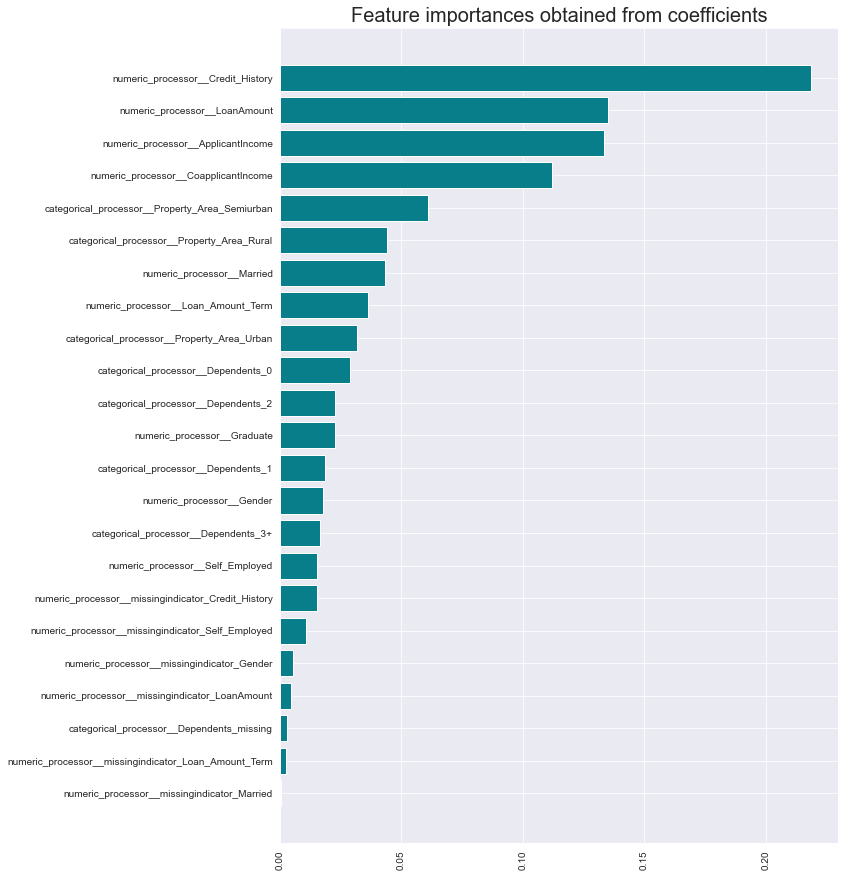

In [180]:
plt.figure(figsize = (10,15))
plt.barh(y=importances['Feature'], width=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [181]:
X_train_FE.nunique().sort_values(ascending=False)

numeric_processor__ApplicantIncome                      357
numeric_processor__CoapplicantIncome                    197
numeric_processor__LoanAmount                           164
numeric_processor__Loan_Amount_Term                       8
numeric_processor__Gender                                 2
numeric_processor__missingindicator_Credit_History        2
categorical_processor__Property_Area_Semiurban            2
categorical_processor__Property_Area_Rural                2
categorical_processor__Dependents_missing                 2
categorical_processor__Dependents_3+                      2
categorical_processor__Dependents_2                       2
categorical_processor__Dependents_1                       2
categorical_processor__Dependents_0                       2
numeric_processor__missingindicator_Self_Employed         2
numeric_processor__missingindicator_Loan_Amount_Term      2
numeric_processor__missingindicator_LoanAmount            2
numeric_processor__Married              

## Feature Selection

### Techniques for feature selection
1. Mutual Information - to get the feature importance 
2. Multicollinearity - to check and remove any highly correlated independent features
3. VarianceThreshold - To check and remove any low varinace continuous features

## Multicollinearity

### Correlation

In [182]:
train_df

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
0       1.0      0.0          0         1            0.0             5849   
1       1.0      1.0          1         1            0.0             4583   
2       1.0      1.0          0         1            1.0             3000   
3       1.0      1.0          0         0            0.0             2583   
4       1.0      0.0          0         1            0.0             6000   
..      ...      ...        ...       ...            ...              ...   
409     1.0      1.0          0         0            0.0             2400   
410     1.0      1.0          1         1            0.0             3400   
411     1.0      1.0          0         1            0.0             3232   
412     0.0      0.0          0         1            0.0             2900   
413     0.0      0.0          0         1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0         NaN             360.0             1.0   
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
..                 ...         ...               ...             ...   
409             3800.0         NaN             180.0             1.0   
410             2500.0       173.0             360.0             1.0   
411             1950.0       108.0             360.0             1.0   
412                0.0        71.0             360.0             1.0   
413                0.0       133.0             360.0             0.0   

    Property_Area  target  
0           Urban       1  
1           Rural       0  
2           Urban       1  
3           Urban       1  
4           Urban       1  
..            ...     ...  
409         Urban       0  
410     Semiurban       1  
411         Rural       1  
412         Rural       1  
413     Semiurban       0  

[414 rows x 12 columns]

In [183]:
train_df.corr()

Gender   Married  Graduate  Self_Employed  \
Gender             1.000000  0.388284 -0.042338       0.035412   
Married            0.388284  1.000000 -0.006071       0.008360   
Graduate          -0.042338 -0.006071  1.000000       0.029122   
Self_Employed      0.035412  0.008360  0.029122       1.000000   
ApplicantIncome    0.050962  0.028363  0.126507       0.110364   
CoapplicantIncome  0.066650  0.084795  0.073808      -0.015964   
LoanAmount         0.105801  0.108773  0.194339       0.101076   
Loan_Amount_Term  -0.085157 -0.127036  0.113322      -0.061890   
Credit_History     0.051907 -0.029390  0.085227      -0.023566   
target             0.006856  0.028990  0.094633       0.051580   

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
Gender                    0.050962           0.066650    0.105801   
Married                   0.028363           0.084795    0.108773   
Graduate                  0.126507           0.073808    0.194339   
Self_Employed             0.110364          -0.015964    0.101076   
ApplicantIncome           1.000000          -0.104669    0.546912   
CoapplicantIncome        -0.104669           1.000000    0.186070   
LoanAmount                0.546912           0.186070    1.000000   
Loan_Amount_Term         -0.024840          -0.073033    0.068939   
Credit_History           -0.016963           0.016778    0.011474   
target                   -0.022896          -0.071213   -0.040727   

                   Loan_Amount_Term  Credit_History    target  
Gender                    -0.085157        0.051907  0.006856  
Married                   -0.127036       -0.029390  0.028990  
Graduate                   0.113322        0.085227  0.094633  
Self_Employed             -0.061890       -0.023566  0.051580  
ApplicantIncome           -0.024840       -0.016963 -0.022896  
CoapplicantIncome         -0.073033        0.016778 -0.071213  
LoanAmount                 0.068939        0.011474 -0.040727  
Loan_Amount_Term           1.000000        0.021975  0.044535  
Credit_History             0.021975        1.000000  0.592595  
target                     0.044535        0.592595  1.000000

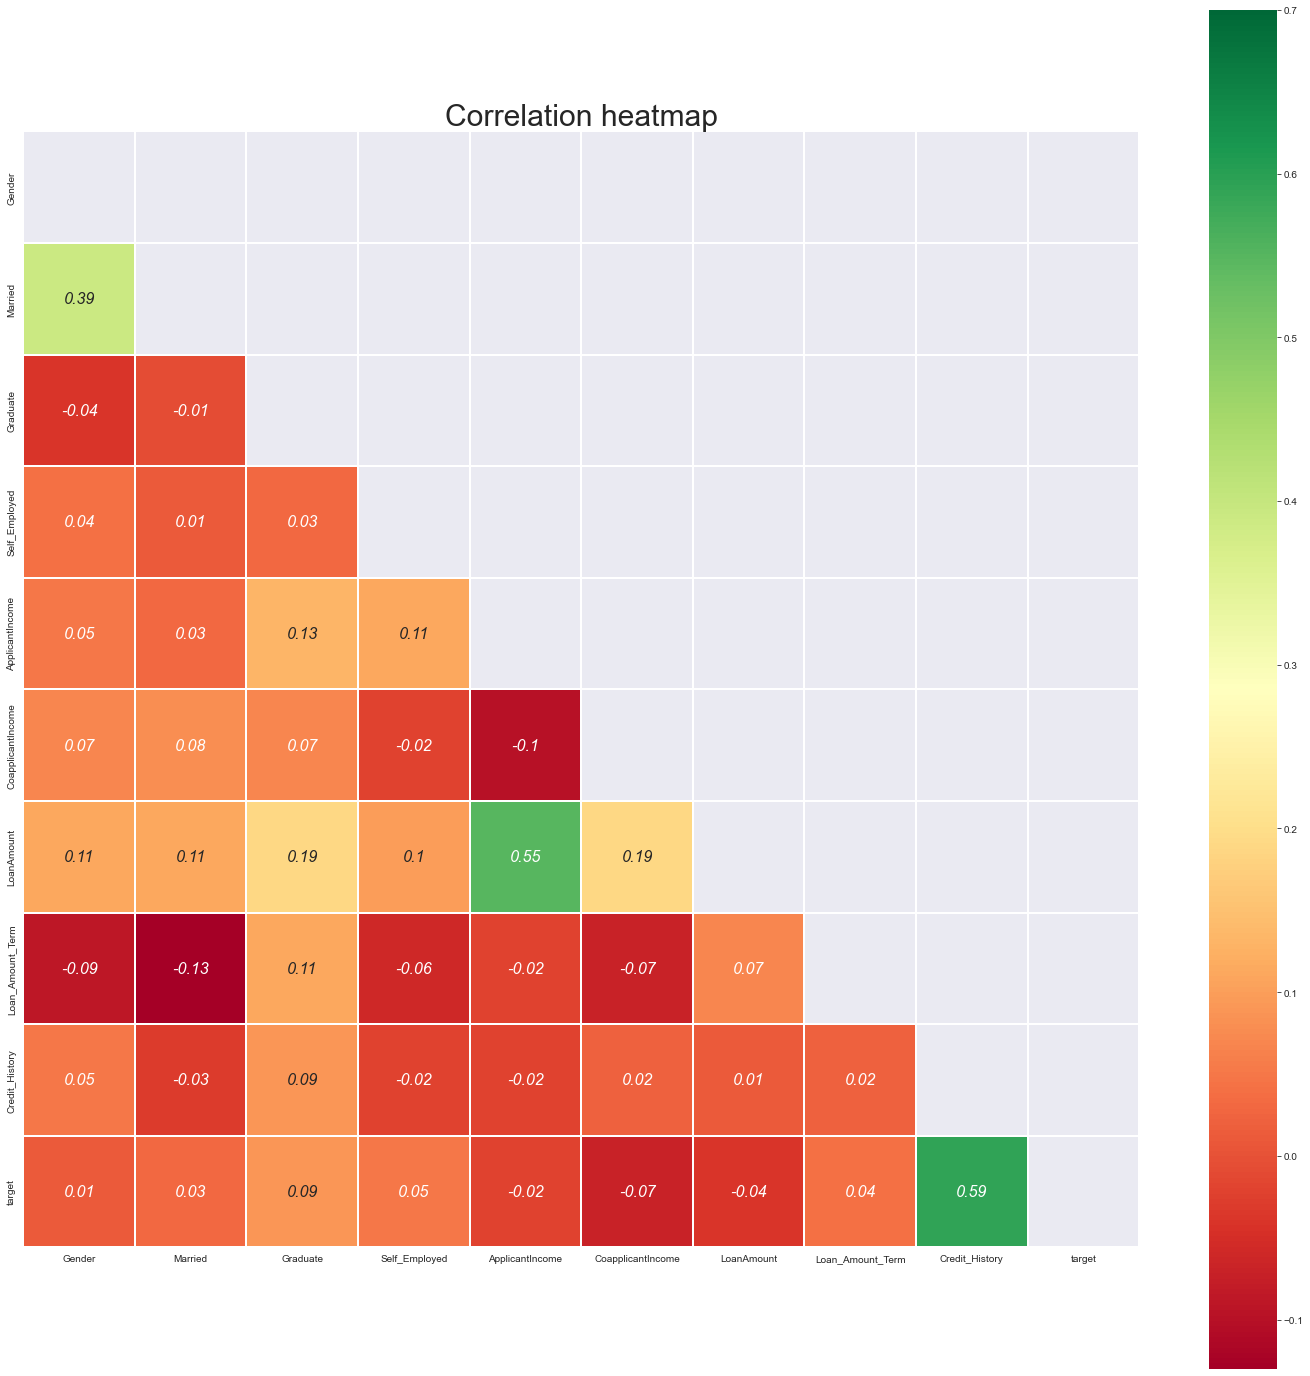

In [184]:
# Finds correlation between Independent and dependent attributes

mask = np.zeros_like(train_df.corr(),dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (25,25))
plt.title('Correlation heatmap', fontsize = 30)

sns.heatmap(np.round_(train_df.corr(),decimals=2),cmap='RdYlGn',linewidths=0.25,square=True,annot=True,
            vmax=0.7,linecolor='w',annot_kws={'size':16,'style':'oblique'},mask=mask)

plt.show()

In [185]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [186]:
corr_features = correlation(X_train_balanced, 0.8)
print(len(set(corr_features)))
print(corr_features)

0
set()


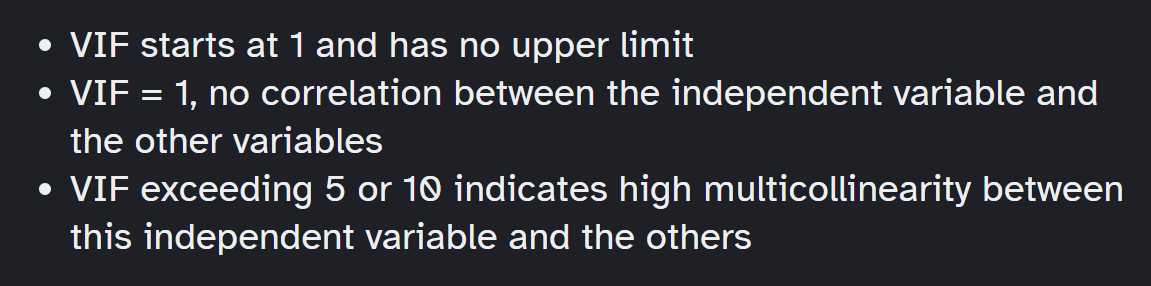

### Variance Inflation Factor (VIF)

https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

In [187]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_balanced.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_balanced.values, i) for i in range(len(X_train_balanced.columns))]

vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

feature       VIF
15                categorical_processor__Dependents_0       inf
19          categorical_processor__Dependents_missing       inf
18               categorical_processor__Dependents_3+       inf
17                categorical_processor__Dependents_2       inf
16                categorical_processor__Dependents_1       inf
21     categorical_processor__Property_Area_Semiurban  2.320881
22         categorical_processor__Property_Area_Urban  2.147579
4                  numeric_processor__ApplicantIncome  2.035690
20         categorical_processor__Property_Area_Rural  2.018527
6                       numeric_processor__LoanAmount  1.889811
5                numeric_processor__CoapplicantIncome  1.667933
1                          numeric_processor__Married  1.527200
0                           numeric_processor__Gender  1.315993
10        numeric_processor__missingindicator_Married  1.290150
8                   numeric_processor__Credit_History  1.139992
2                         numeric_processor__Graduate  1.139621
12     numeric_processor__missingindicator_LoanAmount  1.124100
14  numeric_processor__missingindicator_Credit_His...  1.078642
7                 numeric_processor__Loan_Amount_Term  1.076492
3                    numeric_processor__Self_Employed  1.071251
13  numeric_processor__missingindicator_Loan_Amoun...  1.070620
11  numeric_processor__missingindicator_Self_Employed  1.049772
9          numeric_processor__missingindicator_Gender  1.043378

In [188]:
VIF_features = ['categorical_processor__Dependents_0']

In [189]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_balanced.drop(VIF_features, axis = 1).columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_balanced.drop(VIF_features, axis = 1).values, i) for i in range(len(X_train_balanced.drop(VIF_features, axis = 1).columns))]

vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

feature       VIF
20     categorical_processor__Property_Area_Semiurban  2.320881
21         categorical_processor__Property_Area_Urban  2.147579
4                  numeric_processor__ApplicantIncome  2.035690
19         categorical_processor__Property_Area_Rural  2.018527
6                       numeric_processor__LoanAmount  1.889811
5                numeric_processor__CoapplicantIncome  1.667933
1                          numeric_processor__Married  1.527200
0                           numeric_processor__Gender  1.315993
18          categorical_processor__Dependents_missing  1.312816
16                categorical_processor__Dependents_2  1.291077
10        numeric_processor__missingindicator_Married  1.290150
15                categorical_processor__Dependents_1  1.217135
17               categorical_processor__Dependents_3+  1.165837
8                   numeric_processor__Credit_History  1.139992
2                         numeric_processor__Graduate  1.139621
12     numeric_processor__missingindicator_LoanAmount  1.124100
14  numeric_processor__missingindicator_Credit_His...  1.078642
7                 numeric_processor__Loan_Amount_Term  1.076492
3                    numeric_processor__Self_Employed  1.071251
13  numeric_processor__missingindicator_Loan_Amoun...  1.070620
11  numeric_processor__missingindicator_Self_Employed  1.049772
9          numeric_processor__missingindicator_Gender  1.043378

In [190]:
vif_data.shape

(22, 2)

In [191]:
X_train_balanced

numeric_processor__Gender  numeric_processor__Married  \
0                          0.0                   -1.000000   
1                          0.0                    0.000000   
2                          0.0                    0.000000   
3                          0.0                    0.000000   
4                          0.0                   -1.000000   
..                         ...                         ...   
575                        0.0                    0.000000   
576                        0.0                   -0.432931   
577                        0.0                   -0.583113   
578                        0.0                    0.000000   
579                        0.0                   -0.623968   

     numeric_processor__Graduate  numeric_processor__Self_Employed  \
0                       0.000000                          0.000000   
1                       0.000000                          0.000000   
2                       0.000000                         10.398675   
3                     -10.398675                          0.000000   
4                       0.000000                          0.000000   
..                           ...                               ...   
575                     0.000000                         10.398675   
576                   -10.398675                          0.000000   
577                   -10.398675                          0.000000   
578                   -10.398675                          0.000000   
579                   -10.398675                          0.000000   

     numeric_processor__ApplicantIncome  numeric_processor__CoapplicantIncome  \
0                              0.535893                             -0.885457   
1                              0.264190                              0.028558   
2                             -0.438152                             -0.885457   
3                             -0.680887                              0.124460   
4                              0.574609                             -0.885457   
..                                  ...                                   ...   
575                           -0.554667                             -0.878042   
576                            0.309760                             -0.496965   
577                            0.628841                             -0.501345   
578                           -0.086876                             -0.509881   
579                           -0.381891                             -0.885457   

     numeric_processor__LoanAmount  numeric_processor__Loan_Amount_Term  \
0                         0.000000                             0.000000   
1                         0.078000                             0.000000   
2                        -1.071011                             0.000000   
3                        -0.117447                             0.000000   
4                         0.288044                             0.000000   
..                             ...                                  ...   
575                      -0.399052                            -0.011376   
576                       0.052887                             0.000000   
577                       0.415119                             2.118083   
578                       0.000000                            -1.121006   
579                      -0.983928                            -1.498304   

     numeric_processor__Credit_History  \
0                             0.000000   
1                             0.000000   
2                             0.000000   
3                             0.000000   
4                             0.000000   
..                                 ...   
575                         -10.398675   
576                           0.000000   
577                           0.000000   
578                          -3.627345   
579                           0.000000   

     numeric_processor__missingindicator

In [192]:
X_train_multi = X_train_balanced.drop(VIF_features, axis = 1)

In [193]:
X_val_multi = X_val_FE.drop(VIF_features, axis = 1)

In [194]:
X_test_multi = X_test_FE.drop(VIF_features, axis = 1)

In [195]:
X_train_multi

numeric_processor__Gender  numeric_processor__Married  \
0                          0.0                   -1.000000   
1                          0.0                    0.000000   
2                          0.0                    0.000000   
3                          0.0                    0.000000   
4                          0.0                   -1.000000   
..                         ...                         ...   
575                        0.0                    0.000000   
576                        0.0                   -0.432931   
577                        0.0                   -0.583113   
578                        0.0                    0.000000   
579                        0.0                   -0.623968   

     numeric_processor__Graduate  numeric_processor__Self_Employed  \
0                       0.000000                          0.000000   
1                       0.000000                          0.000000   
2                       0.000000                         10.398675   
3                     -10.398675                          0.000000   
4                       0.000000                          0.000000   
..                           ...                               ...   
575                     0.000000                         10.398675   
576                   -10.398675                          0.000000   
577                   -10.398675                          0.000000   
578                   -10.398675                          0.000000   
579                   -10.398675                          0.000000   

     numeric_processor__ApplicantIncome  numeric_processor__CoapplicantIncome  \
0                              0.535893                             -0.885457   
1                              0.264190                              0.028558   
2                             -0.438152                             -0.885457   
3                             -0.680887                              0.124460   
4                              0.574609                             -0.885457   
..                                  ...                                   ...   
575                           -0.554667                             -0.878042   
576                            0.309760                             -0.496965   
577                            0.628841                             -0.501345   
578                           -0.086876                             -0.509881   
579                           -0.381891                             -0.885457   

     numeric_processor__LoanAmount  numeric_processor__Loan_Amount_Term  \
0                         0.000000                             0.000000   
1                         0.078000                             0.000000   
2                        -1.071011                             0.000000   
3                        -0.117447                             0.000000   
4                         0.288044                             0.000000   
..                             ...                                  ...   
575                      -0.399052                            -0.011376   
576                       0.052887                             0.000000   
577                       0.415119                             2.118083   
578                       0.000000                            -1.121006   
579                      -0.983928                            -1.498304   

     numeric_processor__Credit_History  \
0                             0.000000   
1                             0.000000   
2                             0.000000   
3                             0.000000   
4                             0.000000   
..                                 ...   
575                         -10.398675   
576                           0.000000   
577                           0.000000   
578                          -3.627345   
579                           0.000000   

     numeric_processor__missingindicator

In [196]:
X_val_multi

numeric_processor__Gender  numeric_processor__Married  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   
..                        ...                         ...   
95                        0.0                         0.0   
96                        0.0                         0.0   
97                        0.0                         0.0   
98                        0.0                         0.0   
99                        0.0                         0.0   

    numeric_processor__Graduate  numeric_processor__Self_Employed  \
0                    -10.398675                          0.000000   
1                    -10.398675                          0.000000   
2                      0.000000                          0.000000   
3                      0.000000                          0.000000   
4                      0.000000                         10.398675   
..                          ...                               ...   
95                     0.000000                          0.000000   
96                     0.000000                          0.000000   
97                     0.000000                          0.000000   
98                     0.000000                          0.000000   
99                   -10.398675                          0.000000   

    numeric_processor__ApplicantIncome  numeric_processor__CoapplicantIncome  \
0                             0.095674                              0.019682   
1                            -0.080267                              0.246161   
2                            -0.172513                              0.142741   
3                             0.087250                              0.123275   
4                             0.906080                              0.300333   
..                                 ...                                   ...   
95                            0.554986                              0.313812   
96                           -0.540913                              0.078683   
97                           -0.546521                              0.080990   
98                            0.147512                              0.023941   
99                           -0.188993                              0.166662   

    numeric_processor__LoanAmount  numeric_processor__Loan_Amount_Term  \
0                        0.423103                                  0.0   
1                        0.386305                                  0.0   
2                       -0.052769                                  0.0   
3                        0.187233                                  0.0   
4                        1.519116                                  0.0   
..                            ...                                  ...   
95                       1.350435                                  0.0   
96                       0.324357                                  0.0   
97                       0.409852                                  0.0   
98                       0.431115                                  0.0   
99                       0.310245                                  0.0   

    numeric_processor__Credit_History  \
0                            0.000000   
1                          -10.398675   
2                          -10.398675   
3                            0.000000   
4                          -10.398675   
..                                ...   
95                           0.000000   
96                         -10.398675   
97                           0.000000   
98                           0.000000   
99                           0.000000   

    numeric_processor__missingindicator_Gender  \
0                                          0.0   

In [197]:
X_test_multi

numeric_processor__Gender  numeric_processor__Married  \
0                    0.000000                         0.0   
1                  -10.398675                        -1.0   
2                    0.000000                         0.0   
3                  -10.398675                         0.0   
4                    0.000000                         0.0   
..                        ...                         ...   
95                   0.000000                        -1.0   
96                   0.000000                         0.0   
97                   0.000000                        -1.0   
98                   0.000000                         0.0   
99                   0.000000                         0.0   

    numeric_processor__Graduate  numeric_processor__Self_Employed  \
0                    -10.398675                          0.000000   
1                      0.000000                          0.000000   
2                    -10.398675                          0.000000   
3                      0.000000                         10.398675   
4                      0.000000                          0.000000   
..                          ...                               ...   
95                     0.000000                          0.000000   
96                   -10.398675                          0.000000   
97                     0.000000                          0.000000   
98                     0.000000                          0.000000   
99                     0.000000                         10.398675   

    numeric_processor__ApplicantIncome  numeric_processor__CoapplicantIncome  \
0                             0.039762                              0.027076   
1                             0.170527                             -0.885457   
2                            -1.016648                              0.129610   
3                             1.519454                             -0.885457   
4                             1.354247                             -0.885457   
..                                 ...                                   ...   
95                            0.015748                             -0.885457   
96                           -1.551934                              0.238607   
97                            0.351697                             -0.885457   
98                            1.817767                             -0.885457   
99                            0.820032                             -0.885457   

    numeric_processor__LoanAmount  numeric_processor__Loan_Amount_Term  \
0                       -0.041281                            -1.363784   
1                       -0.264813                             0.000000   
2                       -0.202067                             0.000000   
3                        2.067259                             0.000000   
4                       -0.566863                             0.000000   
..                            ...                                  ...   
95                      -0.235644                             5.080708   
96                       0.865633                             0.000000   
97                       0.112597                             0.000000   
98                       2.067259                            -1.721520   
99                       1.008550                             0.000000   

    numeric_processor__Credit_History  \
0                            0.000000   
1                            0.000000   
2                            0.000000   
3                            0.000000   
4                            0.000000   
..                                ...   
95                           0.000000   
96                         -10.398675   
97                         -10.398675   
98                         -10.398675   
99                           0.000000   

    numeric_processor__missingindicator_Gender  \
0                                          0.0   

In [198]:
model = RandomForestClassifier()
model.fit(X_train_multi,y_train_balanced)

RandomForestClassifier()

In [199]:
model.feature_names_in_

array(['numeric_processor__Gender', 'numeric_processor__Married',
       'numeric_processor__Graduate', 'numeric_processor__Self_Employed',
       'numeric_processor__ApplicantIncome',
       'numeric_processor__CoapplicantIncome',
       'numeric_processor__LoanAmount',
       'numeric_processor__Loan_Amount_Term',
       'numeric_processor__Credit_History',
       'numeric_processor__missingindicator_Gender',
       'numeric_processor__missingindicator_Married',
       'numeric_processor__missingindicator_Self_Employed',
       'numeric_processor__missingindicator_LoanAmount',
       'numeric_processor__missingindicator_Loan_Amount_Term',
       'numeric_processor__missingindicator_Credit_History',
       'categorical_processor__Dependents_1',
       'categorical_processor__Dependents_2',
       'categorical_processor__Dependents_3+',
       'categorical_processor__Dependents_missing',
       'categorical_processor__Property_Area_Rural',
       'categorical_processor__Property_Area_S

In [200]:
y_train_pred = model.predict(X_train_multi)
    
print(classification_report(y_train_balanced,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       290

    accuracy                           1.00       580
   macro avg       1.00      1.00      1.00       580
weighted avg       1.00      1.00      1.00       580



In [201]:
y_val_pred = model.predict(X_val_multi)
    
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.78      0.49      0.60        37
           1       0.75      0.92      0.83        63

    accuracy                           0.76       100
   macro avg       0.77      0.70      0.71       100
weighted avg       0.76      0.76      0.74       100



#### See even if we remove 1 features ('categorical_processor__Dependents_0') we are able to get the same results and there is no impact on the performance of the Model

### VarianceThreshold

In [202]:
X_train_balanced

numeric_processor__Gender  numeric_processor__Married  \
0                          0.0                   -1.000000   
1                          0.0                    0.000000   
2                          0.0                    0.000000   
3                          0.0                    0.000000   
4                          0.0                   -1.000000   
..                         ...                         ...   
575                        0.0                    0.000000   
576                        0.0                   -0.432931   
577                        0.0                   -0.583113   
578                        0.0                    0.000000   
579                        0.0                   -0.623968   

     numeric_processor__Graduate  numeric_processor__Self_Employed  \
0                       0.000000                          0.000000   
1                       0.000000                          0.000000   
2                       0.000000                         10.398675   
3                     -10.398675                          0.000000   
4                       0.000000                          0.000000   
..                           ...                               ...   
575                     0.000000                         10.398675   
576                   -10.398675                          0.000000   
577                   -10.398675                          0.000000   
578                   -10.398675                          0.000000   
579                   -10.398675                          0.000000   

     numeric_processor__ApplicantIncome  numeric_processor__CoapplicantIncome  \
0                              0.535893                             -0.885457   
1                              0.264190                              0.028558   
2                             -0.438152                             -0.885457   
3                             -0.680887                              0.124460   
4                              0.574609                             -0.885457   
..                                  ...                                   ...   
575                           -0.554667                             -0.878042   
576                            0.309760                             -0.496965   
577                            0.628841                             -0.501345   
578                           -0.086876                             -0.509881   
579                           -0.381891                             -0.885457   

     numeric_processor__LoanAmount  numeric_processor__Loan_Amount_Term  \
0                         0.000000                             0.000000   
1                         0.078000                             0.000000   
2                        -1.071011                             0.000000   
3                        -0.117447                             0.000000   
4                         0.288044                             0.000000   
..                             ...                                  ...   
575                      -0.399052                            -0.011376   
576                       0.052887                             0.000000   
577                       0.415119                             2.118083   
578                       0.000000                            -1.121006   
579                      -0.983928                            -1.498304   

     numeric_processor__Credit_History  \
0                             0.000000   
1                             0.000000   
2                             0.000000   
3                             0.000000   
4                             0.000000   
..                                 ...   
575                         -10.398675   
576                           0.000000   
577                           0.000000   
578                          -3.627345   
579                           0.000000   

     numeric_processor__missingindicator

In [203]:
# In this technique we will find the varince of all the features and we can remove the features which have low variance 
# by setting the threshold parameter

var_thres=VarianceThreshold()
var_thres.fit(X_train_balanced)

VarianceThreshold()

In [204]:
variances = pd.DataFrame(data={
    'Feature': X_train_balanced.columns,
    'variance': var_thres.variances_
})
variances = variances.sort_values(by='variance', ascending=True)

In [205]:
variances

Feature   variance
19          categorical_processor__Dependents_missing   0.017387
18               categorical_processor__Dependents_3+   0.067215
17                categorical_processor__Dependents_2   0.124818
16                categorical_processor__Dependents_1   0.126452
20         categorical_processor__Property_Area_Rural   0.197853
22         categorical_processor__Property_Area_Urban   0.202194
21     categorical_processor__Property_Area_Semiurban   0.217481
1                          numeric_processor__Married   0.220885
15                categorical_processor__Dependents_0   0.228543
5                numeric_processor__CoapplicantIncome   0.244906
10        numeric_processor__missingindicator_Married   0.371585
4                  numeric_processor__ApplicantIncome   0.575442
6                       numeric_processor__LoanAmount   0.576901
7                 numeric_processor__Loan_Amount_Term   0.992027
9          numeric_processor__missingindicator_Gender   2.191164
12     numeric_processor__missingindicator_LoanAmount   2.454205
13  numeric_processor__missingindicator_Loan_Amoun...   3.064236
11  numeric_processor__missingindicator_Self_Employed   5.297188
14  numeric_processor__missingindicator_Credit_His...   6.755456
8                   numeric_processor__Credit_History  10.398675
3                    numeric_processor__Self_Employed  10.398675
2                         numeric_processor__Graduate  10.398675
0                           numeric_processor__Gender  10.398675

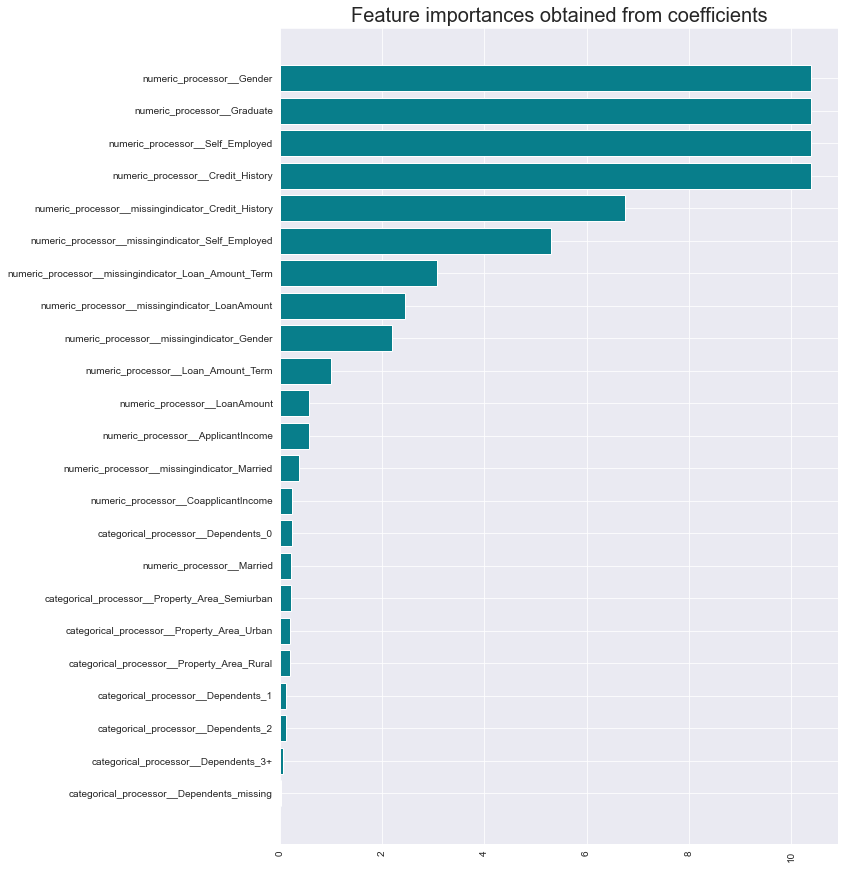

In [206]:
plt.figure(figsize = (10,15))
plt.barh(y=variances['Feature'], width=variances['variance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [207]:
variances['Feature'].values[-9:].tolist()

['numeric_processor__missingindicator_Gender',
 'numeric_processor__missingindicator_LoanAmount',
 'numeric_processor__missingindicator_Loan_Amount_Term',
 'numeric_processor__missingindicator_Self_Employed',
 'numeric_processor__missingindicator_Credit_History',
 'numeric_processor__Credit_History',
 'numeric_processor__Self_Employed',
 'numeric_processor__Graduate',
 'numeric_processor__Gender']

In [208]:
X_train_balanced[variances['Feature'].values[-9:].tolist()]

numeric_processor__missingindicator_Gender  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
..                                          ...   
575                                         0.0   
576                                         0.0   
577                                         0.0   
578                                         0.0   
579                                         0.0   

     numeric_processor__missingindicator_LoanAmount  \
0                                         10.398675   
1                                          0.000000   
2                                          0.000000   
3                                          0.000000   
4                                          0.000000   
..                                              ...   
575                                        0.000000   
576                                        0.000000   
577                                        0.000000   
578                                       10.398675   
579                                        0.000000   

     numeric_processor__missingindicator_Loan_Amount_Term  \
0                                                  0.0      
1                                                  0.0      
2                                                  0.0      
3                                                  0.0      
4                                                  0.0      
..                                                 ...      
575                                                0.0      
576                                                0.0      
577                                                0.0      
578                                                0.0      
579                                                0.0      

     numeric_processor__missingindicator_Self_Employed  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                                  0.0   
..                                                 ...   
575                                                0.0   
576                                                0.0   
577                                                0.0   
578                                                0.0   
579                                                0.0   

     numeric_processor__missingindicator_Credit_History  \
0                                                  0.0    
1                                                  0.0    
2                                                  0.0    
3                                                  0.0    
4                                                  0.0    
..                                                 ...    
575                                                0.0    
576                                                0.0    
577                                                0.0    
578                                                0.0    
579                                                0.0    

     numeric_processor__Credit_History  numeric_processor__Self_Employed  \
0                             0.000000                          0.000000   
1                             0.000000                          0.000000   
2                             0.000000                         10.398675   
3                             0.000000                          0.000000   
4                             0.000000                          0.000000   
..                                 ...                               ...   
575                         -10.398675                      

In [209]:
y_train_balanced

0      1
1      0
2      1
3      1
4      1
      ..
575    0
576    0
577    0
578    0
579    0
Name: target, Length: 580, dtype: int64

In [210]:
model = RandomForestClassifier()
model.fit(X_train_balanced[variances['Feature'].values[-9:].tolist()],y_train_balanced)

RandomForestClassifier()

In [211]:
model.feature_names_in_

array(['numeric_processor__missingindicator_Gender',
       'numeric_processor__missingindicator_LoanAmount',
       'numeric_processor__missingindicator_Loan_Amount_Term',
       'numeric_processor__missingindicator_Self_Employed',
       'numeric_processor__missingindicator_Credit_History',
       'numeric_processor__Credit_History',
       'numeric_processor__Self_Employed', 'numeric_processor__Graduate',
       'numeric_processor__Gender'], dtype=object)

In [212]:
y_train_pred = model.predict(X_train_balanced[variances['Feature'].values[-9:].tolist()])
    
print(classification_report(y_train_balanced,y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.66      0.74       290
           1       0.72      0.87      0.79       290

    accuracy                           0.76       580
   macro avg       0.78      0.76      0.76       580
weighted avg       0.78      0.76      0.76       580



In [213]:
y_val_pred = model.predict(X_val_FE[variances['Feature'].values[-9:].tolist()])
    
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.59      0.43      0.50        37
           1       0.71      0.83      0.76        63

    accuracy                           0.68       100
   macro avg       0.65      0.63      0.63       100
weighted avg       0.67      0.68      0.67       100



#### See with just 9 features having high variance we are able to get the 68% validation accurcy. using the technique VarianceThreshold

### Mutual Information for Classification

In [214]:
mutual_info = mutual_info_classif(X_train_balanced, y_train_balanced)
mutual_info

array([0.01948935, 0.07232353, 0.        , 0.06178364, 0.        ,
       0.09205698, 0.05575972, 0.01836749, 0.16584787, 0.00564838,
       0.01634527, 0.        , 0.03182615, 0.02174243, 0.        ,
       0.06013144, 0.        , 0.00839583, 0.04918054, 0.01886259,
       0.06733092, 0.0568472 , 0.04139248])

In [215]:
mutual_info_df = pd.DataFrame(data={
    'Feature': X_train_balanced.columns,
    'MI': mutual_info
})
mutual_info_df = mutual_info_df.sort_values(by='MI', ascending=True)

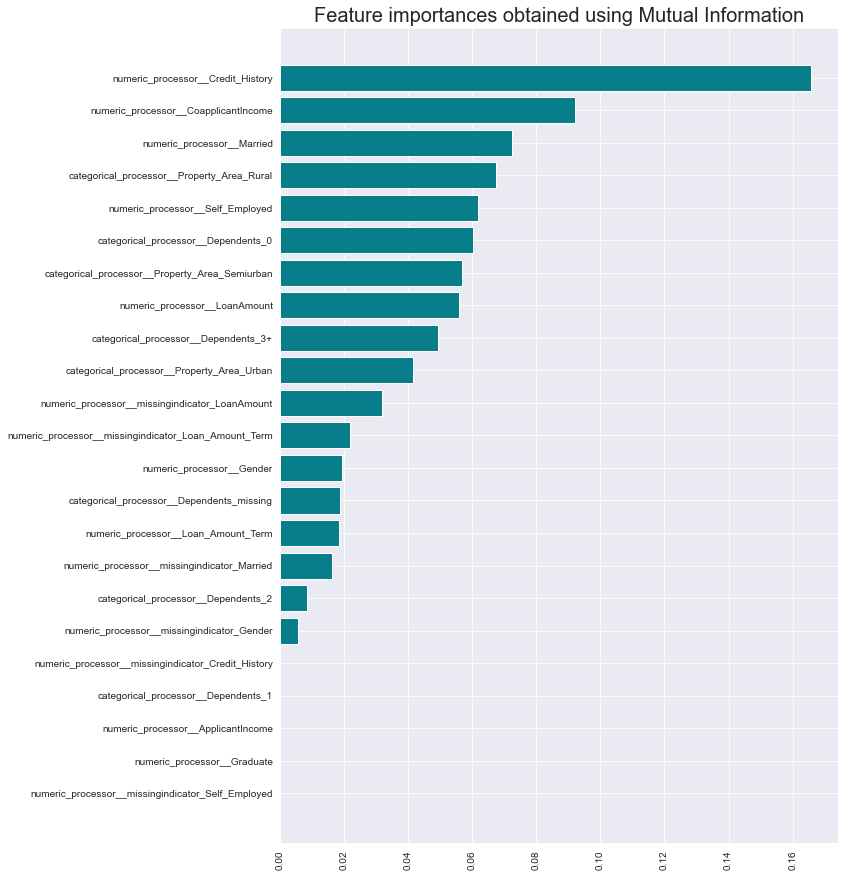

In [216]:
plt.figure(figsize = (10,15))
plt.barh(y=mutual_info_df['Feature'], width=mutual_info_df['MI'], color='#087E8B')
plt.title('Feature importances obtained using Mutual Information', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [217]:
mutual_info_df

Feature        MI
11  numeric_processor__missingindicator_Self_Employed  0.000000
2                         numeric_processor__Graduate  0.000000
4                  numeric_processor__ApplicantIncome  0.000000
16                categorical_processor__Dependents_1  0.000000
14  numeric_processor__missingindicator_Credit_His...  0.000000
9          numeric_processor__missingindicator_Gender  0.005648
17                categorical_processor__Dependents_2  0.008396
10        numeric_processor__missingindicator_Married  0.016345
7                 numeric_processor__Loan_Amount_Term  0.018367
19          categorical_processor__Dependents_missing  0.018863
0                           numeric_processor__Gender  0.019489
13  numeric_processor__missingindicator_Loan_Amoun...  0.021742
12     numeric_processor__missingindicator_LoanAmount  0.031826
22         categorical_processor__Property_Area_Urban  0.041392
18               categorical_processor__Dependents_3+  0.049181
6                       numeric_processor__LoanAmount  0.055760
21     categorical_processor__Property_Area_Semiurban  0.056847
15                categorical_processor__Dependents_0  0.060131
3                    numeric_processor__Self_Employed  0.061784
20         categorical_processor__Property_Area_Rural  0.067331
1                          numeric_processor__Married  0.072324
5                numeric_processor__CoapplicantIncome  0.092057
8                   numeric_processor__Credit_History  0.165848

In [218]:
mutual_info_df['Feature'].values[-17:].tolist()

['categorical_processor__Dependents_2',
 'numeric_processor__missingindicator_Married',
 'numeric_processor__Loan_Amount_Term',
 'categorical_processor__Dependents_missing',
 'numeric_processor__Gender',
 'numeric_processor__missingindicator_Loan_Amount_Term',
 'numeric_processor__missingindicator_LoanAmount',
 'categorical_processor__Property_Area_Urban',
 'categorical_processor__Dependents_3+',
 'numeric_processor__LoanAmount',
 'categorical_processor__Property_Area_Semiurban',
 'categorical_processor__Dependents_0',
 'numeric_processor__Self_Employed',
 'categorical_processor__Property_Area_Rural',
 'numeric_processor__Married',
 'numeric_processor__CoapplicantIncome',
 'numeric_processor__Credit_History']

In [219]:
model = RandomForestClassifier()
model.fit(X_train_balanced[mutual_info_df['Feature'].values[-17:].tolist()],y_train_balanced)

RandomForestClassifier()

In [220]:
model.feature_names_in_

array(['categorical_processor__Dependents_2',
       'numeric_processor__missingindicator_Married',
       'numeric_processor__Loan_Amount_Term',
       'categorical_processor__Dependents_missing',
       'numeric_processor__Gender',
       'numeric_processor__missingindicator_Loan_Amount_Term',
       'numeric_processor__missingindicator_LoanAmount',
       'categorical_processor__Property_Area_Urban',
       'categorical_processor__Dependents_3+',
       'numeric_processor__LoanAmount',
       'categorical_processor__Property_Area_Semiurban',
       'categorical_processor__Dependents_0',
       'numeric_processor__Self_Employed',
       'categorical_processor__Property_Area_Rural',
       'numeric_processor__Married',
       'numeric_processor__CoapplicantIncome',
       'numeric_processor__Credit_History'], dtype=object)

In [221]:
y_train_pred = model.predict(X_train_balanced[mutual_info_df['Feature'].values[-17:].tolist()])
    
print(classification_report(y_train_balanced,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       290
           1       0.99      1.00      1.00       290

    accuracy                           1.00       580
   macro avg       1.00      1.00      1.00       580
weighted avg       1.00      1.00      1.00       580



In [222]:
y_val_pred = model.predict(X_val_FE[mutual_info_df['Feature'].values[-17:].tolist()])
    
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.75      0.49      0.59        37
           1       0.75      0.90      0.82        63

    accuracy                           0.75       100
   macro avg       0.75      0.70      0.71       100
weighted avg       0.75      0.75      0.74       100



#### See with just 17 features having highMi gain we are able to get the ~73 validation accurcy. using the technique VarianceThreshold

## PCA

In [223]:
# we are not going to do PCA because we are having few features only.

## Building the final Model

In [224]:
X_train_balanced

numeric_processor__Gender  numeric_processor__Married  \
0                          0.0                   -1.000000   
1                          0.0                    0.000000   
2                          0.0                    0.000000   
3                          0.0                    0.000000   
4                          0.0                   -1.000000   
..                         ...                         ...   
575                        0.0                    0.000000   
576                        0.0                   -0.432931   
577                        0.0                   -0.583113   
578                        0.0                    0.000000   
579                        0.0                   -0.623968   

     numeric_processor__Graduate  numeric_processor__Self_Employed  \
0                       0.000000                          0.000000   
1                       0.000000                          0.000000   
2                       0.000000                         10.398675   
3                     -10.398675                          0.000000   
4                       0.000000                          0.000000   
..                           ...                               ...   
575                     0.000000                         10.398675   
576                   -10.398675                          0.000000   
577                   -10.398675                          0.000000   
578                   -10.398675                          0.000000   
579                   -10.398675                          0.000000   

     numeric_processor__ApplicantIncome  numeric_processor__CoapplicantIncome  \
0                              0.535893                             -0.885457   
1                              0.264190                              0.028558   
2                             -0.438152                             -0.885457   
3                             -0.680887                              0.124460   
4                              0.574609                             -0.885457   
..                                  ...                                   ...   
575                           -0.554667                             -0.878042   
576                            0.309760                             -0.496965   
577                            0.628841                             -0.501345   
578                           -0.086876                             -0.509881   
579                           -0.381891                             -0.885457   

     numeric_processor__LoanAmount  numeric_processor__Loan_Amount_Term  \
0                         0.000000                             0.000000   
1                         0.078000                             0.000000   
2                        -1.071011                             0.000000   
3                        -0.117447                             0.000000   
4                         0.288044                             0.000000   
..                             ...                                  ...   
575                      -0.399052                            -0.011376   
576                       0.052887                             0.000000   
577                       0.415119                             2.118083   
578                       0.000000                            -1.121006   
579                      -0.983928                            -1.498304   

     numeric_processor__Credit_History  \
0                             0.000000   
1                             0.000000   
2                             0.000000   
3                             0.000000   
4                             0.000000   
..                                 ...   
575                         -10.398675   
576                           0.000000   
577                           0.000000   
578                          -3.627345   
579                           0.000000   

     numeric_processor__missingindicator

In [225]:
y_train_balanced

0      1
1      0
2      1
3      1
4      1
      ..
575    0
576    0
577    0
578    0
579    0
Name: target, Length: 580, dtype: int64

In [226]:
numerical_features

['Gender',
 'Married',
 'Graduate',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [227]:
categorical_features

['Dependents', 'Property_Area']

In [228]:
final_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_processor',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('quantiletransformer',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  ['Gender', 'Married',
                                                   'Graduate', 'Self_Employed',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categorical_processor',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 max_categories=15,
                                                                                 min_frequency=0.01,
                                                                                 sparse_output=False))]),
                                                  ['Dependents',
                                                   'Property_Area'])])),
                ('scaler', RobustScaler())])

In [229]:
model = RandomForestClassifier()

In [230]:
model.fit(X_train_balanced,y_train_balanced)

RandomForestClassifier()

In [231]:
X_val_FE

numeric_processor__Gender  numeric_processor__Married  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   
..                        ...                         ...   
95                        0.0                         0.0   
96                        0.0                         0.0   
97                        0.0                         0.0   
98                        0.0                         0.0   
99                        0.0                         0.0   

    numeric_processor__Graduate  numeric_processor__Self_Employed  \
0                    -10.398675                          0.000000   
1                    -10.398675                          0.000000   
2                      0.000000                          0.000000   
3                      0.000000                          0.000000   
4                      0.000000                         10.398675   
..                          ...                               ...   
95                     0.000000                          0.000000   
96                     0.000000                          0.000000   
97                     0.000000                          0.000000   
98                     0.000000                          0.000000   
99                   -10.398675                          0.000000   

    numeric_processor__ApplicantIncome  numeric_processor__CoapplicantIncome  \
0                             0.095674                              0.019682   
1                            -0.080267                              0.246161   
2                            -0.172513                              0.142741   
3                             0.087250                              0.123275   
4                             0.906080                              0.300333   
..                                 ...                                   ...   
95                            0.554986                              0.313812   
96                           -0.540913                              0.078683   
97                           -0.546521                              0.080990   
98                            0.147512                              0.023941   
99                           -0.188993                              0.166662   

    numeric_processor__LoanAmount  numeric_processor__Loan_Amount_Term  \
0                        0.423103                                  0.0   
1                        0.386305                                  0.0   
2                       -0.052769                                  0.0   
3                        0.187233                                  0.0   
4                        1.519116                                  0.0   
..                            ...                                  ...   
95                       1.350435                                  0.0   
96                       0.324357                                  0.0   
97                       0.409852                                  0.0   
98                       0.431115                                  0.0   
99                       0.310245                                  0.0   

    numeric_processor__Credit_History  \
0                            0.000000   
1                          -10.398675   
2                          -10.398675   
3                            0.000000   
4                          -10.398675   
..                                ...   
95                           0.000000   
96                         -10.398675   
97                           0.000000   
98                           0.000000   
99                           0.000000   

    numeric_processor__missingindicator_Gender  \
0                                          0.0   

In [232]:
y_val

0     1
1     0
2     0
3     1
4     0
     ..
95    1
96    0
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [233]:
y_train_pred = model.predict(X_train_balanced)
train_score = accuracy_score(y_train_balanced,y_train_pred)
    
precision = precision_score(y_train_balanced,y_train_pred,average='macro')
recall = recall_score(y_train_balanced,y_train_pred,average='macro')
f1 = f1_score(y_train_balanced,y_train_pred,average='macro')
    
print(classification_report(y_train_balanced,y_train_pred))
    
y_val_pred = model.predict(X_val_FE)

print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       290

    accuracy                           1.00       580
   macro avg       1.00      1.00      1.00       580
weighted avg       1.00      1.00      1.00       580

              precision    recall  f1-score   support

           0       0.74      0.54      0.62        37
           1       0.77      0.89      0.82        63

    accuracy                           0.76       100
   macro avg       0.75      0.71      0.72       100
weighted avg       0.76      0.76      0.75       100



In [234]:
X_test_FE

numeric_processor__Gender  numeric_processor__Married  \
0                    0.000000                         0.0   
1                  -10.398675                        -1.0   
2                    0.000000                         0.0   
3                  -10.398675                         0.0   
4                    0.000000                         0.0   
..                        ...                         ...   
95                   0.000000                        -1.0   
96                   0.000000                         0.0   
97                   0.000000                        -1.0   
98                   0.000000                         0.0   
99                   0.000000                         0.0   

    numeric_processor__Graduate  numeric_processor__Self_Employed  \
0                    -10.398675                          0.000000   
1                      0.000000                          0.000000   
2                    -10.398675                          0.000000   
3                      0.000000                         10.398675   
4                      0.000000                          0.000000   
..                          ...                               ...   
95                     0.000000                          0.000000   
96                   -10.398675                          0.000000   
97                     0.000000                          0.000000   
98                     0.000000                          0.000000   
99                     0.000000                         10.398675   

    numeric_processor__ApplicantIncome  numeric_processor__CoapplicantIncome  \
0                             0.039762                              0.027076   
1                             0.170527                             -0.885457   
2                            -1.016648                              0.129610   
3                             1.519454                             -0.885457   
4                             1.354247                             -0.885457   
..                                 ...                                   ...   
95                            0.015748                             -0.885457   
96                           -1.551934                              0.238607   
97                            0.351697                             -0.885457   
98                            1.817767                             -0.885457   
99                            0.820032                             -0.885457   

    numeric_processor__LoanAmount  numeric_processor__Loan_Amount_Term  \
0                       -0.041281                            -1.363784   
1                       -0.264813                             0.000000   
2                       -0.202067                             0.000000   
3                        2.067259                             0.000000   
4                       -0.566863                             0.000000   
..                            ...                                  ...   
95                      -0.235644                             5.080708   
96                       0.865633                             0.000000   
97                       0.112597                             0.000000   
98                       2.067259                            -1.721520   
99                       1.008550                             0.000000   

    numeric_processor__Credit_History  \
0                            0.000000   
1                            0.000000   
2                            0.000000   
3                            0.000000   
4                            0.000000   
..                                ...   
95                           0.000000   
96                         -10.398675   
97                         -10.398675   
98                         -10.398675   
99                           0.000000   

    numeric_processor__missingindicator_Gender  \
0                                          0.0   

In [235]:
y_test

0     1
1     0
2     1
3     1
4     1
     ..
95    0
96    0
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [236]:
y_test_pred = model.predict(X_test_FE)

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.48      0.59        31
           1       0.80      0.93      0.86        69

    accuracy                           0.79       100
   macro avg       0.78      0.71      0.72       100
weighted avg       0.78      0.79      0.78       100



#### We got ~79% accuracy on test data with our final 'RandomForestClassifier' model

In [237]:
final_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_processor',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('quantiletransformer',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  ['Gender', 'Married',
                                                   'Graduate', 'Self_Employed',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categorical_processor',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 max_categories=15,
                                                                                 min_frequency=0.01,
                                                                                 sparse_output=False))]),
                                                  ['Dependents',
                                                   'Property_Area'])])),
                ('scaler', RobustScaler())])

### Save Trained Model Using joblib

In [253]:
import joblib

In [239]:
joblib.dump(model, '../Models/home_loan_approval_prediction_model')

['../Models/home_loan_approval_prediction_model']

In [240]:
joblib.dump(final_pipe, '../Pipelines/home_loan_approval_prediction_pipeline')

['../Models/home_loan_approval_prediction_pipeline']

### Load Saved Model

In [241]:
model = joblib.load('../Models/home_loan_approval_prediction_model')

In [254]:
final_pipe = joblib.load('../Pipelines/home_loan_approval_prediction_pipeline')

In [255]:
final_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_processor',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('quantiletransformer',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  ['Gender', 'Married',
                                                   'Graduate', 'Self_Employed',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categorical_processor',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 max_categories=15,
                                                                                 min_frequency=0.01,
                                                                                 sparse_output=False))]),
                                                  ['Dependents',
                                                   'Property_Area'])])),
                ('scaler', RobustScaler())])

In [244]:
test_df.head()

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
0     1.0      1.0          0         0            0.0             3814   
1     0.0      0.0          0         1            0.0             4230   
2     1.0      1.0          0         0            0.0             2167   
3     0.0      1.0          1         1            1.0            19484   
4     1.0      1.0          0         1            0.0            14880   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             1483.0       124.0             300.0             1.0   
1                0.0       112.0             360.0             1.0   
2             2400.0       115.0             360.0             1.0   
3                0.0       600.0             360.0             1.0   
4                0.0        96.0             360.0             1.0   

  Property_Area  target  
0     Semiurban       1  
1     Semiurban       0  
2         Urban       1  
3     Semiurban       1  
4     Semiurban       1

In [245]:
test = pd.DataFrame(columns=X_train.columns)
test.loc[0] = [1,1,0,0,0,3814,1483.0,124.0,300.0,1,'Semiurban']
test

Gender  Married  Dependents  Graduate  Self_Employed  ApplicantIncome  \
0       1        1           0         0              0             3814   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             1483.0       124.0             300.0               1   

  Property_Area  
0     Semiurban

In [246]:
final_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_processor',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('quantiletransformer',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  ['Gender', 'Married',
                                                   'Graduate', 'Self_Employed',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categorical_processor',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 max_categories=15,
                                                                                 min_frequency=0.01,
                                                                                 sparse_output=False))]),
                                                  ['Dependents',
                                                   'Property_Area'])])),
                ('scaler', RobustScaler())])

In [247]:
final_pipe.transform(test)

array([[  0.        ,   0.        , -10.39867517,   0.        ,
          0.03976171,   0.0270759 ,  -0.04128083,  -1.36378359,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  -1.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   0.        ]])

In [248]:
model.predict(final_pipe.transform(test))

array([1], dtype=int64)

In [249]:
X_test.head()

Gender  Married Dependents  Graduate  Self_Employed  ApplicantIncome  \
0     1.0      1.0          0         0            0.0             3814   
1     0.0      0.0          0         1            0.0             4230   
2     1.0      1.0          0         0            0.0             2167   
3     0.0      1.0          1         1            1.0            19484   
4     1.0      1.0          0         1            0.0            14880   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             1483.0       124.0             300.0             1.0   
1                0.0       112.0             360.0             1.0   
2             2400.0       115.0             360.0             1.0   
3                0.0       600.0             360.0             1.0   
4                0.0        96.0             360.0             1.0   

  Property_Area  
0     Semiurban  
1     Semiurban  
2         Urban  
3     Semiurban  
4     Semiurban

In [250]:
final_pipe.transform(X_test.head())

array([[  0.        ,   0.        , -10.39867517,   0.        ,
          0.03976171,   0.0270759 ,  -0.04128083,  -1.36378359,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   0.        ],
       [-10.39867517,  -1.        ,   0.        ,   0.        ,
          0.17052663,  -0.88545728,  -0.26481318,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   0.        ],
       [  0.        ,   0.        , -10.39867517,   0.        ,
         -1.01664755,   0.12961001,  -0.20206696,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
  

In [251]:
model.predict(final_pipe.transform(X_test.head()))

array([1, 1, 1, 1, 1], dtype=int64)

In [252]:
y_test[:5]

0    1
1    0
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
# The below is the sample code to deploy this model using Gradio. you can tweek the below code for this project needs and deploy it.

In [ ]:
X_train.columns

In [ ]:
1. num_preg - Number of times pregnant
2. glucose_conc - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. diastolic_bp - Diastolic blood pressure (mm Hg)
4. thickness - Triceps skin fold thickness (mm)
5. insulin - 2-Hour serum insulin (mu U/ml)
6. bmi - Body mass index (weight in kg/(height in m)^2)
7. diab_pred - Diabetes pedigree function
8. age - Age (years)
9. skin - 
10. target - class

In [ ]:
train_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].describe().T

## Gradio deployment

In [ ]:
import gradio as gr
import random
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset


matplotlib.use("Agg")
df = pd.read_csv('train_df.csv')
X_train = df.drop('target',axis=1)
y_train = df['target']



def predict(*args):
    df = pd.DataFrame([args], columns=X_train.columns)
    result = pipe_xgb.predict(final_pipe.transform(df))
    output = 'diabetic' if result[0]==1 else 'no diabetic' 
    return output



with gr.Blocks() as demo:
    gr.Markdown("""
    **Indian Loan Default Prediction **:  This demo uses an Random Forest classifier predicts loan default based on demographic factors.
    """)
    with gr.Row():
        with gr.Column():
            Pregnancies = gr.Slider(label="No.of Pregnensis", minimum=0, maximum=20, step=1, randomize=True)
            Glucose = gr.Slider(label="Glucose", minimum=0, maximum=400, step=1, randomize=True)
            BloodPressure = gr.Slider(label="blood pressure (mm Hg)", minimum=0, maximum=200, step=1, randomize=True)
            SkinThickness = gr.Slider(label="Triceps skin fold thickness (mm)", minimum=0, maximum=100, step=1, randomize=True)
            Insulin = gr.Slider(label="2-Hour serum insulin (mu U/ml)", minimum=0, maximum=1000, step=1, randomize=True)
            BMI = gr.Slider(label="Body mass index", minimum=0, maximum=100, step=0.5, randomize=True)
            DiabetesPedigreeFunction = gr.Slider(label="Diabetes pedigree function", minimum=0, maximum=10, step=0.5, randomize=True)
            Age = gr.Slider(label="Age", minimum=0, maximum=150, step=1, randomize=True)
            
            
        with gr.Column():
            label = gr.Label()
            with gr.Row():
                predict_btn = gr.Button(value="Predict")
            predict_btn.click(
                predict,
                inputs=[
                    Pregnancies,
                    Glucose,
                    BloodPressure,
                    SkinThickness,
                    Insulin,
                    BMI,
                    DiabetesPedigreeFunction,
                    Age,
                ],
                outputs=[label],
            )

demo.launch()

In [ ]:
demo.close()

# Feature Engineering

### 1.Handling Missing values

### All the techniques of handling Missing values

### For Numerical Features
1. Mean, Median,Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation

### For Categorical Features
6. Frequent categories imputation
7. If too many are missing, Impute with new category 'Missing'
8. Capturing NAN values with a new feature

In [ ]:
print(train_df[categorical_features].columns)
print(len(train_df[categorical_features].columns))

In [ ]:
print(train_df[numerical_features].columns)
print(len(train_df[numerical_features].columns))

In [ ]:
# prints the no.of null values in each feature
# prints the % of null values in each feature

df_cat = train_df[categorical_features]

total = df_cat.isnull().sum().sort_values(ascending=False)
percent = np.round_(((df_cat.isnull().sum()/df_cat.isnull().count())*100),decimals=2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

#### We have 11 null values in Dependents feature

In [ ]:
df_num = train_df[numerical_features]

total = df_num.isnull().sum().sort_values(ascending=False)
percent = np.round_(((df_num.isnull().sum()/df_num.isnull().count())*100),decimals=2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

In [ ]:
# Prints the rows with minimum number of null values

train_df.iloc[train_df[(train_df.isnull().sum(axis=1) >=2)].index]

In [ ]:
# We will do random sample imputation for the below discerete features
# The best way to impute these discrete features is usigng a any classifictaion model by considering each feature as target and all 
# other feature with non-null values as independent features
# As of now i dont know how to do that efficiantly, let me know if know how to do that using pandas/sklearn

for variable in ['Gender', 'Married', 'Self_Employed','Loan_Amount_Term', 'Credit_History','Graduate']:
    #We will have the random sample to fill the na
    random_sample=train_df[variable].dropna().sample(train_df[variable].isnull().sum(),random_state=0)
    #pandas need to have same index in order to merge the dataset
    random_sample.index=train_df[train_df[variable].isnull()].index
    train_df.loc[train_df[variable].isnull(),variable]=random_sample

In [ ]:
df_num = train_df[numerical_features]

total = df_num.isnull().sum().sort_values(ascending=False)
percent = np.round_(((df_num.isnull().sum()/df_num.isnull().count())*100),decimals=2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

In [ ]:
## Replacing the categorical Missing Values
## create a new feature to capture nan values

for col in ['Dependents','Property_Area']:
    
    train_df[col+'_nan']=np.where(train_df[col].isnull(),1,0)
    train_df[col].fillna('Missing',inplace=True)

In [ ]:
df_cat = train_df[categorical_features]

total = df_cat.isnull().sum().sort_values(ascending=False)
percent = np.round_(((df_cat.isnull().sum()/df_cat.isnull().count())*100),decimals=2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

In [ ]:
## Replacing the numerical Missing Values

for feature in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    
    ## We will replace by using median since there are outliers
    median_value=train_df[feature].median()
    
    print(feature,train_df[feature].median())
    
    ## create a new feature to capture nan values
    train_df[feature+'_nan']=np.where(train_df[feature].isnull(),1,0)
    train_df[feature].fillna(median_value,inplace=True)
    
train_df[numerical_features].isnull().sum()

In [ ]:
train_df

### 2.Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observations

In [ ]:
train_df[categorical_features].nunique()

In [ ]:
# Here we dont need to handle Rare Categorical features

### 3.Handling Ouliers 

In [ ]:
continuous_features

In [ ]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (18,7))
    sns.histplot(x=train_df[col],kde=True)
    plt.xlabel(col)
    plt.show()

In [ ]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (18,7))
    sns.boxenplot(x=train_df[col])
    plt.xlabel(col)
    plt.show()

#### Its not always a good idea to remove outliers because we lose the training data and our model wont be robust (thumb rule always our model should be generalized) to the test data when there are outliers in train data..
#### The best way is to handle them
#### Ofcourse Linear Models will be sensitive to outliers like Linear Regression,L1,L2,Polynomial ,SVM regressors but the non-linear models like DT,ensemble models are not sensitive to the outliers

#### We gonna remove very few oulier data point based on some conditions because we gonna try Linear models initially 

#### Out of all continuous features 'Mileage' is the one close to Normal distribution. the rest are skewed(['Kilometers_Driven','Engine','Power','Price'])

In [ ]:
continuous_features

In [ ]:
#### Lets compute the Interquantile range to calculate the boundaries

for col in continuous_features:
    IQR=train_df[col].quantile(0.75)-train_df[col].quantile(0.25)
    lower_bridge=train_df[col].quantile(0.25)-(IQR*1.5)
    upper_bridge=train_df[col].quantile(0.75)+(IQR*1.5)
    print(col), print(train_df[col].median(), lower_bridge, upper_bridge)

In [ ]:
#### Extreme outliers

for col in continuous_features:
    IQR=train_df[col].quantile(0.75)-train_df[col].quantile(0.25)
    lower_bridge=train_df[col].quantile(0.25)-(IQR*3)
    upper_bridge=train_df[col].quantile(0.75)+(IQR*3)
    print(col), print(train_df[col].median(), lower_bridge, upper_bridge)

In [ ]:
train_df.loc[(train_df['ApplicantIncome']>=10217.875)].shape

In [ ]:
train_df.loc[(train_df['ApplicantIncome']>=14624.5)].shape

In [ ]:
train_df.loc[(train_df['ApplicantIncome']>=14624.5)].sort_values(by=['ApplicantIncome'],ascending=False)

In [ ]:
train_df.loc[(train_df['ApplicantIncome']>=14624.5), 'ApplicantIncome'] = 14624.5

In [ ]:
train_df.loc[(train_df['ApplicantIncome']>14624.5)].shape

In [ ]:
train_df.loc[(train_df['CoapplicantIncome']>=5815.625)].shape

In [ ]:
train_df.loc[(train_df['CoapplicantIncome']>=9305.0)].shape

In [ ]:
train_df.loc[(train_df['CoapplicantIncome']>=9305.0)].sort_values(by=['CoapplicantIncome'],ascending=False)

In [ ]:
train_df.loc[(train_df['CoapplicantIncome']>=9305.0),'CoapplicantIncome'] = 9305.0

In [ ]:
train_df.loc[(train_df['CoapplicantIncome']>9305.0)].shape

In [ ]:
train_df.loc[(train_df['LoanAmount']>=258.0)].shape

In [ ]:
train_df.loc[(train_df['LoanAmount']>=351.0)].shape

In [ ]:
train_df.loc[(train_df['LoanAmount']>=351.0)].sort_values(by=['LoanAmount'],ascending=False)

In [ ]:
train_df.loc[(train_df['LoanAmount']>=351.0),'LoanAmount'] = 351.0

In [ ]:
train_df.loc[(train_df['LoanAmount']>351.0)].shape

### 4.Feature transformation

#### Linear models assumes that the data is normally disrtibutes
#### The Goal of Feature transformation is to convert non-normal distributed features into normal distribution

In [ ]:
train_df[continuous_features].columns

In [ ]:
transform_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [ ]:
skew = []
for col in transform_features:
    print(col)
    print('Skew :', round(train_df[col].skew(), 2))
    skew.append(train_df[col].skew())
print('avg_skew : ',round(sum(skew)/len(skew), 2))

In [ ]:
train_df

In [ ]:
def get_avg_skew(df,features):
    skew = []
    for col in features:
        skew.append(np.absolute(df[col].skew()))   
    return round(sum(skew)/len(skew), 2)

In [ ]:
get_avg_skew(train_df,transform_features)

In [ ]:
def plot_data(train_df,feature):
    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    train_df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(train_df[feature],dist='norm',plot=pylab)
    plt.show()

In [ ]:
#log transformation 
#log1p Calculates log(1 + x).

log_df = train_df.copy()
for col in transform_features:
    log_df[col]=np.log1p(log_df[col])
get_avg_skew(log_df,transform_features)

In [ ]:
#boxcox transformation

bc_df = train_df.copy()
for col in transform_features:
    bc_df[col],parameters=stat.boxcox(bc_df[col]+1)
get_avg_skew(bc_df,transform_features)

In [ ]:
#reciprocal transformation

rp_df = train_df.copy()
for col in transform_features:
    rp_df[col]=1/(rp_df[col]+1)
get_avg_skew(rp_df,transform_features)

In [ ]:
#square root transformation

sq_df = train_df.copy()
for col in transform_features:
    sq_df[col]=(sq_df[col]+1)**(1/2)
get_avg_skew(sq_df,transform_features)

In [ ]:
#exponential transformation

ex_df = train_df.copy()
for col in transform_features:
    ex_df[col]=(ex_df[col]+1)**(1/1.2)
get_avg_skew(ex_df,transform_features)

In [ ]:
for col in transform_features:
    print(col)
    print('Skew :', round(train_df[col].skew(), 2))
    plot_data(train_df,col)

In [ ]:
#From above boxcox seems giving the least avg skew of features.I am not sure is this a good practice to follow but it's working for now.

In [ ]:
for col in transform_features:
    print(col)
    print('Skew :', round(bc_df[col].skew(), 2))
    plot_data(bc_df,col)

In [ ]:
continuous_features

In [ ]:
## seems boxcox is giving us the best transformation so will go with that
## boxcox only takes positive values and the +1 is to handle the zero's in the data

train_df['ApplicantIncome'],ApplicantIncome_lambda=stat.boxcox(train_df['ApplicantIncome']+1)
train_df['CoapplicantIncome'],CoapplicantIncome_lambda=stat.boxcox(train_df['CoapplicantIncome']+1)
train_df['LoanAmount'],LoanAmount_lambda=stat.boxcox(train_df['LoanAmount']+1)

In [ ]:
train_df

In [ ]:
skew = []
for col in transform_features:
    print(col)
    print('Skew :', round(train_df[col].skew(), 2))
    skew.append(train_df[col].skew())
print('avg_skew : ',round(sum(skew)/len(skew), 2))

### 5.Categorical Feature Encoding

1. One Hot Encoding
2. Frequent labels one hot encoding (10 or 15)
3. Label encoding
4. count or frequency encoding
5. Target Guided Ordinal Encoding
6. Target Mean Encoding

In [ ]:
print(categorical_features)
print(len(categorical_features))

In [ ]:
train_df[categorical_features].nunique()

In [ ]:
for col in categorical_features:
    plt.figure(figsize = (18,8))
    train_df[col].value_counts().plot.bar()
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# We will go with one hot encoding here 

### OneHotEncoding Encoding

In [ ]:
train_df['Dependents'].value_counts()

In [ ]:
categorical_features

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Sparce=False becasue we want to get the 2D array instead of sparse matrix
# Drop='first' to drop the 1st category of each feature - to avoid dummy variable trap

ohe = OneHotEncoder(sparse=False,drop='first')

In [ ]:
ohe.fit_transform(train_df[['Dependents', 'Property_Area']])

In [ ]:
ohe.categories_

In [ ]:
train_df[['Dependents_1','Dependents_2','Dependents_3+','Dependents_Missing','Property_Area_Semiurban','Property_Area_Urban']]=pd.DataFrame(ohe.fit_transform(train_df[['Dependents', 'Property_Area']]), columns =['Dependents_1','Dependents_2','Dependents_3+','Dependents_Missing','Property_Area_Semiurban','Property_Area_Urban']) 

In [ ]:
train_df

In [ ]:
# Dropping ['Dependents','Property_Area'] as we no longer need them

train_df.drop(['Dependents','Property_Area'],axis=1,inplace=True)

In [ ]:
train_df

### 6.Feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_df.nunique()

In [ ]:
scaler=MinMaxScaler()
train_df=pd.DataFrame(scaler.fit_transform(train_df),columns=train_df.columns)

In [ ]:
train_df

### 7.Imbalanced dataset

In [ ]:
## Its the one main issue in classification problems where target classes are imbalanced
## ex: heart attack classification dataset contains 5000 records/observation
## but in that 372 are positive(there is a Heart attack) class and the rest 4628 are negative class(there is no heart attack)
## in that case the model will more likely to predict the test record as false class means model is baised towards the majority class


## when it comes to regressin problems like price prediction we dont have that problem becoz we are predicting continuous value not a class label
## but we need to make sure that the Target variable here the Price must be close to Normal distribution becoz linear models assumes variables are Normally distributed

In [ ]:
# writing the feature engineered train data to csv file for further easy access

train_df.to_csv('C://Users//rahul//Machine Learning//Projects//Finance Industry Projects//Home_Loan_Approval_Prediction//train_FE.csv',index=False)

In [ ]:
train_df = pd.read_csv('train_FE.csv')

In [ ]:
train_df

## Model building

In [ ]:
# Import the required modules
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier,plot_tree

# Ensemble Models
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

# For Cross_Validations
from sklearn.model_selection import cross_val_score

# For Hyperparameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Performance metrics
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
independent_features = ['Gender', 'Married', 'Graduate', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents_nan', 'Property_Area_nan', 'ApplicantIncome_nan',
       'CoapplicantIncome_nan', 'LoanAmount_nan', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Dependents_Missing',
       'Property_Area_Semiurban', 'Property_Area_Urban']

In [ ]:
X_train=train_df.loc[:,independent_features] ## independent features
y_train=train_df.loc[:,'target'] ## dependent feature

In [ ]:
X_train.head()

In [ ]:
X_train.shape

In [ ]:
y_train.head()

### Test data - Feature Engineering

In [ ]:
test_df

In [ ]:
#### Doing data cleaning and Feature Engineering on test_df same as train_df

# prints the no.of null values in each feature
# prints the % of null values in each feature

df_cat = test_df[categorical_features]

total = df_cat.isnull().sum().sort_values(ascending=False)
percent = np.round_(((df_cat.isnull().sum()/df_cat.isnull().count())*100),decimals=2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

In [ ]:
df_num = test_df[numerical_features]

total = df_num.isnull().sum().sort_values(ascending=False)
percent = np.round_(((df_num.isnull().sum()/df_num.isnull().count())*100),decimals=2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

In [ ]:
for variable in ['Gender', 'Married', 'Self_Employed','Loan_Amount_Term', 'Credit_History','Graduate']:
    #We will have the random sample to fill the na
    random_sample=test_df[variable].dropna().sample(test_df[variable].isnull().sum(),random_state=0)
    #pandas need to have same index in order to merge the dataset
    random_sample.index=test_df[test_df[variable].isnull()].index
    test_df.loc[test_df[variable].isnull(),variable]=random_sample
    
    
    
for col in ['Dependents','Property_Area']:
    
    test_df[col+'_nan']=np.where(test_df[col].isnull(),1,0)
    test_df[col].fillna('Missing',inplace=True)   
    
    
for feature in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    
    ## We will replace by using median since there are outliers
    median_value=test_df[feature].median()
    
    print(feature,test_df[feature].median())
    
    ## create a new feature to capture nan values
    test_df[feature+'_nan']=np.where(test_df[feature].isnull(),1,0)
    test_df[feature].fillna(median_value,inplace=True)
    
test_df[numerical_features].isnull().sum()

In [ ]:
test_df.loc[(test_df['ApplicantIncome']>=14624.5)].shape

In [ ]:
test_df.loc[(test_df['ApplicantIncome']>=14624.5), 'ApplicantIncome'] = 14624.5

In [ ]:
test_df.loc[(test_df['CoapplicantIncome']>=9305.0)].shape

In [ ]:
test_df.loc[(test_df['CoapplicantIncome']>=9305.0),'CoapplicantIncome'] = 9305.0

In [ ]:
test_df.loc[(test_df['LoanAmount']>=351.0)].shape

In [ ]:
test_df.loc[(test_df['LoanAmount']>=351.0),'LoanAmount'] = 351.0

In [ ]:
test_df['ApplicantIncome'] = stat.boxcox(test_df['ApplicantIncome']+1, ApplicantIncome_lambda)
test_df['CoapplicantIncome'] = stat.boxcox(test_df['CoapplicantIncome']+1, CoapplicantIncome_lambda)
test_df['LoanAmount'] = stat.boxcox(test_df['LoanAmount']+1, LoanAmount_lambda)

In [ ]:
test_df

In [ ]:
ohe.transform(test_df[['Dependents', 'Property_Area']])

In [ ]:
test_df[['Dependents_1','Dependents_2','Dependents_3+','Dependents_Missing','Property_Area_Semiurban','Property_Area_Urban']]=pd.DataFrame(ohe.fit_transform(test_df[['Dependents', 'Property_Area']]), columns =['Dependents_1','Dependents_2','Dependents_3+','Dependents_Missing','Property_Area_Semiurban','Property_Area_Urban']) 

In [ ]:
test_df.drop(['Dependents','Property_Area'],axis=1,inplace=True)

In [ ]:
test_df

In [ ]:
test_df=pd.DataFrame(scaler.fit_transform(test_df),columns=test_df.columns)

In [ ]:
test_df

In [ ]:
# writing the feature engineered test data to csv file for further easy access

test_df.to_csv('C://Users//rahul//Machine Learning//Projects//Finance Industry Projects//Home_Loan_Approval_Prediction//test_FE.csv',index=False)

In [ ]:
test_df = pd.read_csv('test_FE.csv')

In [ ]:
X_test=test_df.loc[:,independent_features] ## independent features
y_test=test_df.loc[:,'target'] ## dependent feature

In [ ]:
X_test

In [ ]:
y_test.head()

In [ ]:
model_params = {
    'logistic_clf': {
        'model': LogisticRegression(dual=False,multi_class='auto',n_jobs=-1),
        'params' : {
            'C': [0.1,0.2,0.3,0.4],
            'class_weight':['balanced',None]
        }  
    },
    'ridge_clf': {
        'model': RidgeClassifier(max_iter=None),
        'params' : {
            'alpha':[6,8,10,12,14],
            'class_weight':['balanced',None]
        }  
    },
    'sgd_clf': {
        'model': SGDClassifier(validation_fraction=0.1,n_iter_no_change=5,shuffle=True,epsilon=0.1,n_jobs=-1),
        'params' : {
            'alpha':[1e-10,1e-8,1e-3,1e-2,1],
            'max_iter':list(np.linspace(10, 100, num=10,dtype=int)),
            'learning_rate':['constant','optimal','invscaling','adaptive'],
            'class_weight':['balanced',None],
            'early_stopping':[True,False]
        }  
    },
    'svc_clf': {
        'model': SVC(coef0=0,probability=False,max_iter=-1,break_ties=False,decision_function_shape='ovr'),
        'params' : {
            'C': [0.1,0.2,0.3,0.5,1],
            'kernel': ['rbf','linear','poly','sigmoid'],
            'gamma':['scale','auto'],
            'class_weight':['balanced',None],
            'shrinking':[True,False]
        }  
    },
    'knn_clf': {
        'model': KNeighborsClassifier(leaf_size=30,metric='minkowski',n_jobs=-1),
        'params' : {
            'n_neighbors': [12,14,16,18],
            'weights': ['uniform','distance'],
            'p':[1,2,3]
        }  
    },
    'DT_clf': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'max_depth':[2,3,4],
            'min_samples_split':[50,60,70,80],
            'min_samples_leaf':[2,3,5],
            'max_leaf_nodes':[100,150,200],
            'class_weight':['balanced',None]
        }  
    },
    'ET_clf': {
        'model': ExtraTreeClassifier(min_weight_fraction_leaf=0),
        'params' : {
            'max_depth':[5,6,7,8],
            'min_samples_split':[50,60,70,80],
            'min_samples_leaf':[8,10,12,15],
            'max_leaf_nodes':[100,150,200,250],
            'class_weight':['balanced',None]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(bootstrap=True,oob_score=True,n_jobs=-1),
        'params' : {
            'n_estimators': [600,650,700,750,800],
            'max_depth':[20,25,30,35],
            'max_leaf_nodes':[150,200,250,300]
        }
    },
    'AdaBoost_clf': {
        'model': AdaBoostClassifier(),
        'params' : {
            'n_estimators': [150,200,250,300],
            'learning_rate': list(np.linspace(0.01, 0.19, num=5)),
            'algorithm':['SAMME','SAMME.R']
        }  
    },
    'GB_clf': {
        'model': GradientBoostingClassifier(),
        'params' : {
            'learning_rate': list(np.linspace(0.01, 0.19, num=5)),
            'n_estimators': [100,200,300,400,500],
            'max_depth':[2,3,4]
        }  
    }
}

In [ ]:
model_params_2 = {
    'logistic_clf': {
        'model': LogisticRegression(dual=False,multi_class='auto',n_jobs=-1),
        'params' : {
            'penalty':['l1', 'l2', 'elasticnet', None],
            'C': [1,10,20],
            'class_weight':['balanced',None],
            'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
            'max_iter':list(np.linspace(100, 1000, num=10,dtype=int)),
            'l1_ratio':list(np.linspace(0, 1, num=11))
        }  
    },
    'ridge_clf': {
        'model': RidgeClassifier(max_iter=None),
        'params' : {
            'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
            'class_weight':['balanced',None],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag','saga', 'lbfgs']
        }  
    },
    'sgd_clf': {
        'model': SGDClassifier(validation_fraction=0.1,n_iter_no_change=5,shuffle=True,epsilon=0.1,n_jobs=-1),
        'params' : {
            'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
            'loss':['hinge','log_loss','log','modified_huber','squared_hinge','perceptron','squared_error','huber',
                    'epsilon_insensitive','squared_epsilon_insensitive'],
            'penalty':['l2', 'l1', 'elasticnet', None],
            'l1_ratio':list(np.linspace(0, 1, num=11)),
            'max_iter':list(np.linspace(1000, 5000, num=5,dtype=int)),
            'learning_rate':['constant','optimal','invscaling','adaptive'],
            'eta0':[0,0.01,0.02],
            'power_t':[0.25,0.5,0.75],
            'early_stopping':[True,False],
            'class_weight':['balanced',None]
        }  
    },
    'svc_clf': {
        'model': SVC(coef0=0,probability=False,max_iter=-1,break_ties=False,decision_function_shape='ovr'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid','precomputed'],
            'degree': list(range(3,11)),
            'gamma':['scale','auto'],
            'shrinking':[True,False],
            'class_weight':['balanced',None]
        }  
    },
    'knn_clf': {
        'model': KNeighborsClassifier(leaf_size=30,metric='minkowski',n_jobs=-1),
        'params' : {
            'n_neighbors': list(range(2,31)),
            'weights': ['uniform','distance'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p':[1,2,3]
        }  
    },
    'DT_clf': {
        'model': DecisionTreeClassifier(min_weight_fraction_leaf=0),
        'params' : {
            'criterion': ['gini','entropy','log_loss'],
            'splitter':['best', 'random'],
            'max_depth':list(range(3,21)),
            'min_samples_split':list(np.linspace(5, 50, num=10,dtype=int)),
            'min_samples_leaf':list(np.linspace(5, 50, num=10,dtype=int)),
            'max_features': ['auto','sqrt','log2',None],
            'max_leaf_nodes':list(np.linspace(10, 50, num=9,dtype=int)),
            'min_impurity_decrease':list(np.linspace(0, 1, num=11)),
            'class_weight':['balanced',None],
            'ccp_alpha':list(np.linspace(0, 1, num=11))
        }  
    },
    'ET_clf': {
        'model': ExtraTreeClassifier(min_weight_fraction_leaf=0),
        'params' : {
            'criterion': ['gini','entropy','log_loss'],
            'splitter':['best', 'random'],
            'max_depth':list(range(3,21)),
            'min_samples_split':list(np.linspace(5, 50, num=10,dtype=int)),
            'min_samples_leaf':list(np.linspace(5, 50, num=10,dtype=int)),
            'max_features': ['auto','sqrt','log2',None],
            'max_leaf_nodes':list(np.linspace(10, 50, num=9,dtype=int)),
            'min_impurity_decrease':list(np.linspace(0, 1, num=11)),
            'class_weight':['balanced',None],
            'ccp_alpha':list(np.linspace(0, 1, num=11))
        }  
    },
    'RF_clf': {
        'model': RandomForestClassifier(bootstrap=True,oob_score=True,n_jobs=-1),
        'params' : {
            'n_estimators': list(np.linspace(50, 1000, num=20,dtype=int)),
            'criterion': ['gini','entropy','log_loss'],
            'max_depth':list(range(3,21)),
            'min_samples_split':list(np.linspace(5, 50, num=10,dtype=int)),
            'min_samples_leaf':list(np.linspace(5, 50, num=10,dtype=int)),
            'max_features': ['sqrt','log2',None,1,2,3],
            'max_leaf_nodes':list(np.linspace(10, 50, num=9,dtype=int)),
            'min_impurity_decrease':list(np.linspace(0, 1, num=11)),
            'ccp_alpha':list(np.linspace(0, 1, num=11)),
            'class_weight':['balanced',None],
            'max_samples':list(np.linspace(0.1, 1, num=10))
        }
    },
    'AdaBoost_clf': {
        'model': AdaBoostClassifier(),
        'params' : {
            'n_estimators': list(np.linspace(50, 1000, num=20,dtype=int)),
            'learning_rate': list(range(1,11)),
            'algorithm':['SAMME','SAMME.R']
        }  
    },
    'GB_clf': {
        'model': GradientBoostingClassifier(min_weight_fraction_leaf=0,init=None,validation_fraction=0.1,n_iter_no_change=5),
        'params' : {
            'loss':['log_loss', 'deviance', 'exponential'],
            'learning_rate': list(np.linspace(0.1, 5, num=20)),
            'n_estimators': list(np.linspace(50, 1000, num=20,dtype=int)),
            'subsample':list(np.linspace(0.1, 1, num=10)),
            'criterion':['friedman_mse', 'squared_error'],
            'min_samples_split':list(np.linspace(5, 50, num=10,dtype=int)),
            'min_samples_leaf':list(np.linspace(5, 50, num=10,dtype=int)),
            'max_depth':list(range(3,21)),
            'min_impurity_decrease':list(np.linspace(0, 1, num=11)),
            'max_features': ['auto','sqrt','log2',None,1,2,3],
            'max_leaf_nodes':list(np.linspace(10, 50, num=9,dtype=int)),
            'ccp_alpha':list(np.linspace(0, 1, num=11)),
        }  
    }
}

In [ ]:
scores = []
all_model_cv_result = pd.DataFrame()

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5,scoring='f1', return_train_score=True,n_jobs=-1)
    clf.fit(X_train, y_train)
    
    print(model_name+' - '+str(np.round(clf.best_score_,6)))
    print(clf.best_params_)
    
    model_cv_result = pd.DataFrame(clf.cv_results_)
    model_cv_result['Model_Name'] = model_name
    all_model_cv_result = pd.concat([all_model_cv_result,model_cv_result],ignore_index=True)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [ ]:
df.sort_values(by=['best_score'],ascending=False)

In [ ]:
all_model_cv_result

In [ ]:
scores = []
all_model_cv_result = pd.DataFrame()

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5,scoring='accuracy', return_train_score=True,n_jobs=-1)
    clf.fit(X_train, y_train)
    
    print(model_name+' - '+str(np.round(clf.best_score_,6)))
    print(clf.best_params_)
    
    model_cv_result = pd.DataFrame(clf.cv_results_)
    model_cv_result['Model_Name'] = model_name
    all_model_cv_result = pd.concat([all_model_cv_result,model_cv_result],ignore_index=True)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [ ]:
df.sort_values(by=['best_score'],ascending=False)

In [ ]:
y_train_pred = clf.predict(X_train)

In [ ]:
print(classification_report(y_train,y_train_pred))

In [ ]:
y_test_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_test_pred))

### LogisticRegression

In [ ]:
logit_reg = LogisticRegression(class_weight='balanced',penalty='l2',solver='lbfgs')

In [ ]:
cross_val_score(logit_reg,X_train,y_train,scoring='accuracy',cv=5).mean()

In [ ]:
logit_reg.fit(X_train, y_train)

In [ ]:
logit_reg.score(X_train, y_train)

In [ ]:
y_train_logit_reg_pred = logit_reg.predict(X_train)

In [ ]:
print(classification_report(y_train,y_train_logit_reg_pred))

### DecisionTreeClassifier

In [ ]:
clf_DT = DecisionTreeClassifier(class_weight='balanced')

In [ ]:
cross_val_score(clf_DT,X_train,y_train,scoring='accuracy',cv=5).mean()

In [ ]:
clf_DT.fit(X_train, y_train)

In [ ]:
clf_DT.score(X_train, y_train)

In [ ]:
y_train_clf_DT_pred = clf_DT.predict(X_train)

In [ ]:
print(classification_report(y_train,y_train_clf_DT_pred))

### KNeighborsClassifier

In [ ]:
# taking n_neighbors=10 becoz that is giving the best accuracy see below

clf_knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
cross_val_score(clf_knn,X_train,y_train,scoring='accuracy',cv=5).mean()

In [ ]:
clf_knn.fit(X_train, y_train)

In [ ]:
clf_knn.score(X_train, y_train)

In [ ]:
y_train_clf_knn_pred = clf_knn.predict(X_train)

In [ ]:
print(classification_report(y_train,y_train_clf_knn_pred))

### Finding the best n_neighbors value

In [ ]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [ ]:
# Seems 10 is the optimal k value

### Support Vector Classifier

In [ ]:
clf_svc = SVC()

In [ ]:
cross_val_score(clf_svc,X_train,y_train,scoring='accuracy',cv=5).mean()

In [ ]:
clf_svc.fit(X_train, y_train)

In [ ]:
clf_svc.score(X_train, y_train)

In [ ]:
y_train_clf_svc_pred = clf_svc.predict(X_train)

In [ ]:
print(classification_report(y_train,y_train_clf_svc_pred))

### Naive Bayes Classifier

In [ ]:
clf_GaussianNB = GaussianNB()

In [ ]:
cross_val_score(clf_GaussianNB,X_train,y_train,scoring='accuracy',cv=5).mean()

In [ ]:
clf_GaussianNB.fit(X_train, y_train)

In [ ]:
clf_GaussianNB.score(X_train, y_train)

In [ ]:
y_train_clf_GaussianNB_pred = clf_GaussianNB.predict(X_train)

In [ ]:
print(classification_report(y_train,y_train_clf_GaussianNB_pred))

### RandomForestClassifier

In [ ]:
clf_RF = RandomForestClassifier()

In [ ]:
cross_val_score(clf_RF,X_train,y_train,scoring='accuracy',cv=5).mean()

In [ ]:
clf_RF.fit(X_train, y_train)

In [ ]:
clf_RF.score(X_train, y_train)

In [ ]:
y_train_clf_RF_pred = clf_RF.predict(X_train)

In [ ]:
print(classification_report(y_train,y_train_clf_RF_pred))

### AdaBoostClassifier

In [ ]:
clf_Adaboost = AdaBoostClassifier()

In [ ]:
cross_val_score(clf_Adaboost,X_train,y_train,scoring='accuracy',cv=5).mean()

In [ ]:
clf_Adaboost.fit(X_train, y_train)

In [ ]:
clf_Adaboost.score(X_train, y_train)

In [ ]:
y_train_clf_Adaboost_pred = clf_Adaboost.predict(X_train)

In [ ]:
print(classification_report(y_train,y_train_clf_Adaboost_pred))

### GradientBoostingClassifier

In [ ]:
clf_GB = GradientBoostingClassifier()

In [ ]:
cross_val_score(clf_GB,X_train,y_train,scoring='accuracy',cv=5).mean()

In [ ]:
clf_GB.fit(X_train, y_train)

In [ ]:
clf_GB.score(X_train, y_train)

In [ ]:
y_train_clf_GB_pred = clf_GB.predict(X_train)

In [ ]:
print(classification_report(y_train,y_train_clf_GB_pred))

### Test data - Feature Engineering

In [ ]:
test_df

In [ ]:
#### Doing data cleaning and Feature Engineering on test_df same as train_df

# prints the no.of null values in each feature
# prints the % of null values in each feature

df_cat = test_df[categorical_features]

total = df_cat.isnull().sum().sort_values(ascending=False)
percent = np.round_(((df_cat.isnull().sum()/df_cat.isnull().count())*100),decimals=2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

In [ ]:
df_num = test_df[numerical_features]

total = df_num.isnull().sum().sort_values(ascending=False)
percent = np.round_(((df_num.isnull().sum()/df_num.isnull().count())*100),decimals=2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

In [ ]:
for variable in ['Gender', 'Married', 'Self_Employed','Loan_Amount_Term', 'Credit_History','Graduate']:
    #We will have the random sample to fill the na
    random_sample=test_df[variable].dropna().sample(test_df[variable].isnull().sum(),random_state=0)
    #pandas need to have same index in order to merge the dataset
    random_sample.index=test_df[test_df[variable].isnull()].index
    test_df.loc[test_df[variable].isnull(),variable]=random_sample
    
    
    
for col in ['Dependents','Property_Area']:
    
    test_df[col+'_nan']=np.where(test_df[col].isnull(),1,0)
    test_df[col].fillna('Missing',inplace=True)   
    
    
for feature in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    
    ## We will replace by using median since there are outliers
    median_value=test_df[feature].median()
    
    print(feature,test_df[feature].median())
    
    ## create a new feature to capture nan values
    test_df[feature+'_nan']=np.where(test_df[feature].isnull(),1,0)
    test_df[feature].fillna(median_value,inplace=True)
    
test_df[numerical_features].isnull().sum()

In [ ]:
test_df

In [ ]:
test_df.loc[(test_df['ApplicantIncome']>=14624.5)].shape
test_df.loc[(test_df['ApplicantIncome']>=14624.5), 'ApplicantIncome'] = 14624.5
test_df.loc[(test_df['CoapplicantIncome']>=9305.0)].shape
test_df.loc[(test_df['CoapplicantIncome']>=9305.0),'CoapplicantIncome'] = 9305.0
test_df.loc[(test_df['LoanAmount']>=351.0)].shape
test_df.loc[(test_df['LoanAmount']>=351.0),'LoanAmount'] = 351.0

In [ ]:
test_df['ApplicantIncome'] = stat.boxcox(test_df['ApplicantIncome']+1, ApplicantIncome_lambda)
test_df['CoapplicantIncome'] = stat.boxcox(test_df['CoapplicantIncome']+1, CoapplicantIncome_lambda)
test_df['LoanAmount'] = stat.boxcox(test_df['LoanAmount']+1, LoanAmount_lambda)

In [ ]:
test_df

In [ ]:
ohe.transform(test_df[['Dependents', 'Property_Area']])

In [ ]:
test_df[['Dependents_1','Dependents_2','Dependents_3+','Dependents_Missing','Property_Area_Semiurban','Property_Area_Urban']]=pd.DataFrame(ohe.fit_transform(test_df[['Dependents', 'Property_Area']]), columns =['Dependents_1','Dependents_2','Dependents_3+','Dependents_Missing','Property_Area_Semiurban','Property_Area_Urban']) 

In [ ]:
test_df.drop(['Dependents','Property_Area'],axis=1,inplace=True)

In [ ]:
test_df

In [ ]:
test_df=pd.DataFrame(scaler.fit_transform(test_df),columns=test_df.columns)

In [ ]:
test_df

In [ ]:
# writing the feature engineered test data to csv file for further easy access

test_df.to_csv('C://Users//rahul//Machine Learning//Projects//Finance Industry Projects//Home_Loan_Approval_Prediction//test_FE.csv',index=False)

In [ ]:
test_df = pd.read_csv('test_FE.csv')

In [ ]:
X_test=test_df.loc[:,independent_features] ## independent features
y_test=test_df.loc[:,'target'] ## dependent feature

In [ ]:
X_test

In [ ]:
y_test.head()

In [ ]:
y_test_logit_reg_pred = logit_reg.predict(X_test)
y_test_clf_DT_pred = clf_DT.predict(X_test)

In [ ]:
accuracy_score(y_test,y_test_logit_reg_pred)

In [ ]:
accuracy_score(y_test,y_test_clf_DT_pred)

In [ ]:
print(classification_report(y_test,y_test_logit_reg_pred))

In [ ]:
print(classification_report(y_test,y_test_clf_DT_pred))